In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings

In [2]:
warnings.filterwarnings(action="ignore")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',300)

In [3]:
path_processed = "../data/processed/pjud"

In [4]:
df_causas = pd.read_feather(f"{path_processed}/consolidated_FullData.feather")
print(f"{len(df_causas)} registros en el dataset")

14060425 registros en el dataset


In [5]:
df_causas.columns

Index(['index', 'region', 'cod_corte', 'corte', 'tribunal_rit', 'cod_tribunal',
       'rit', 'tribunal', 'tipo_juzgado', 'dotacion_jueces', 'tipo_causa',
       'fecha_ingreso', 'año_ingreso', 'cod_materia', 'materia',
       'tipologia_materia', 'vigencia_materia', 'tipo_audiencia',
       'fecha_programacion_audiencia', 'fecha_audiencia', 'dias_agendamiento',
       'duracion_audiencia_minutos', 'total_audiencias',
       'total_ingresos_materia', 'total_terminos', 'fecha_termino',
       'año_termino', 'duracion_causa', 'motivo_termino', 'asiento', 'comunas',
       'poblacion', 'hombres', 'mujeres', 'urbano', 'rural'],
      dtype='object')

In [6]:
df_causas.head()

index                        region  cod_corte          corte tribunal_rit  \
0      0  REGION DE ARICA Y PARINACOTA       10.0  C.A. DE ARICA   988-1-2018   
1      1  REGION DE ARICA Y PARINACOTA       10.0  C.A. DE ARICA   988-1-2018   
2      2  REGION DE ARICA Y PARINACOTA       10.0  C.A. DE ARICA   988-2-2018   
3      3  REGION DE ARICA Y PARINACOTA       10.0  C.A. DE ARICA   988-2-2018   
4      4  REGION DE ARICA Y PARINACOTA       10.0  C.A. DE ARICA   988-2-2018   

   cod_tribunal     rit                                   tribunal  \
0           988  1-2018  TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA   
1           988  1-2018  TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA   
2           988  2-2018  TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA   
3           988  2-2018  TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA   
4           988  2-2018  TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA   

  tipo_juzgado  dotacion_jueces tipo_causa fecha_ingreso  año_ingreso  \
0         ORAL               10  Ordinaria    2018-01-02       2018.0   
1         ORAL               10  Ordinaria    2018-01-02       2018.0   
2         ORAL               10  Ordinaria    2018-01-03       2018.0   
3         ORAL               10  Ordinaria    2018-01-03       2018.0   
4         ORAL               10  Ordinaria    2018-01-03       2018.0   

   cod_materia                                    materia  \
0      10008.0  PORTE DE ARMA PROHIBIDA (ART. 14 INC. 1°)   
1      10008.0  PORTE DE ARMA PROHIBIDA (ART. 14 INC. 1°)   
2        710.0                     LESIONES MENOS GRAVES.   
3        710.0                     LESIONES MENOS GRAVES.   
4        710.0                     LESIONES MENOS GRAVES.   

                                   tipologia_materia vigencia_materia  \
0                        LEY 17.798 CONTROL DE ARMAS          VIGENTE   
1                        LEY 17.798 CONTROL DE ARMAS          VIGENTE   
2  LIBRO II  TITULO VIII CRIMENES Y SIMPLES DELIT...          VIGENTE   
3  LIBRO II  TITULO VIII CRIMENES Y SIMPLES DELIT...          VIGENTE   
4  LIBRO II  TITULO VIII CRIMENES Y SIMPLES DELIT...          VIGENTE   

                        tipo_audiencia fecha_programacion_audiencia  \
0         AUDIENCIA DE JUICIO ORAL TOP                   2018-01-03   
1   AUDIENCIA DE LECTURA DE SENTENCIA.                   2018-03-01   
2  AUDIENCIA DE REBELDIA DEL IMPUTADO.                   2018-01-04   
3  AUDIENCIA DE REBELDIA DEL IMPUTADO.                   2018-01-04   
4  AUDIENCIA DE REBELDIA DEL IMPUTADO.                   2018-01-04   

  fecha_audiencia  dias_agendamiento duracion_audiencia_minutos  \
0      2018-03-01               57.0                        107   
1      2018-03-05                4.0                          3   
2      2018-02-15               42.0                          1   
3      2018-02-15               42.0                          4   
4      2018-02-15               42.0                          7   

   total_audiencias  total_ingresos_materia  total_terminos fecha_termino  \
0               1.0                     1.0             1.0    2018-03-05   
1               1.0                     1.0             1.0    2018-03-05   
2               1.0                     1.0             1.0    2019-09-16   
3               1.0                     1.0             1.0    2019-09-16   
4               1.0                     1.0             1.0    2019-09-16   

   año_termino  duracion_causa motivo_termino asiento  \
0       2018.0            62.0      SENTENCIA   ARICA   
1       2018.0            62.0      SENTENCIA   ARICA   
2       2019.0           621.0      SENTENCIA   ARICA   
3       2019.0           621.0      SENTENCIA   ARICA   
4       2019.0           621.0      SENTENCIA   ARICA   

                                    comunas  poblacion  hombres  mujeres  \
0  [GENERAL LAGOS, PUTRE, ARICA, CAMARONES]     226068   112581   113487   
1  [GENERAL LAGOS, PUTRE, ARICA, CAMARONES]     226068   11258

In [7]:
df_causas.dtypes

index                                    int64
region                                  object
cod_corte                              float64
corte                                   object
tribunal_rit                            object
cod_tribunal                             int64
rit                                     object
tribunal                                object
tipo_juzgado                            object
dotacion_jueces                          int64
tipo_causa                              object
fecha_ingreso                   datetime64[ns]
año_ingreso                            float64
cod_materia                            float64
materia                                 object
tipologia_materia                       object
vigencia_materia                        object
tipo_audiencia                          object
fecha_programacion_audiencia    datetime64[ns]
fecha_audiencia                 datetime64[ns]
dias_agendamiento                      float64
duracion_audi

In [8]:
años = range(2015,2020)
audiencias_años= []


for año in años:
    perido_inicial = '01-01-' + str(año)
    periodo_final = '31-12-' + str(año)
    mask_periodo = f"fecha_audiencia >='{perido_inicial}' and fecha_audiencia <= '{periodo_final}'"
    total_año = len(df_causas.query(mask_periodo))
    print(f"{mask_periodo} -> {total_año}")
    audiencias_años.append([año,total_año])

df_audiencias_año = pd.DataFrame(audiencias_años, columns=['año','total_audiencias'])

fecha_audiencia >='01-01-2015' and fecha_audiencia <= '31-12-2015' -> 1355071
fecha_audiencia >='01-01-2016' and fecha_audiencia <= '31-12-2016' -> 2503991
fecha_audiencia >='01-01-2017' and fecha_audiencia <= '31-12-2017' -> 2868620
fecha_audiencia >='01-01-2018' and fecha_audiencia <= '31-12-2018' -> 2897723
fecha_audiencia >='01-01-2019' and fecha_audiencia <= '31-12-2019' -> 2466910


Por CORTES

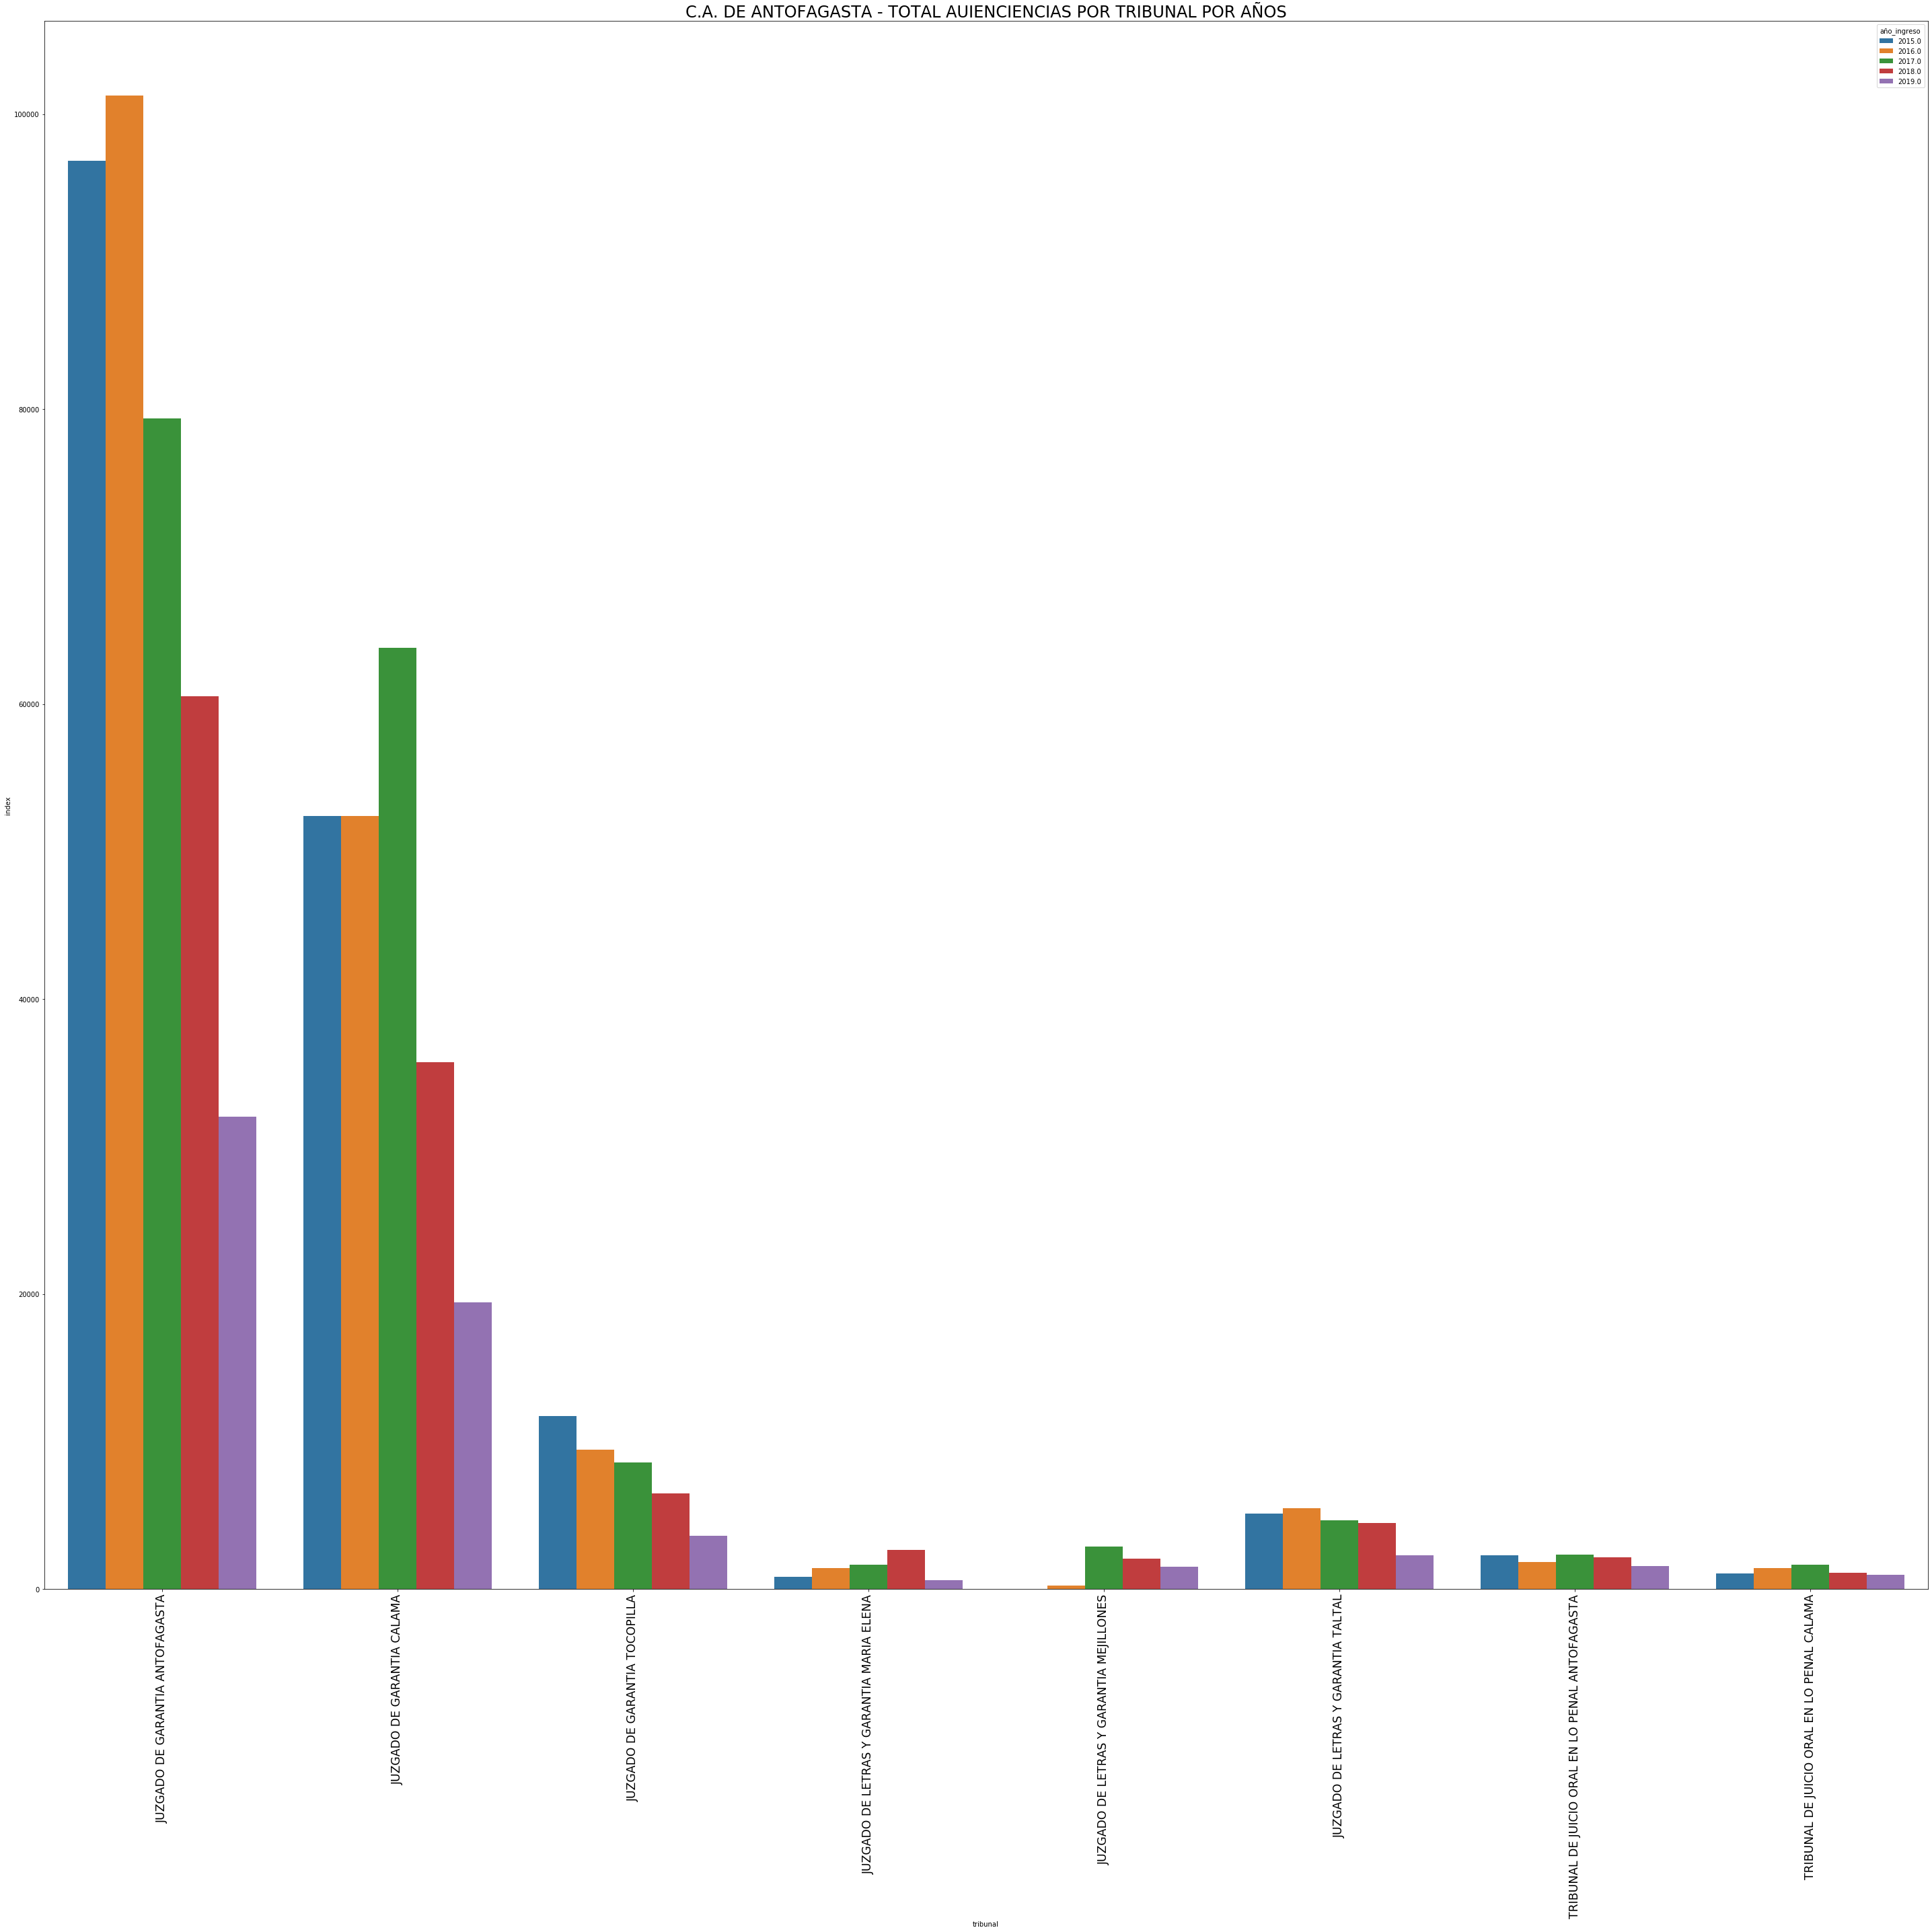

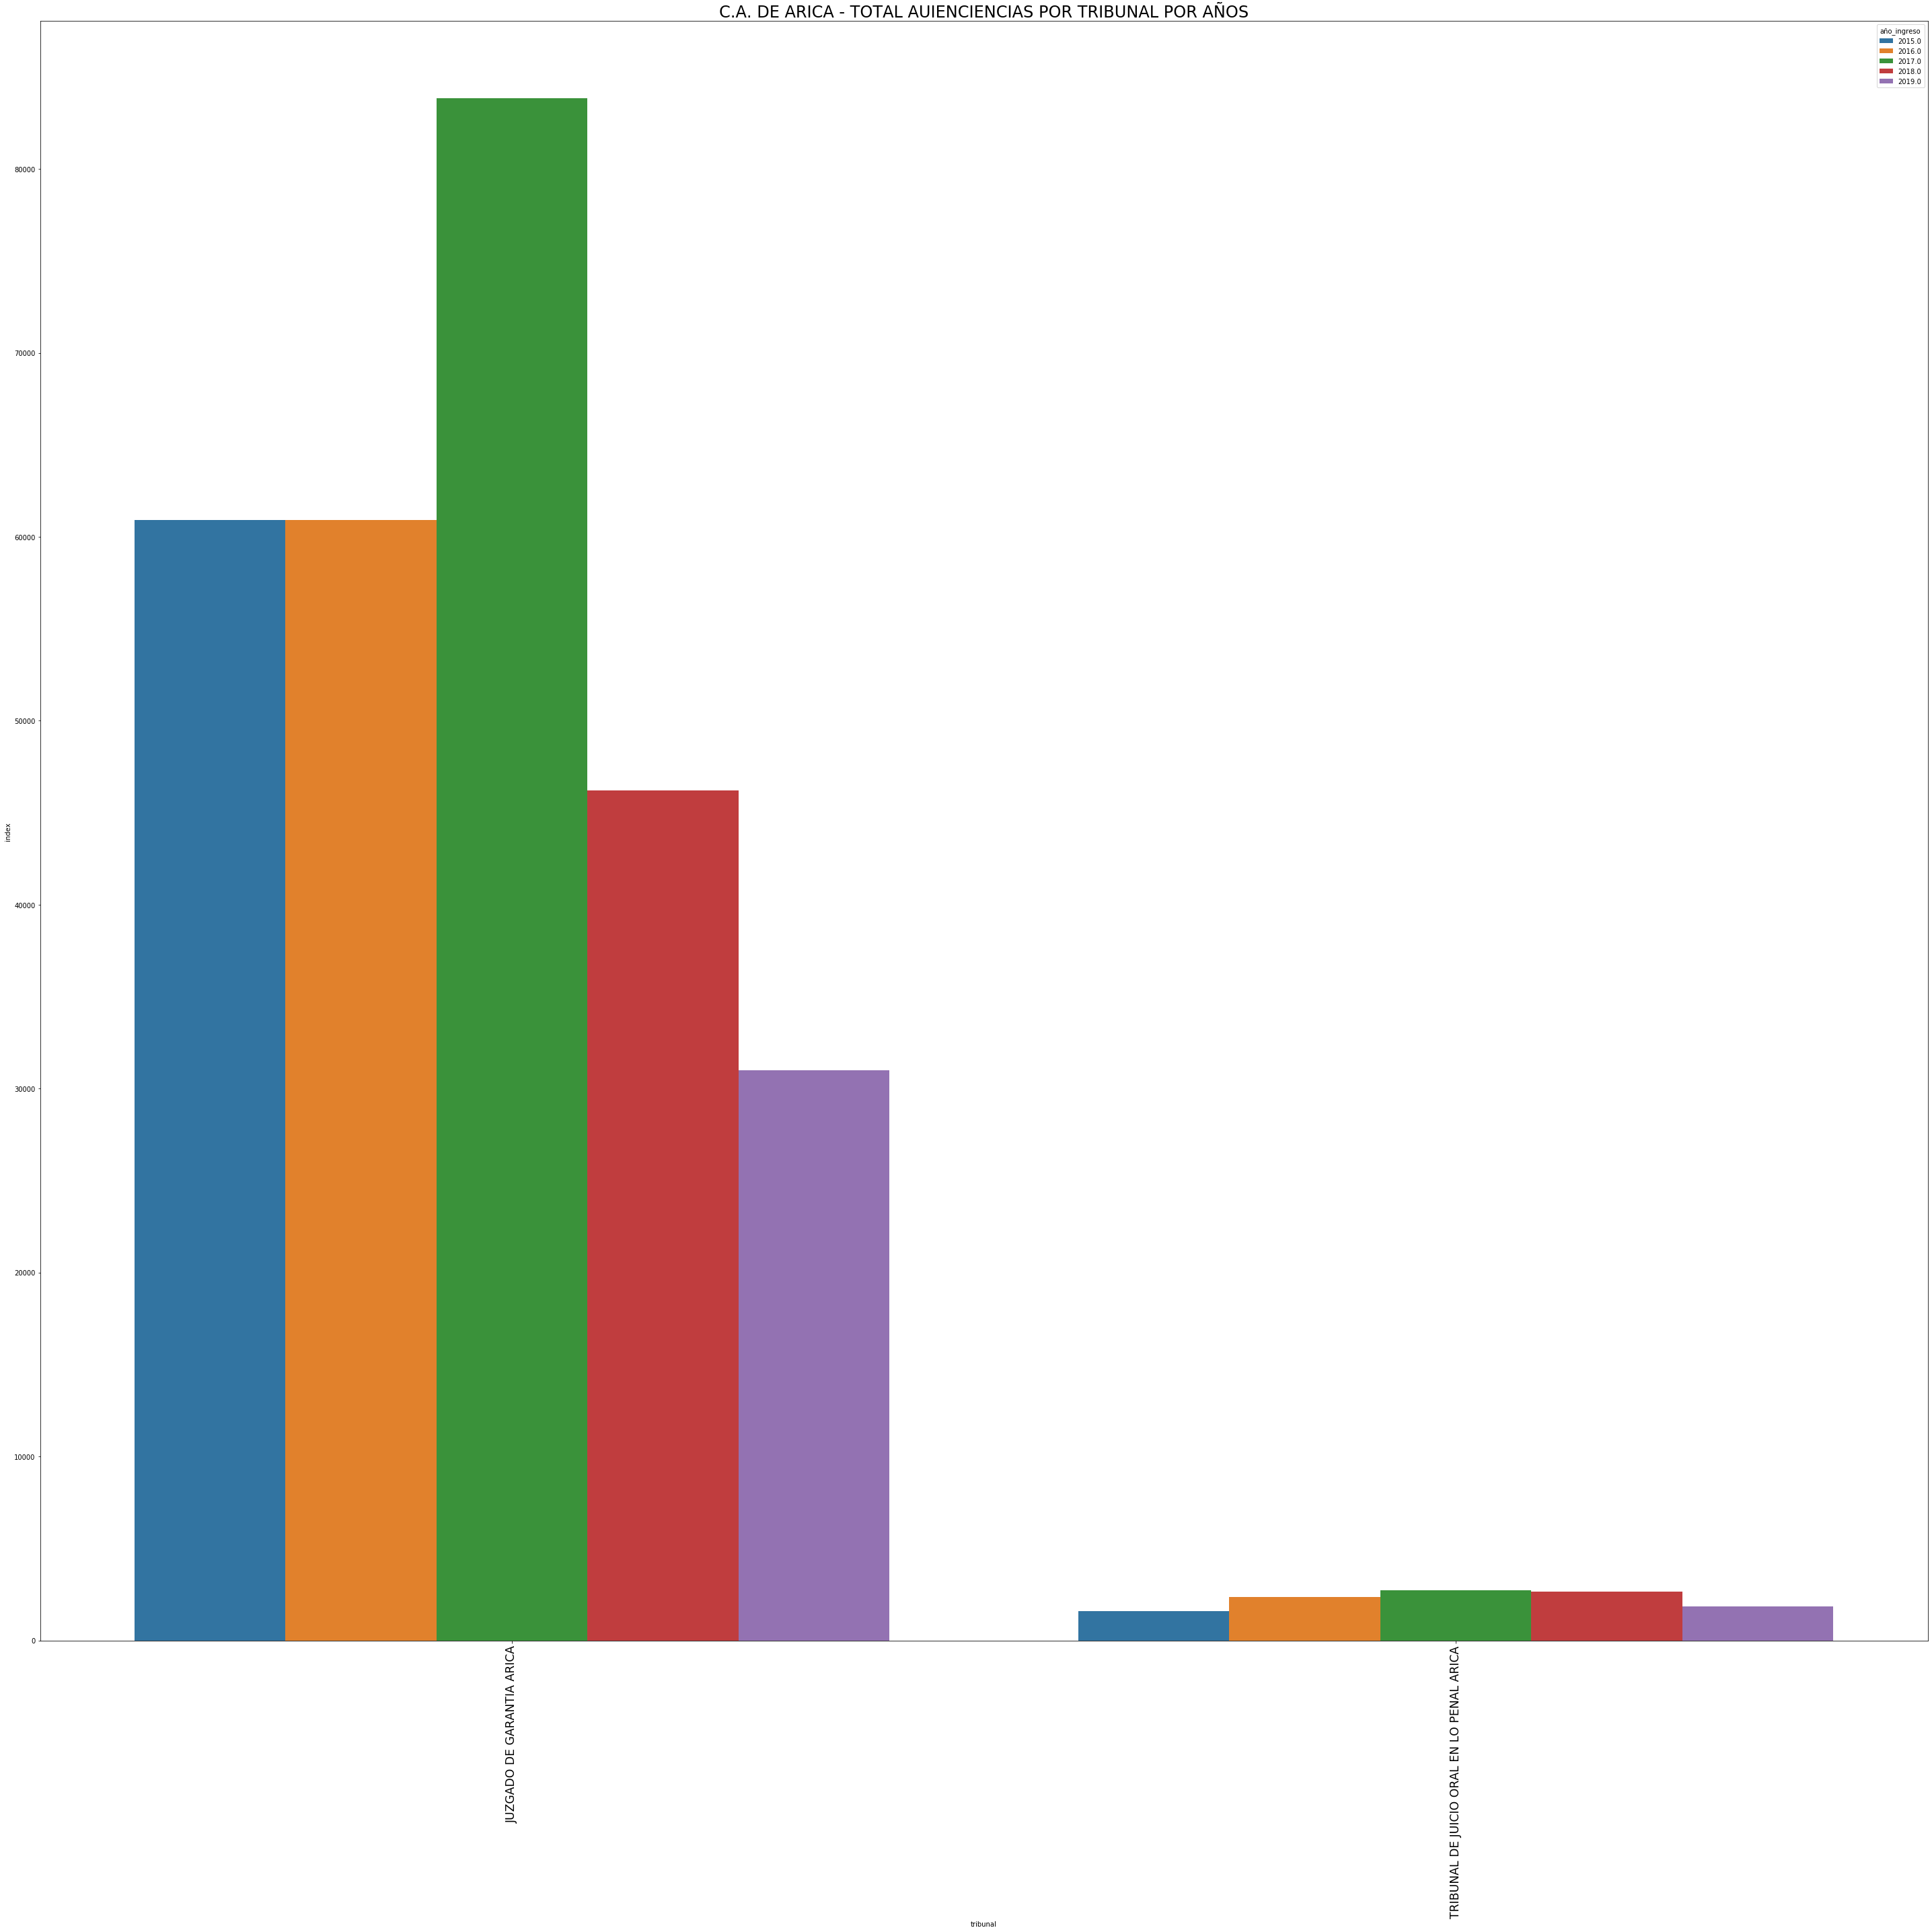

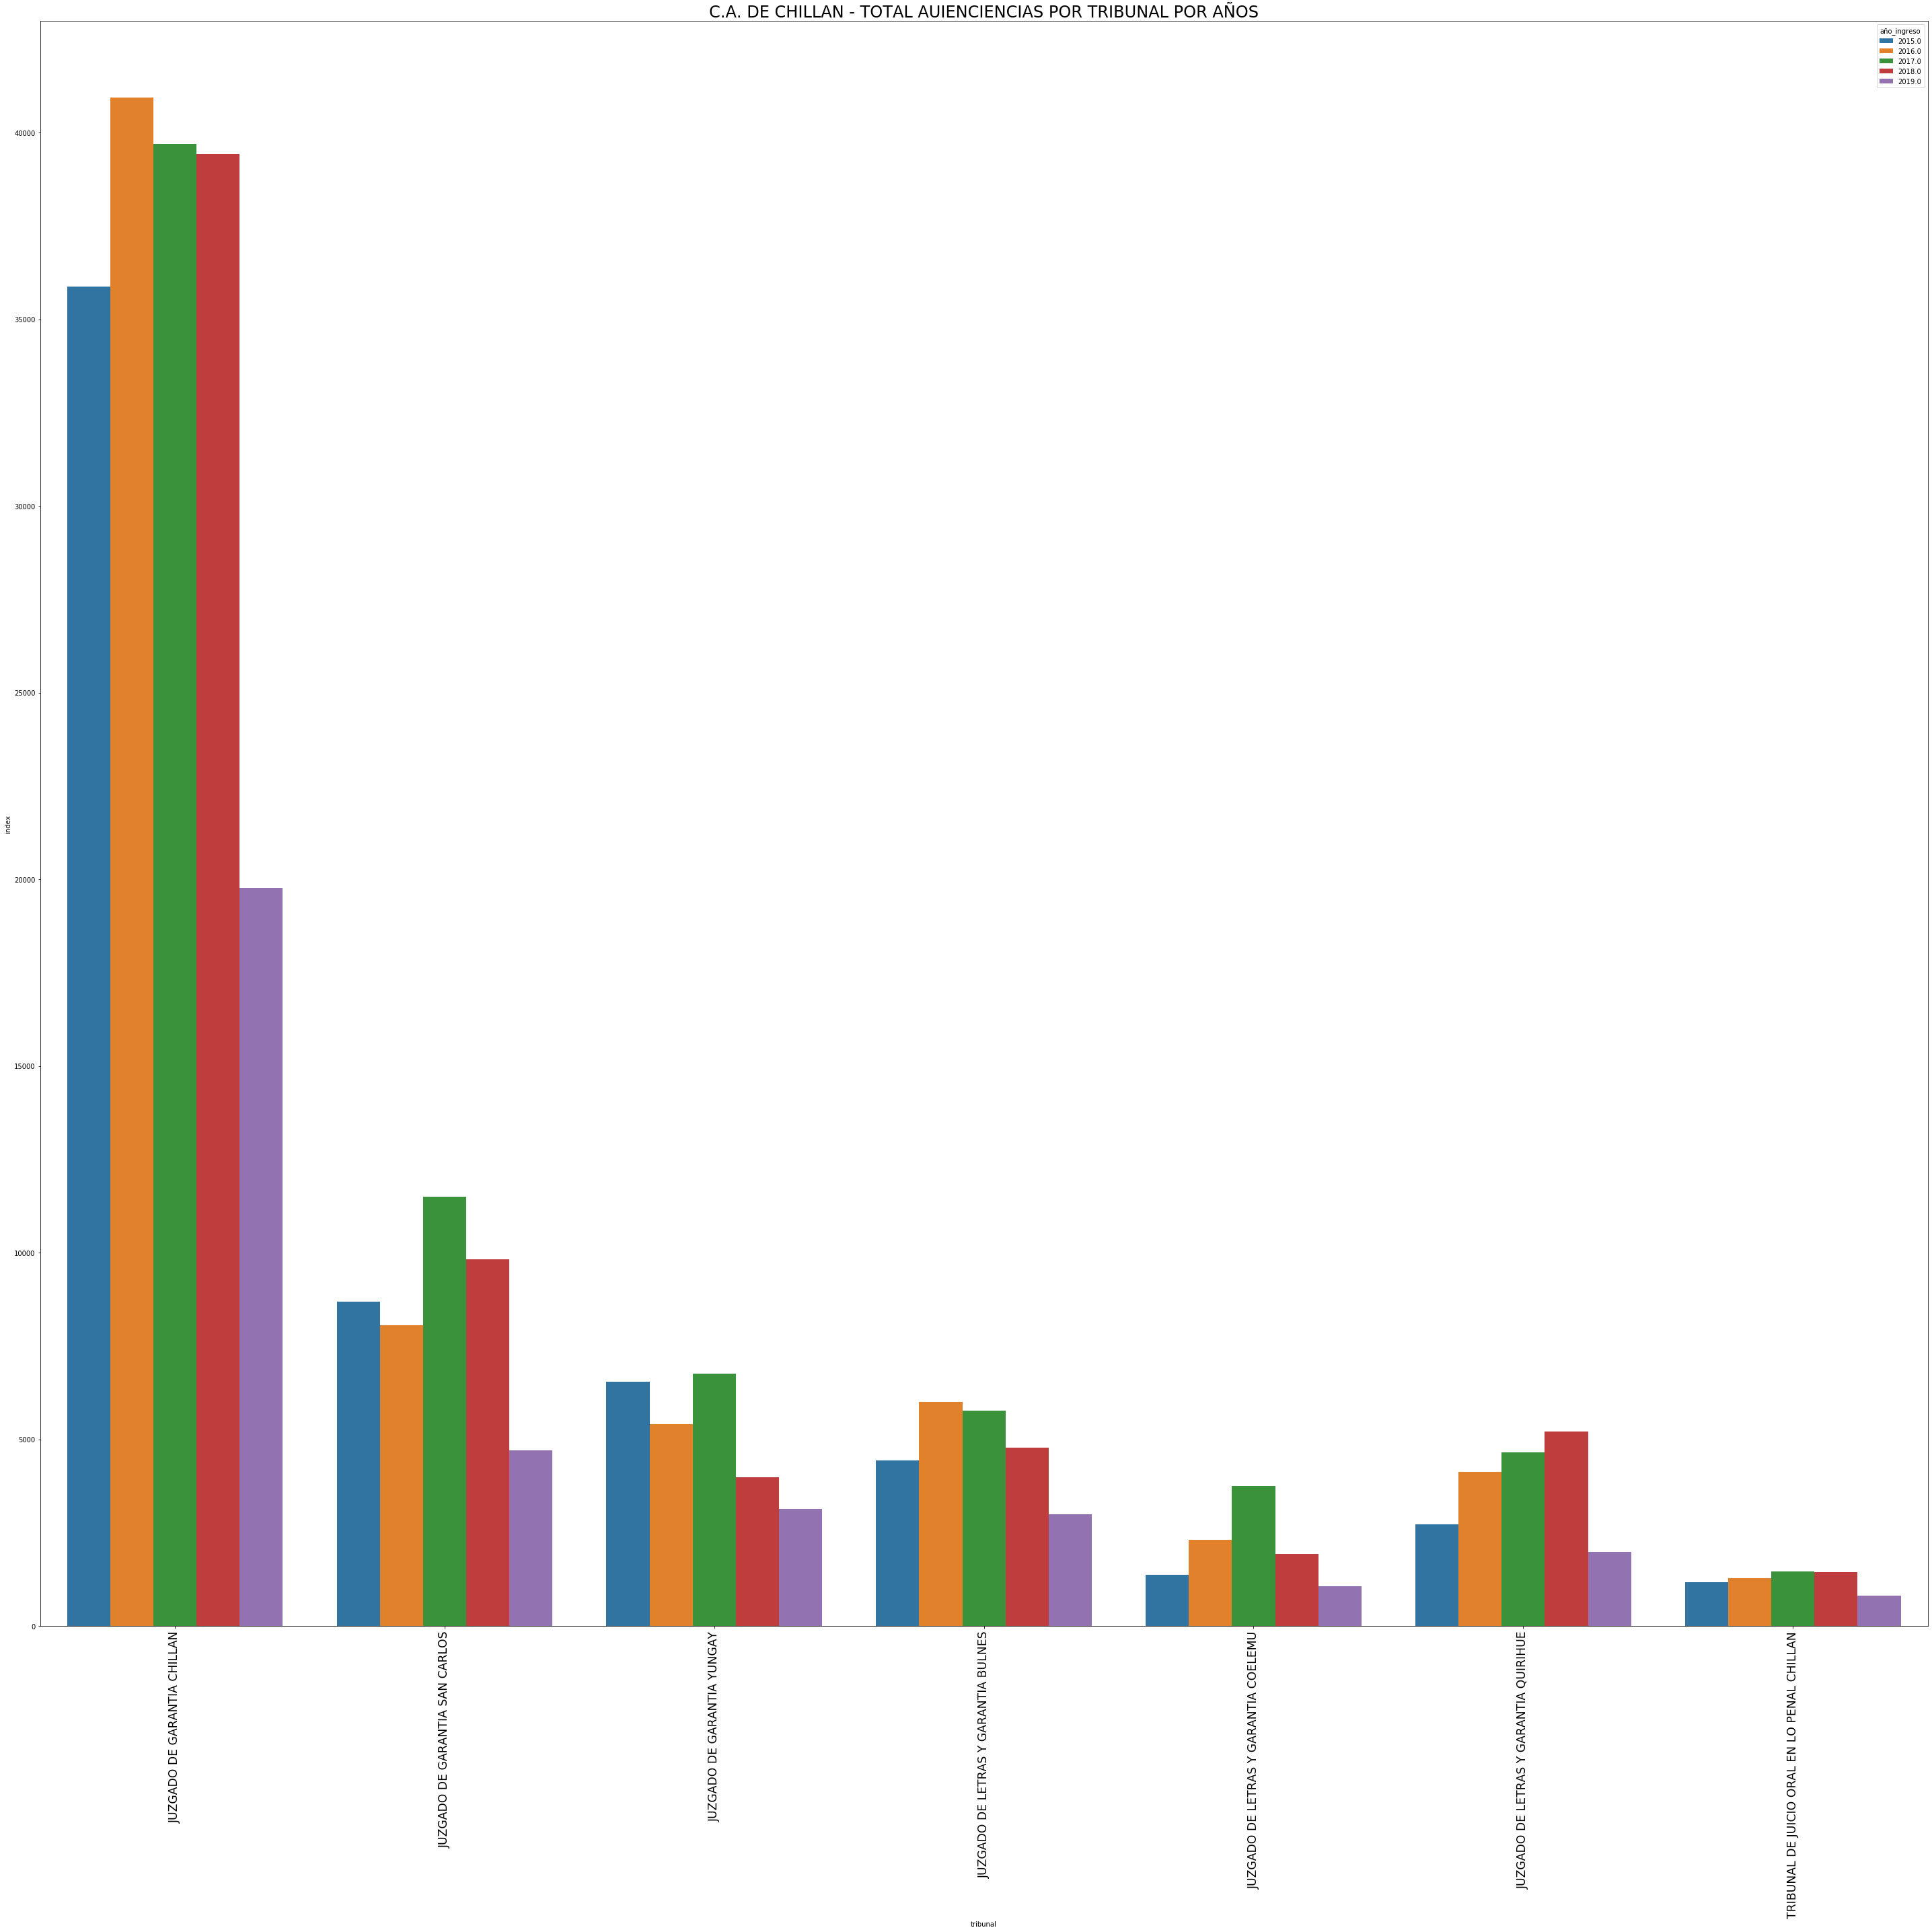

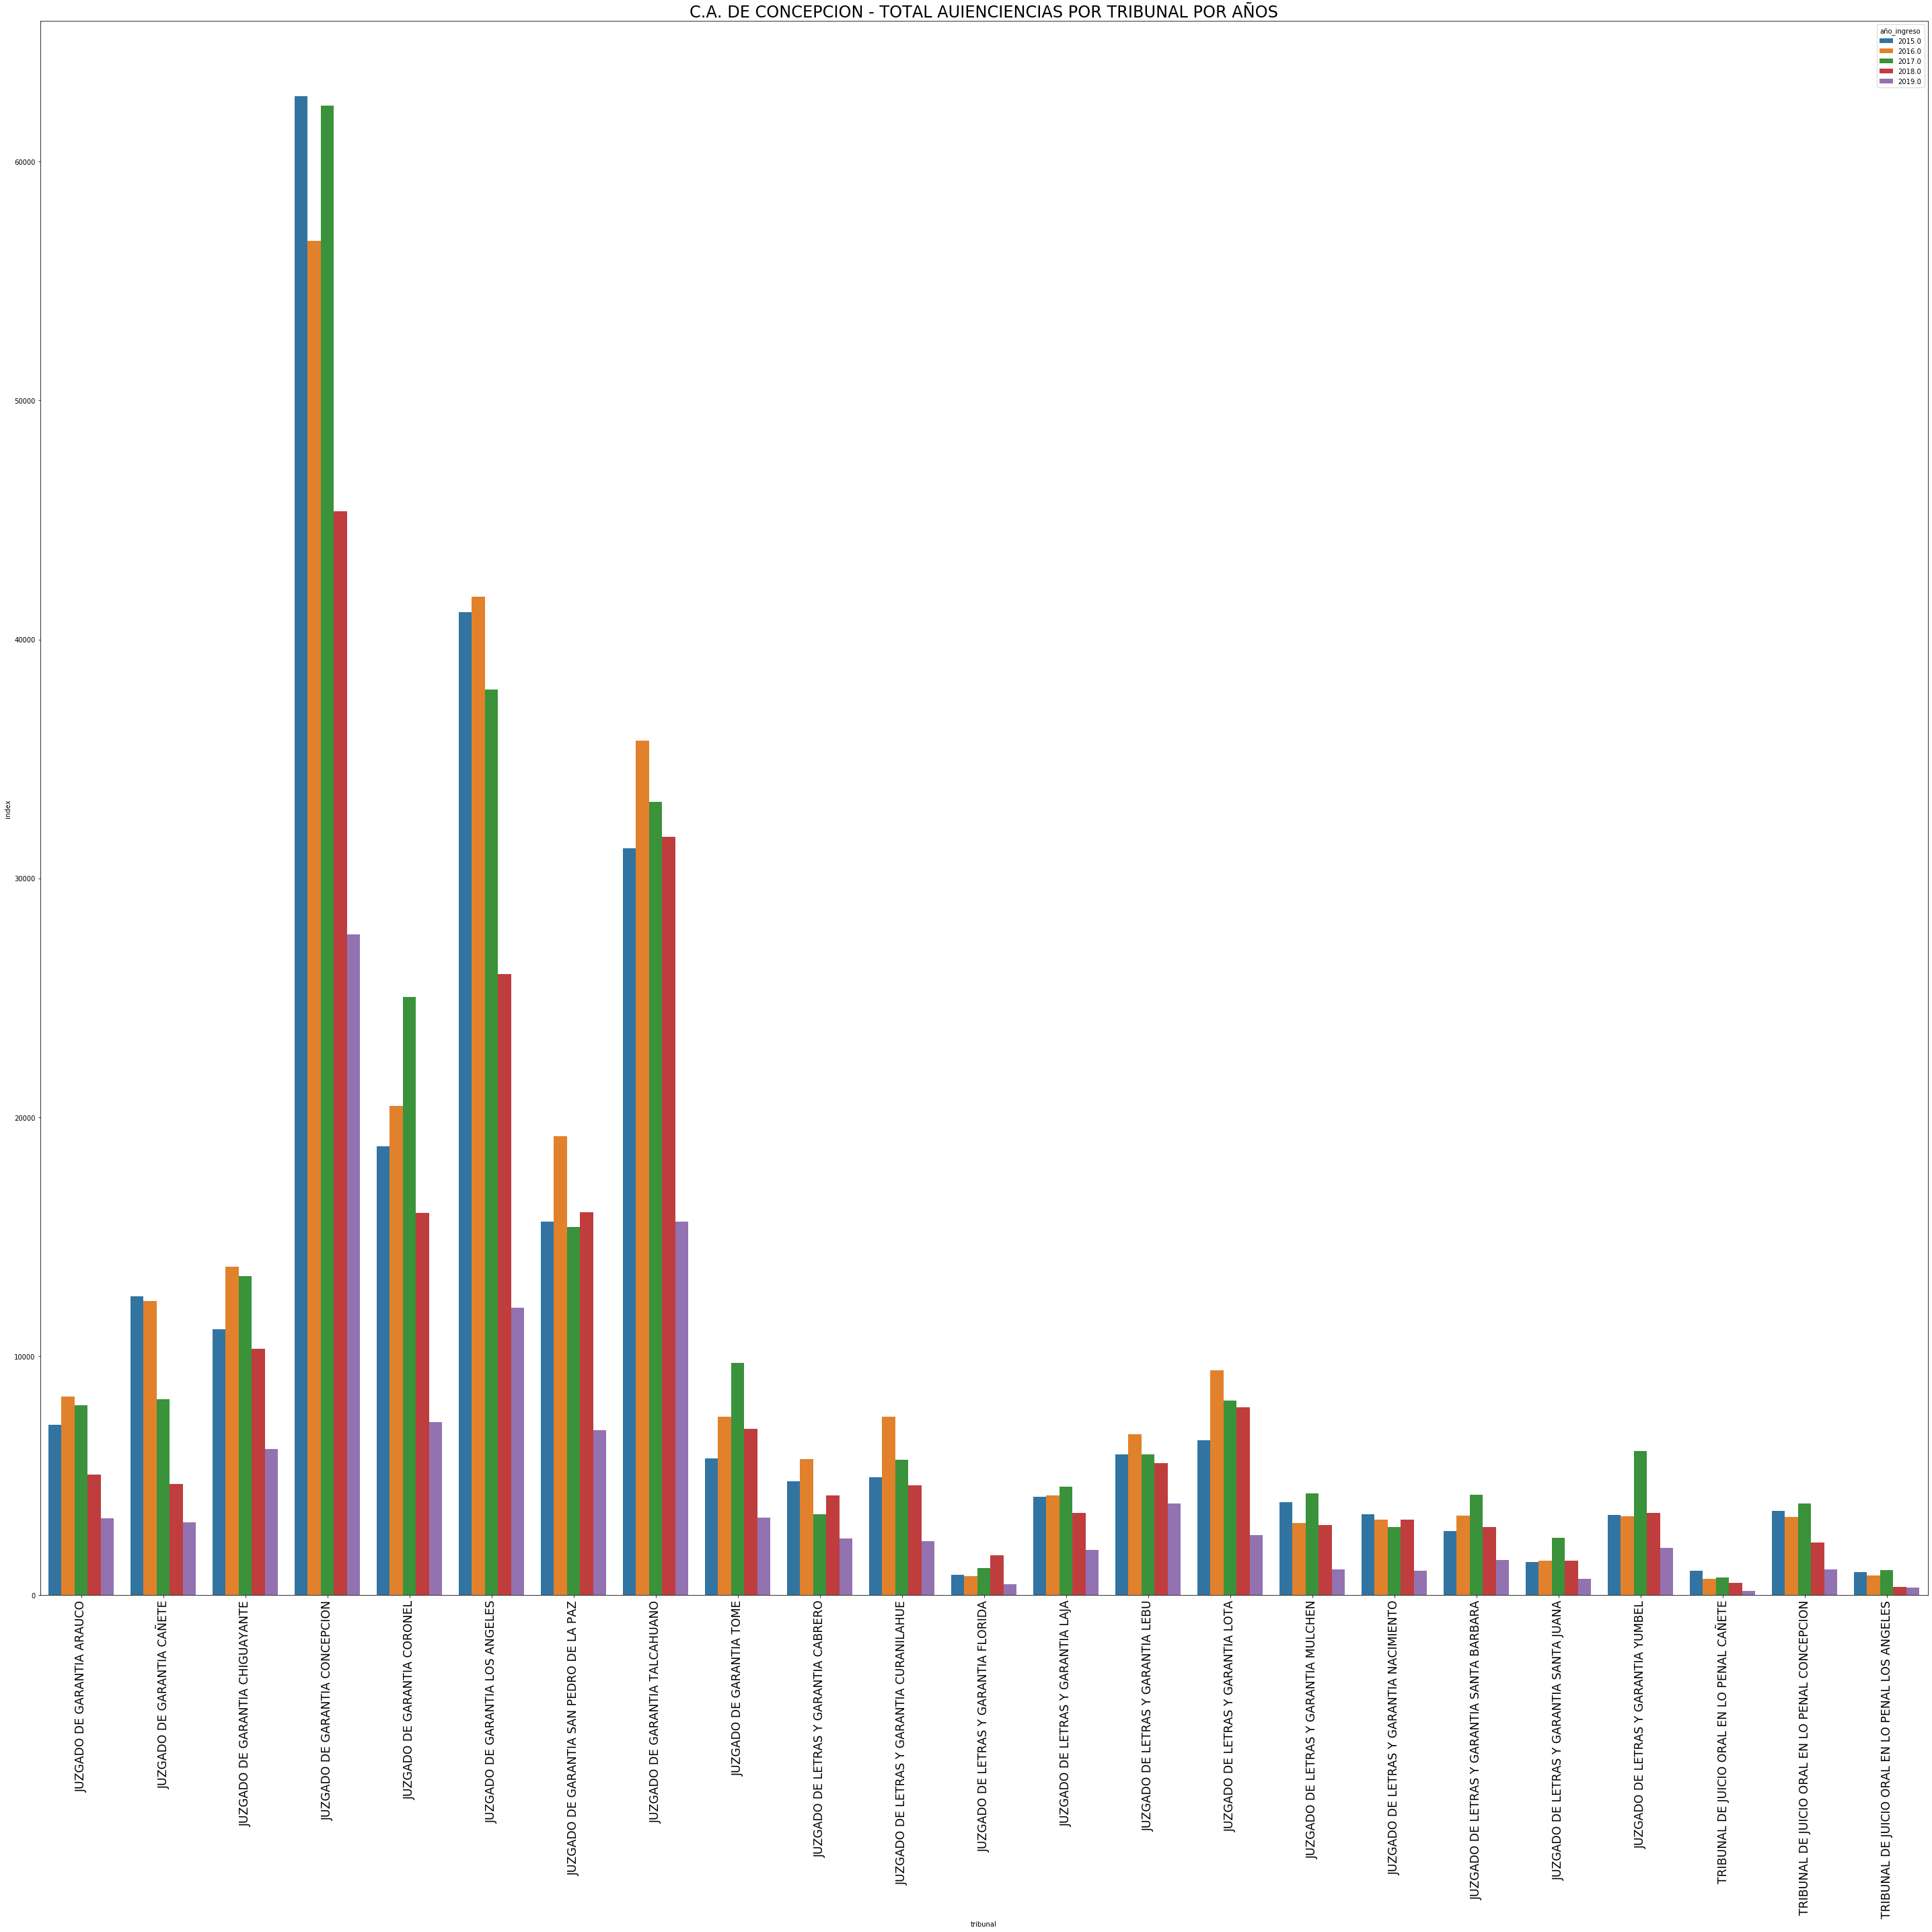

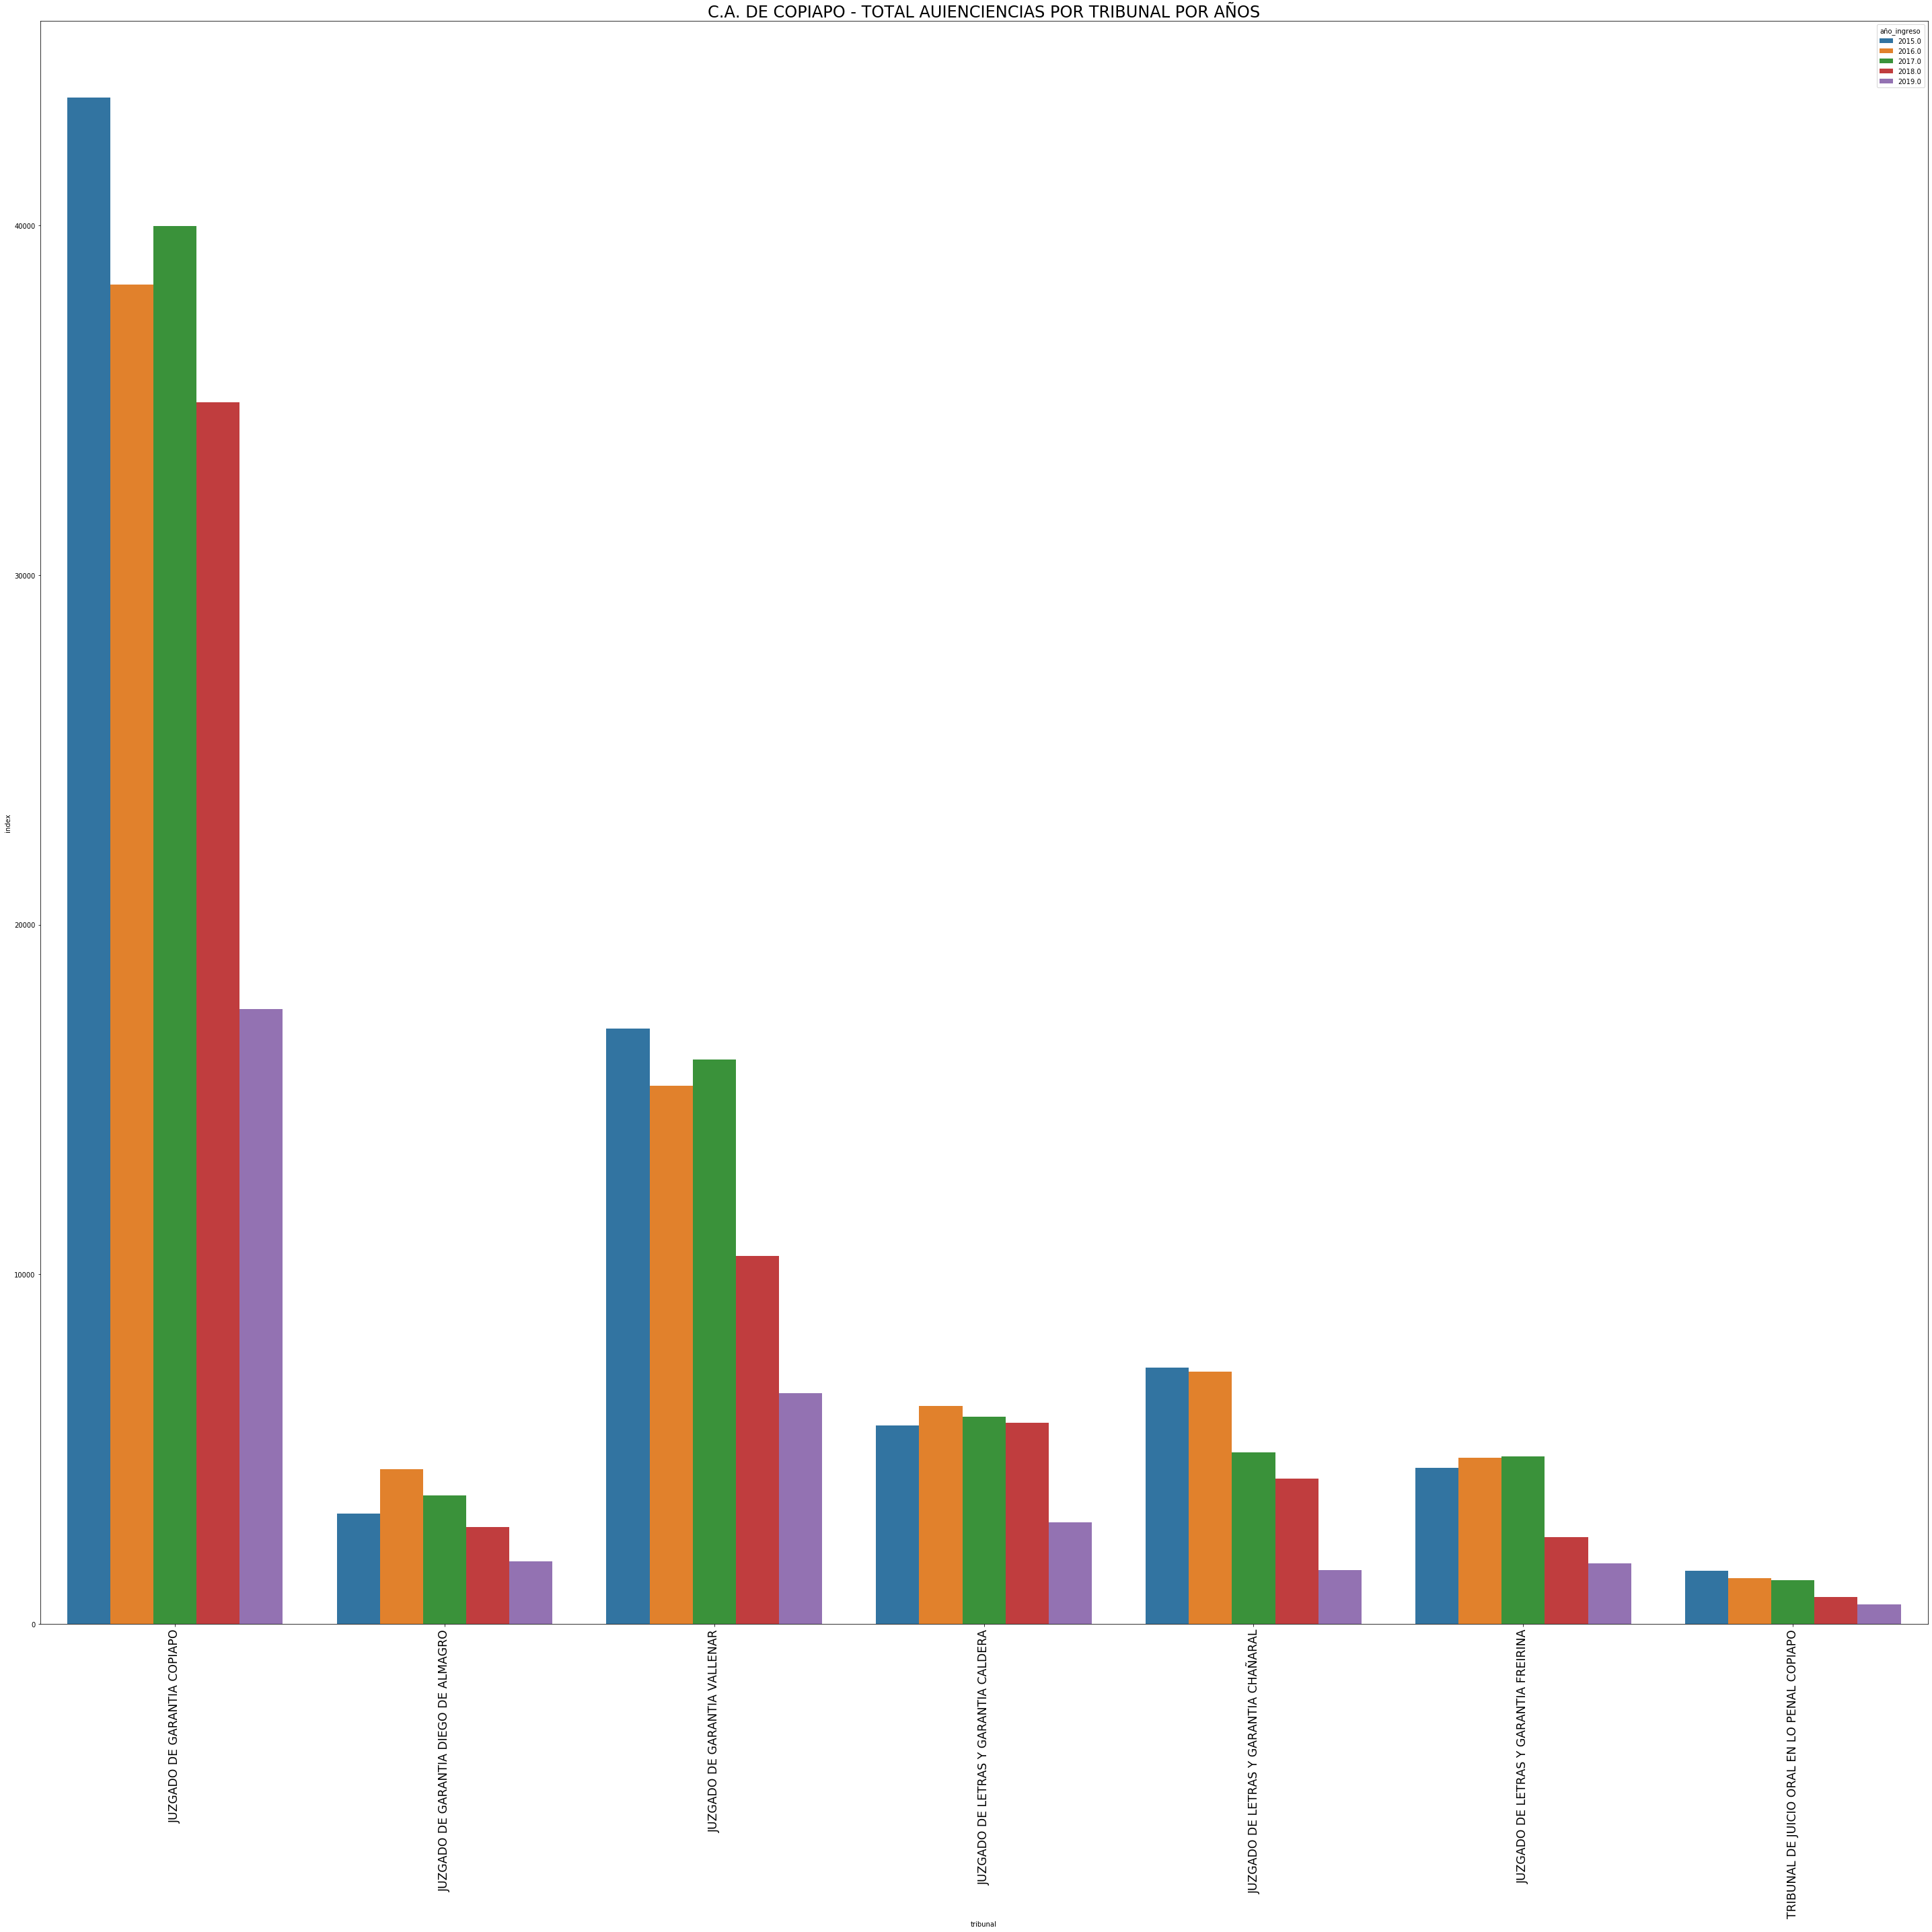

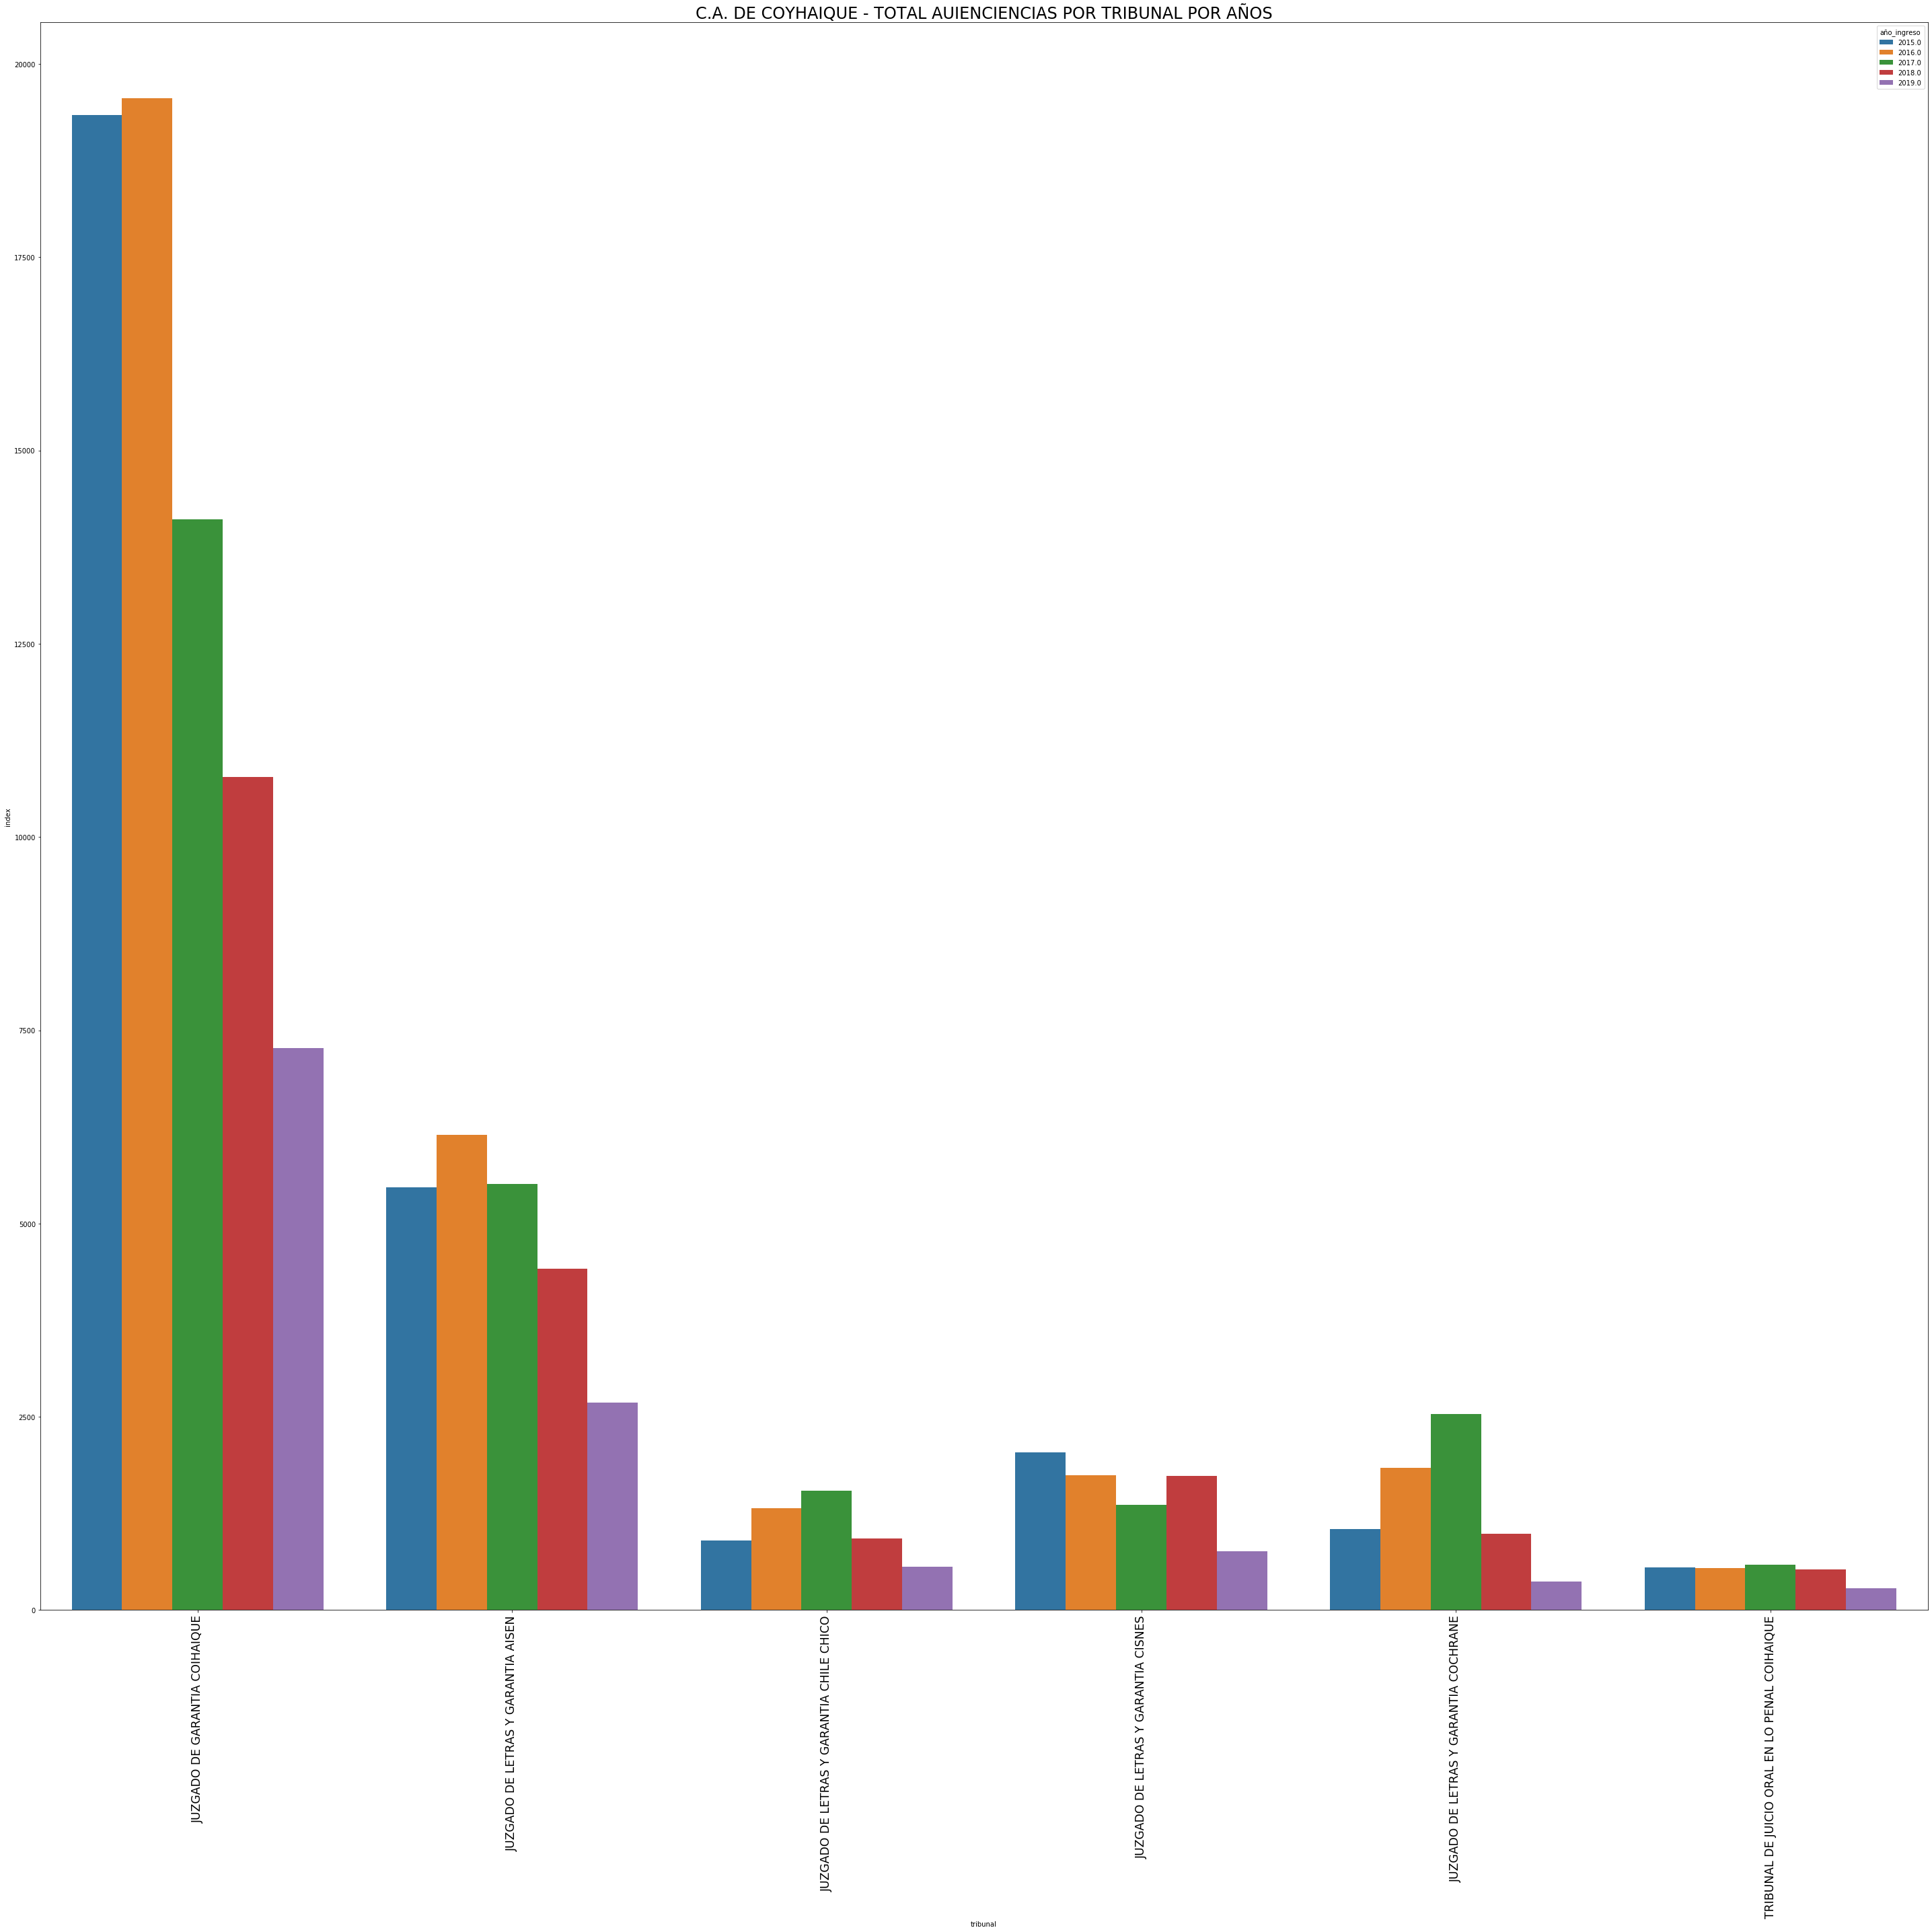

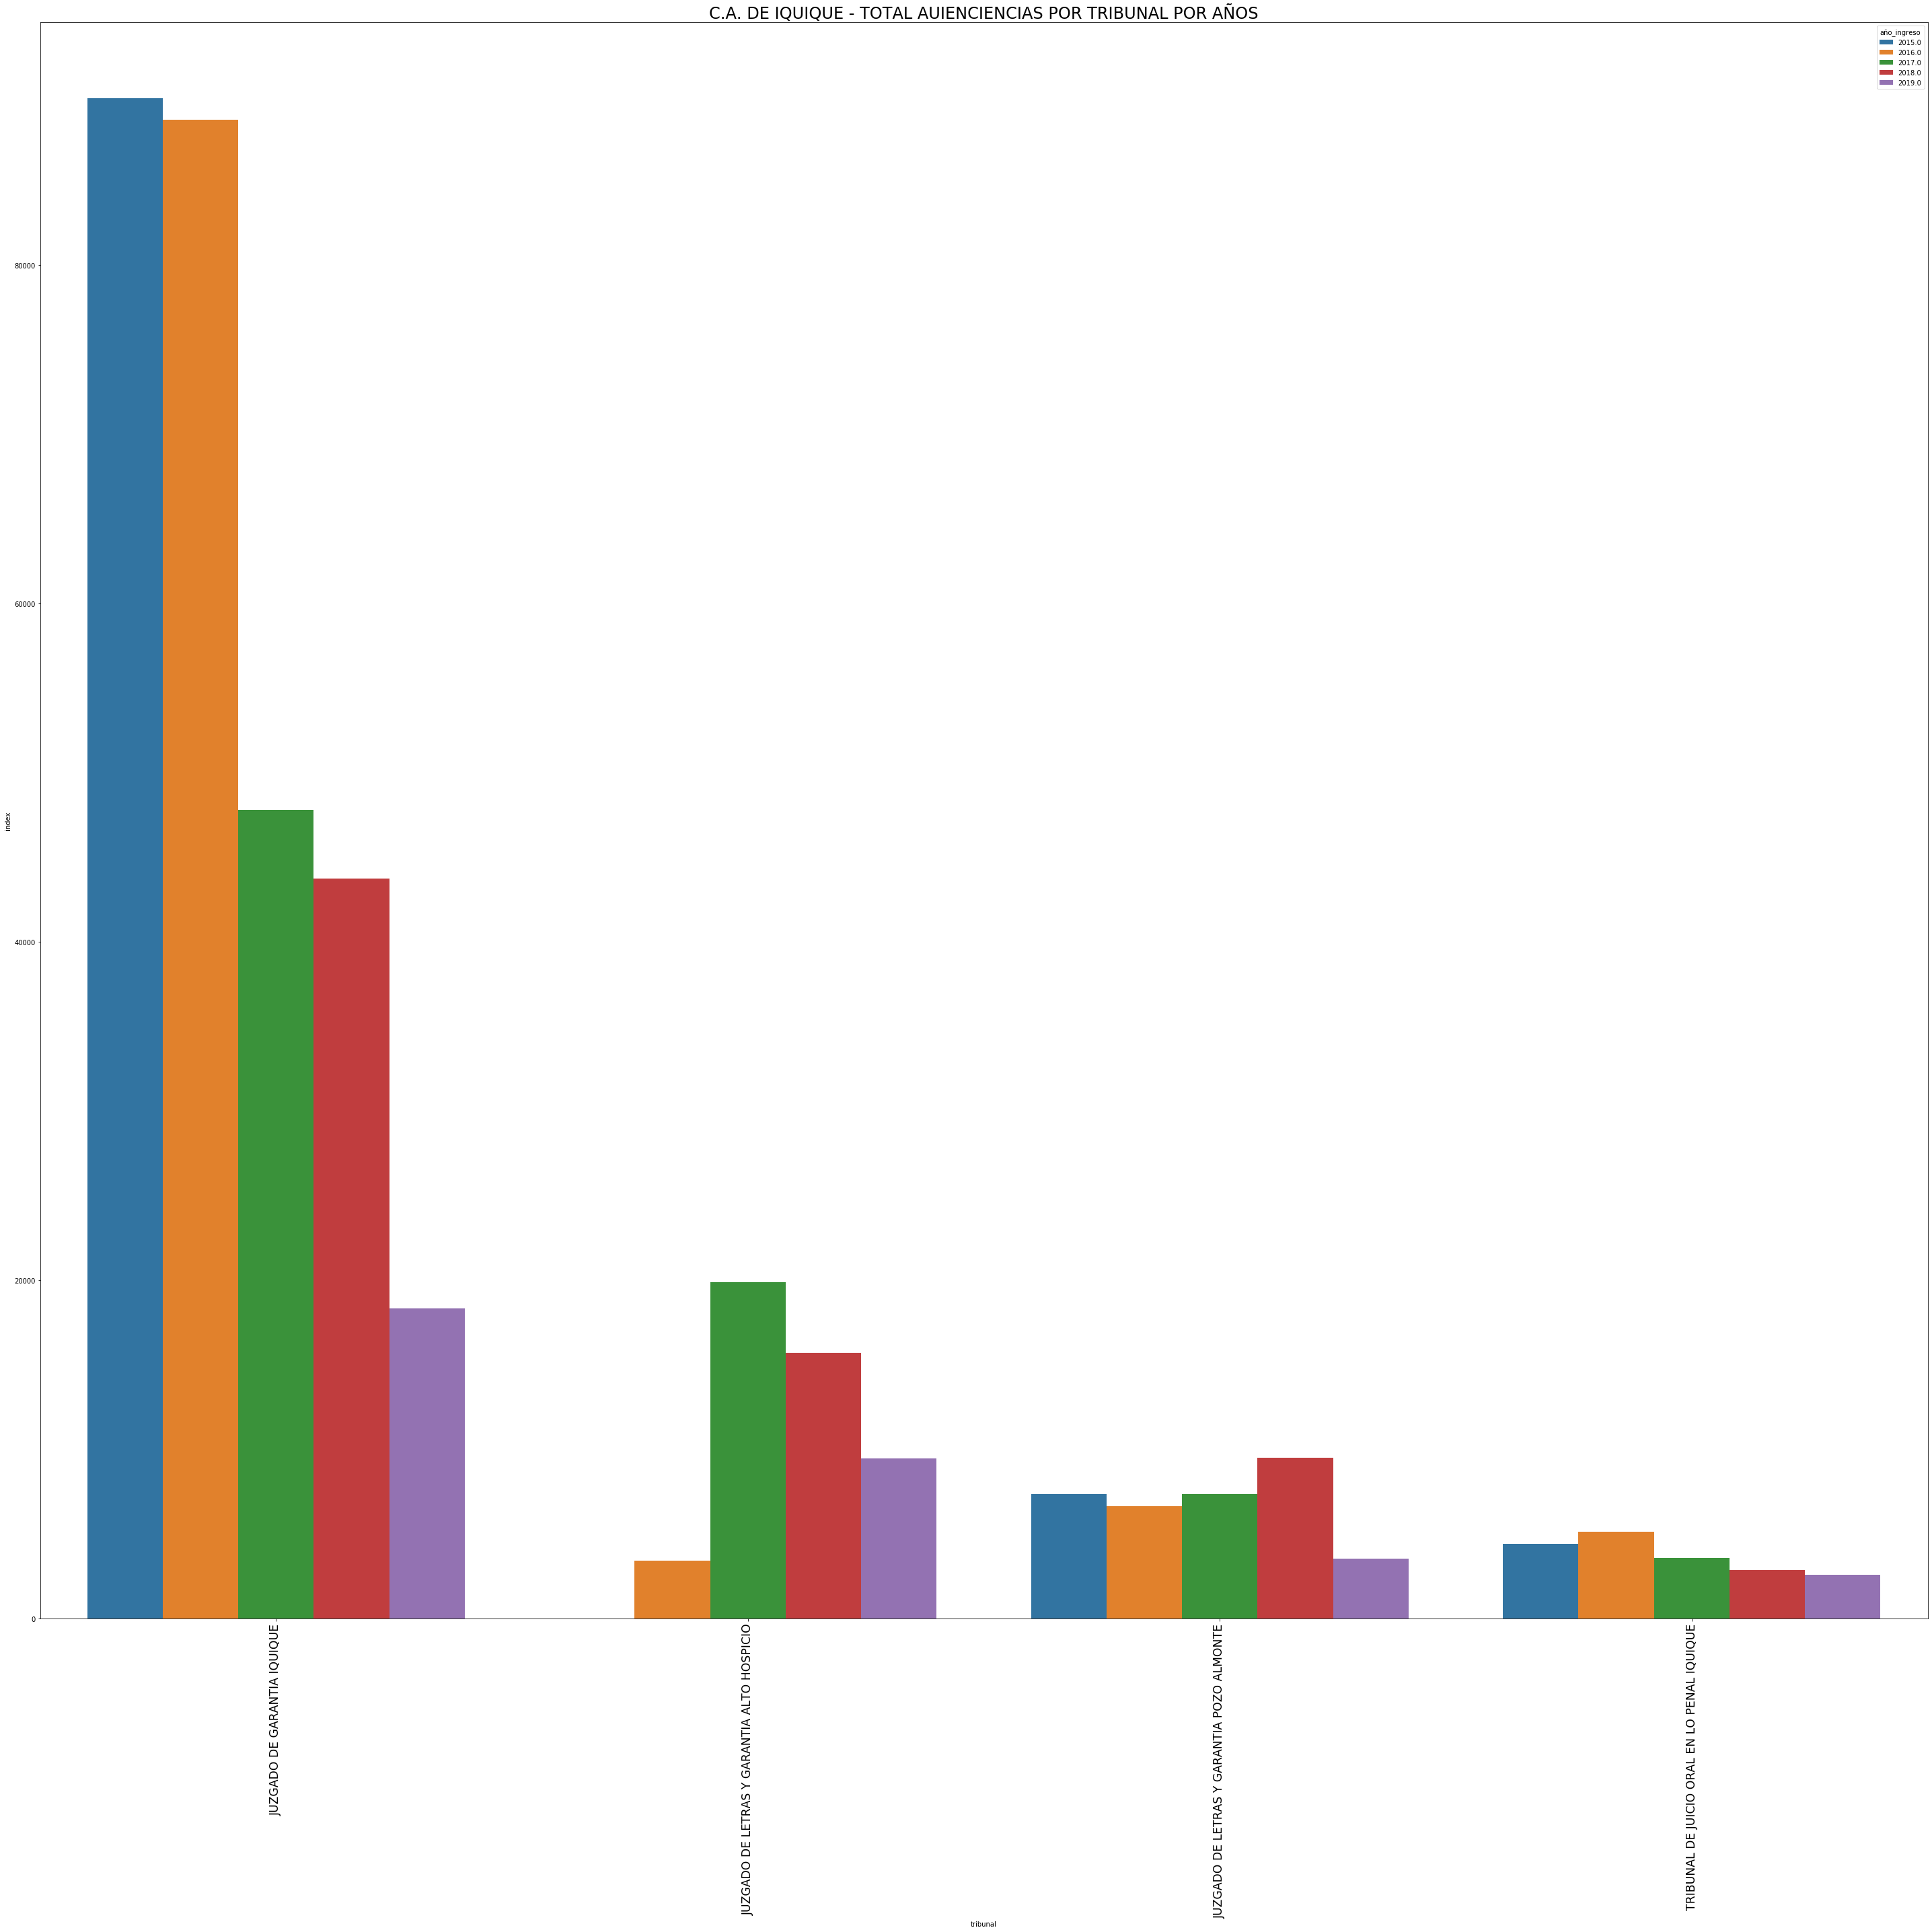

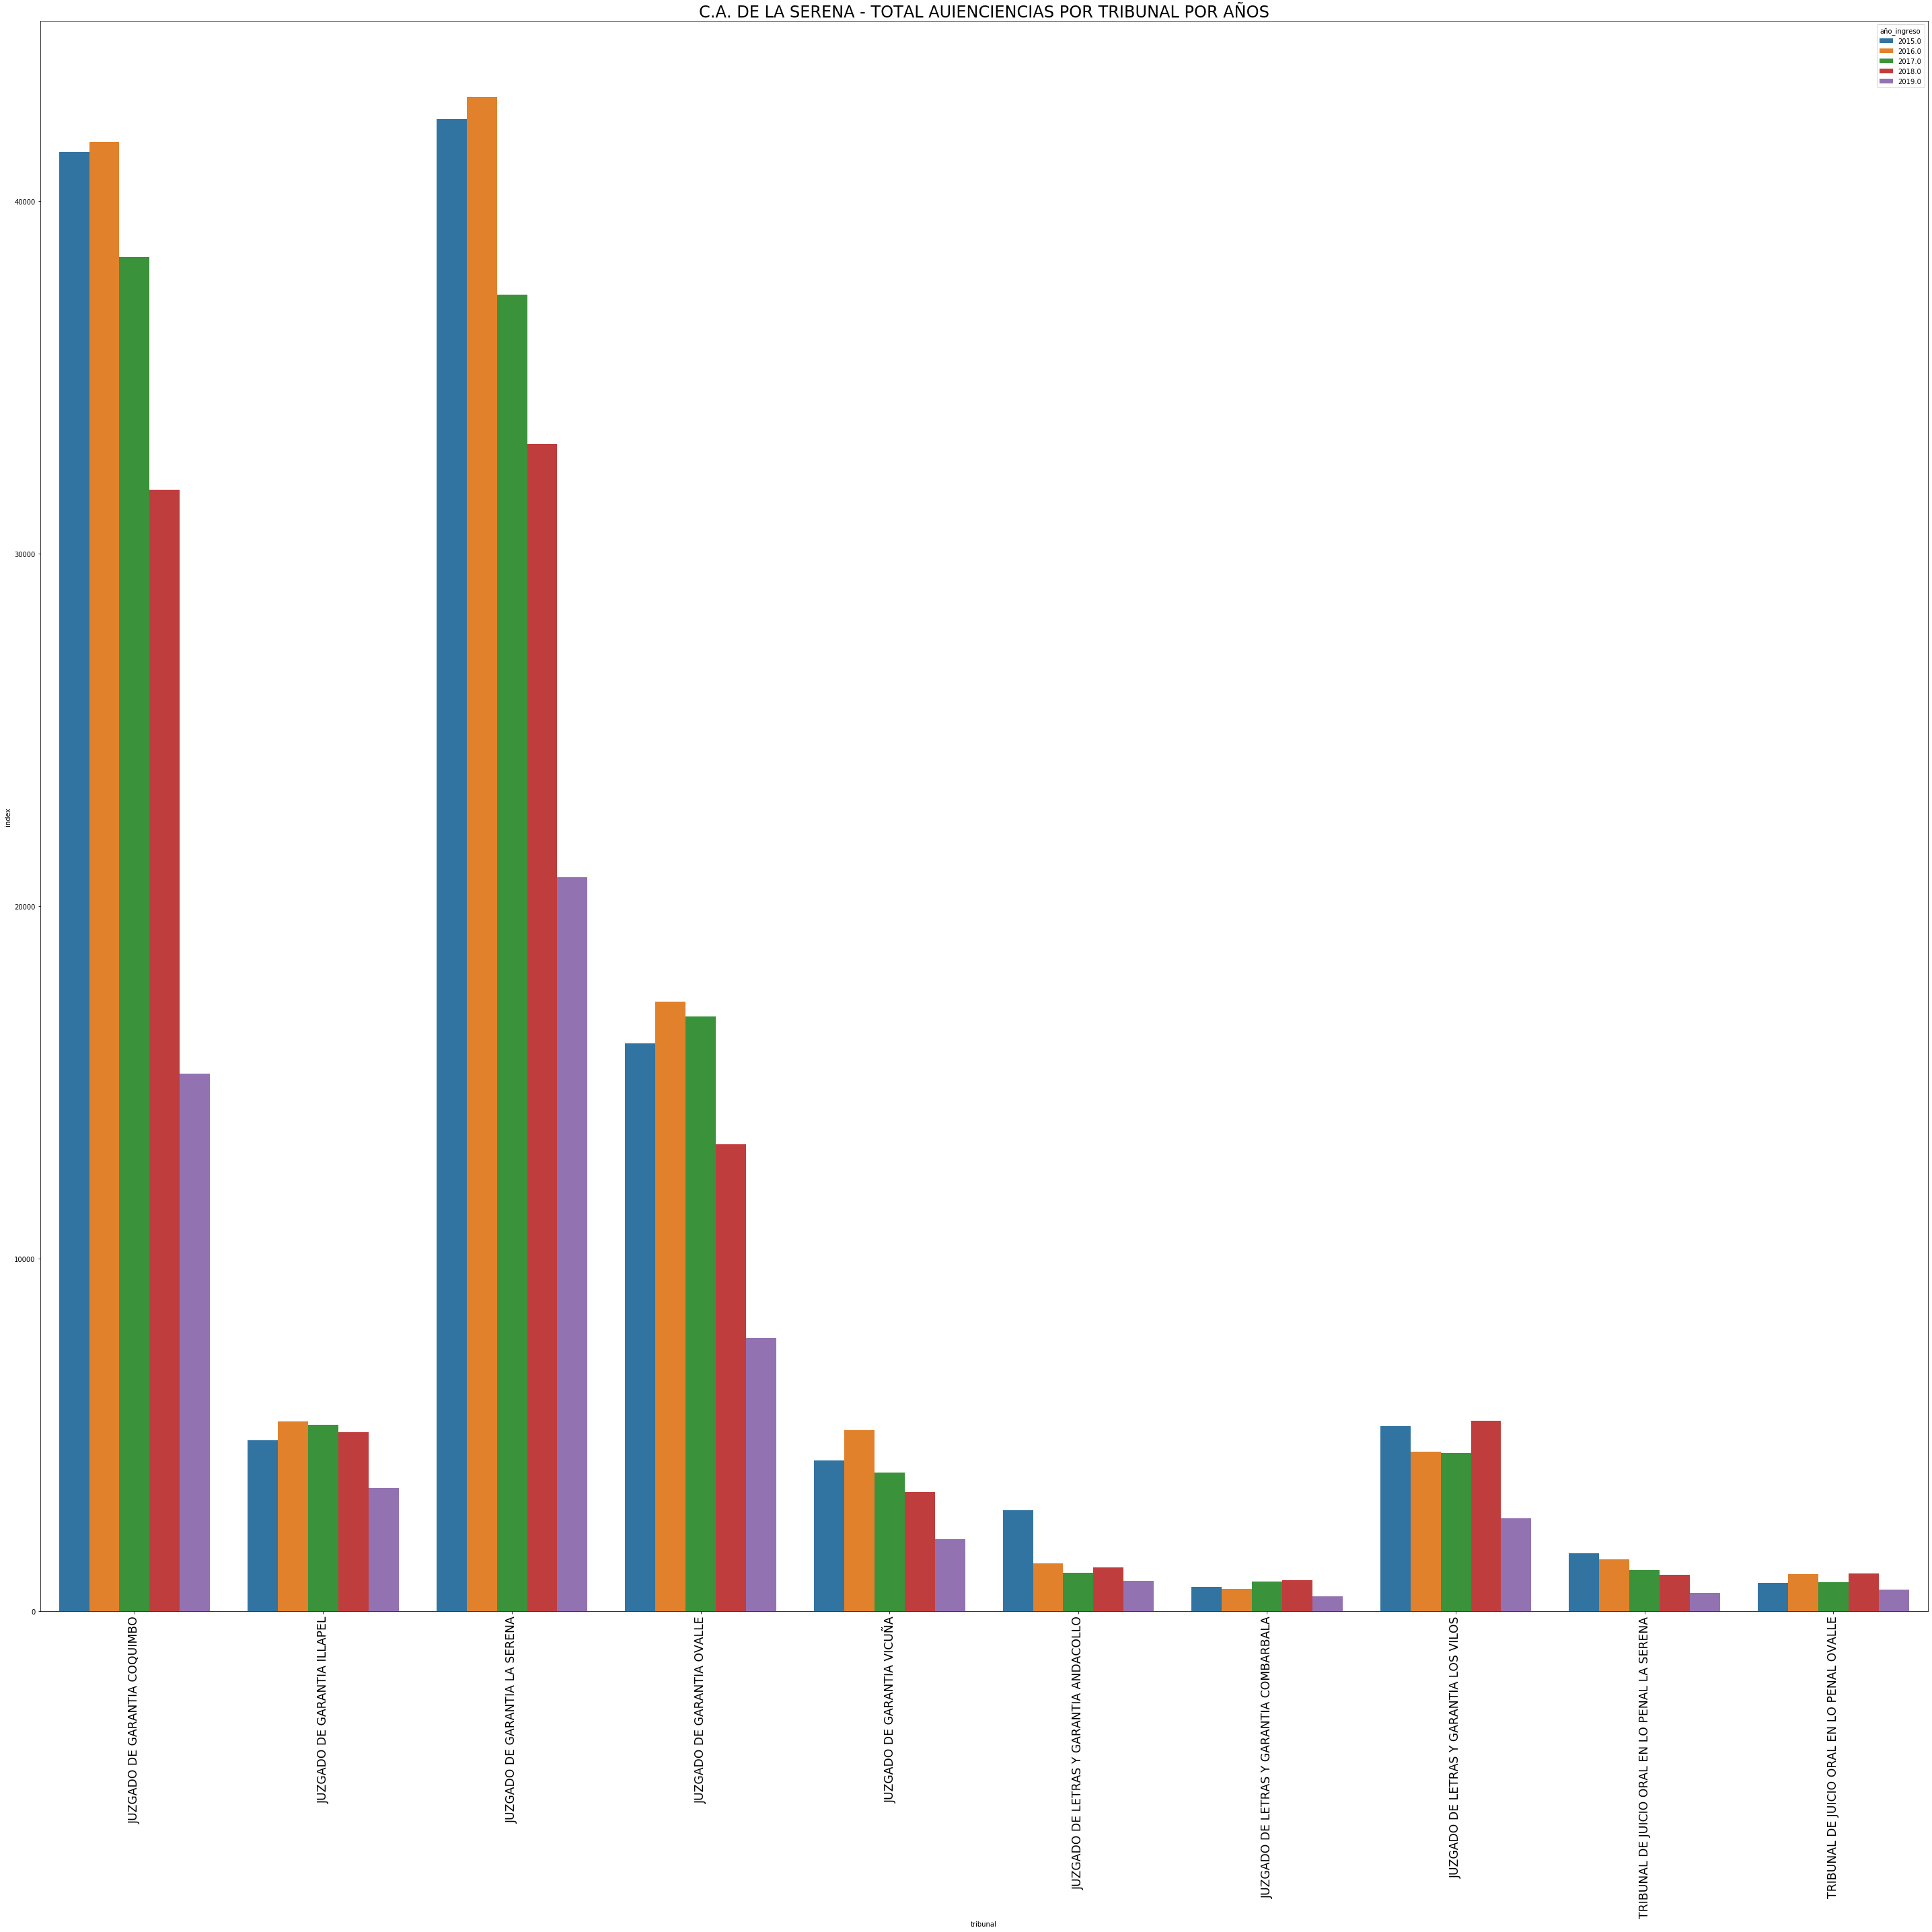

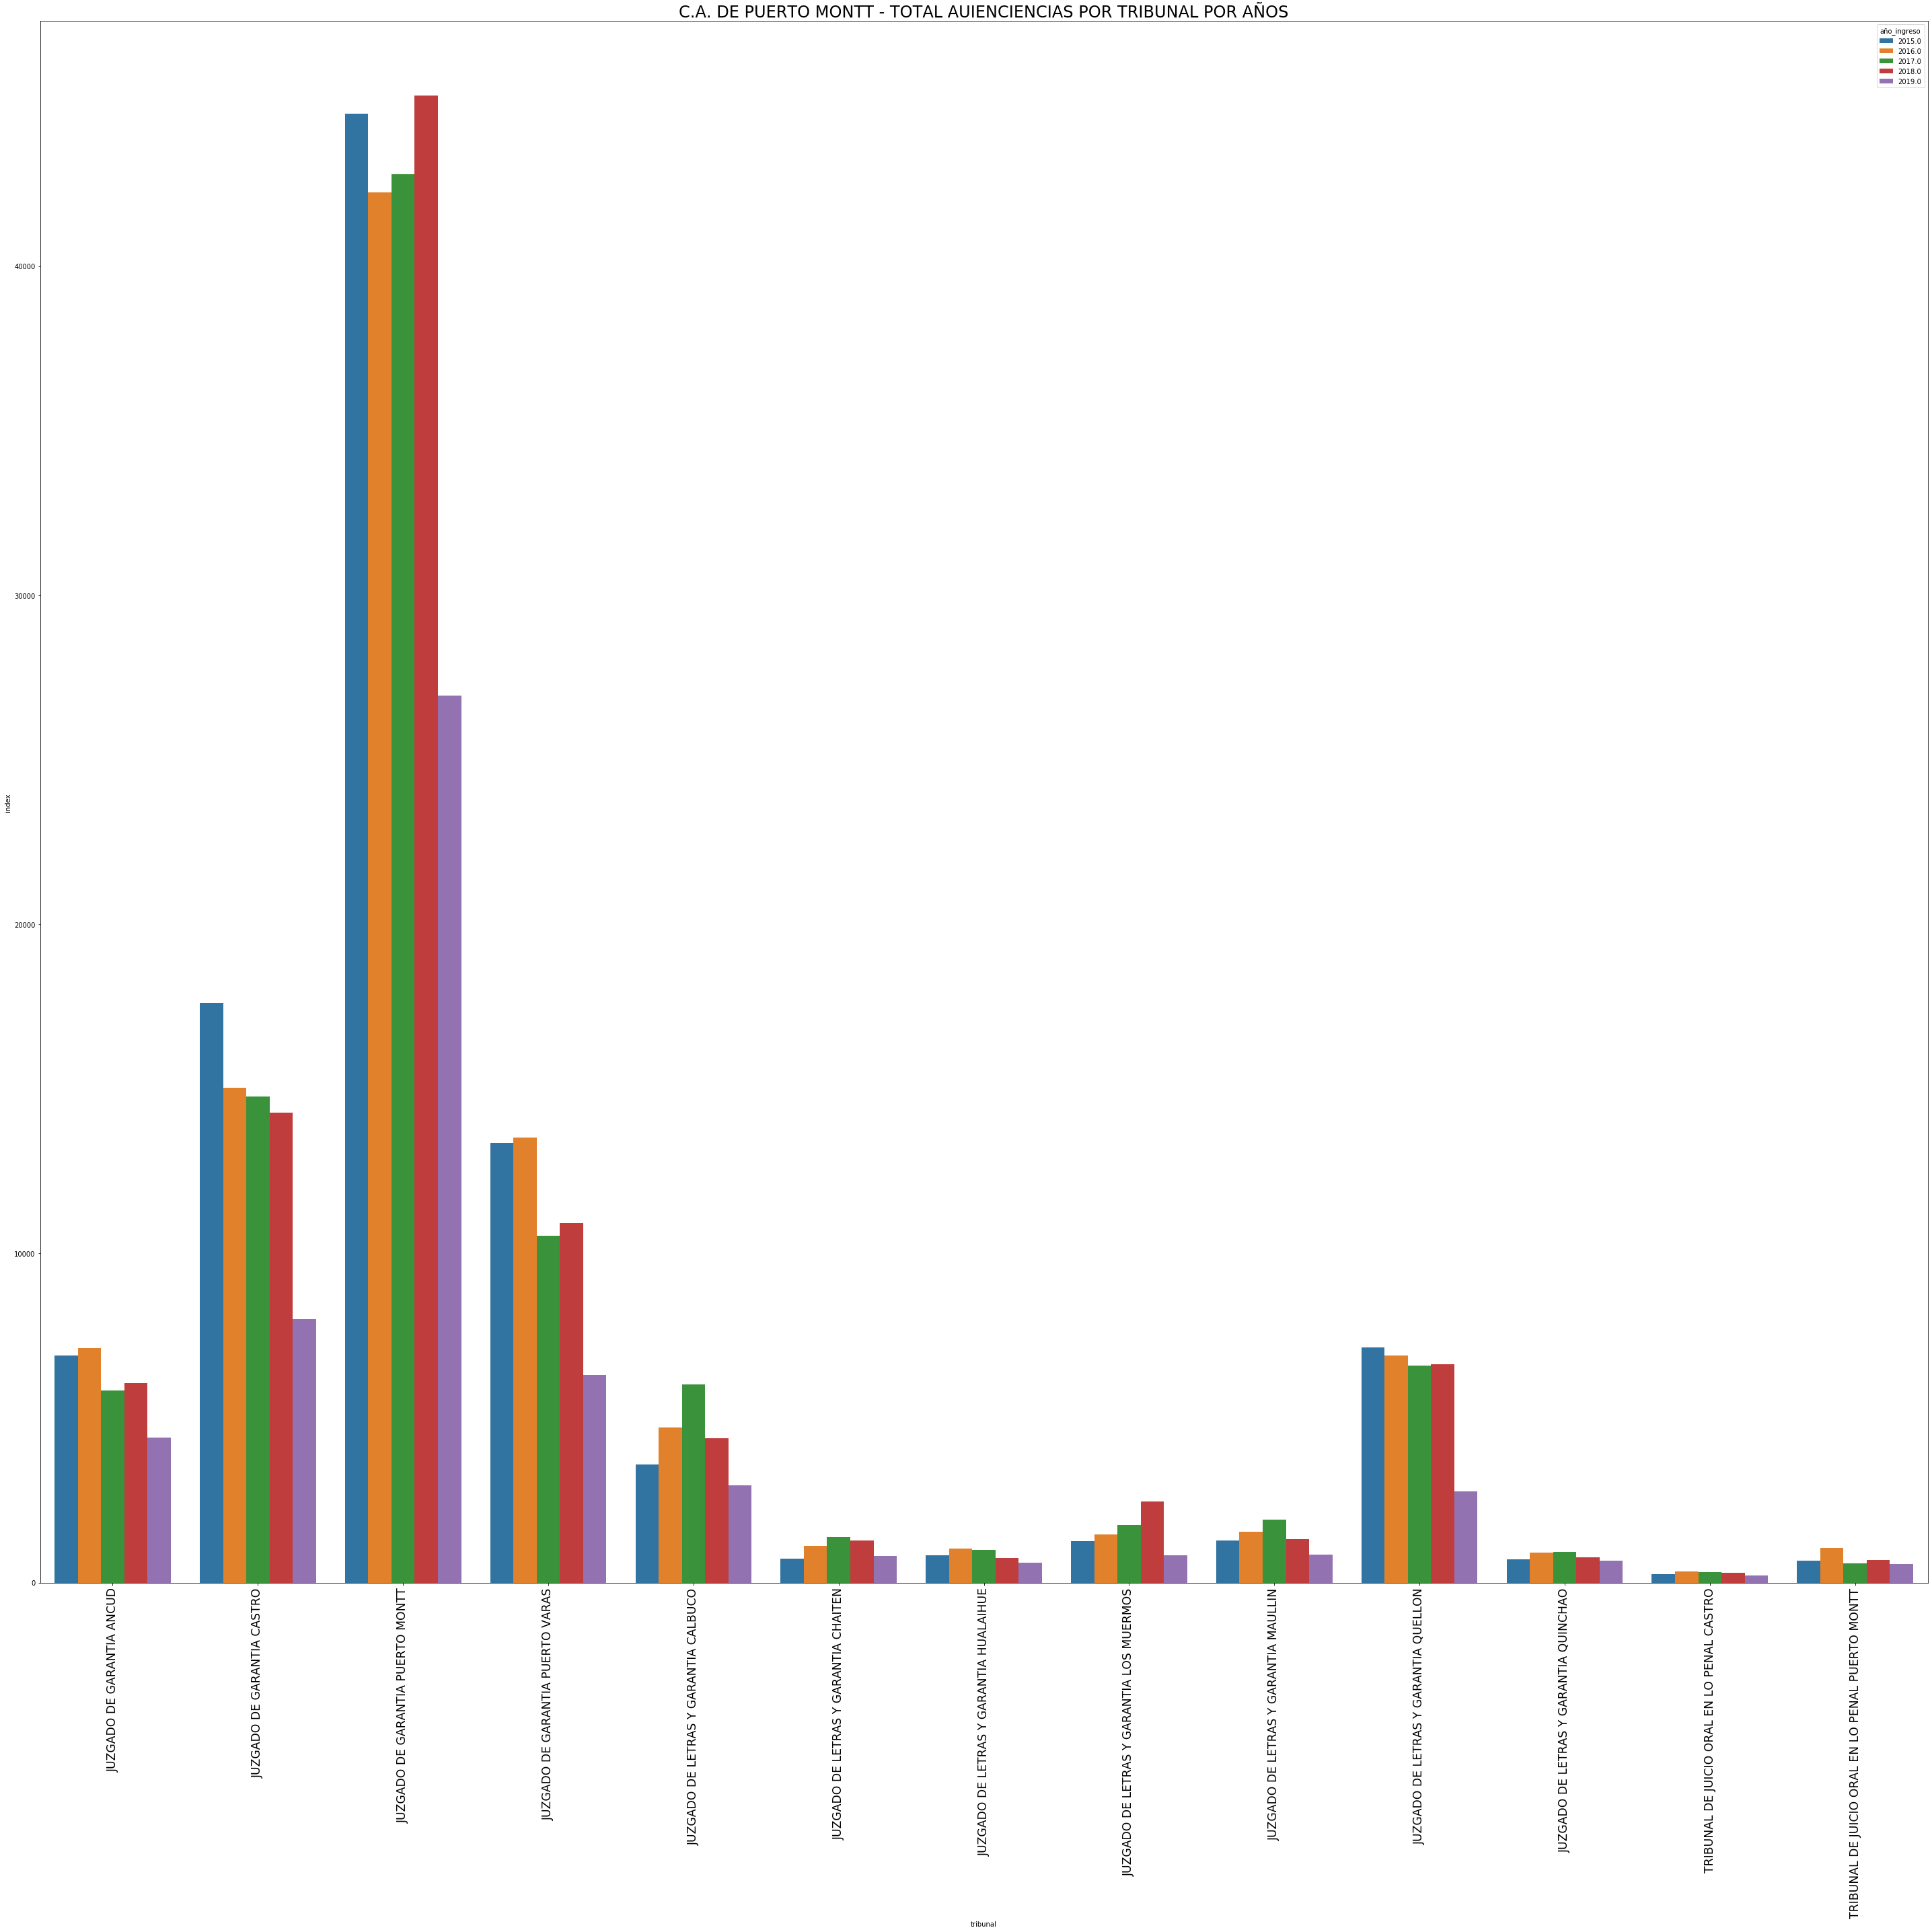

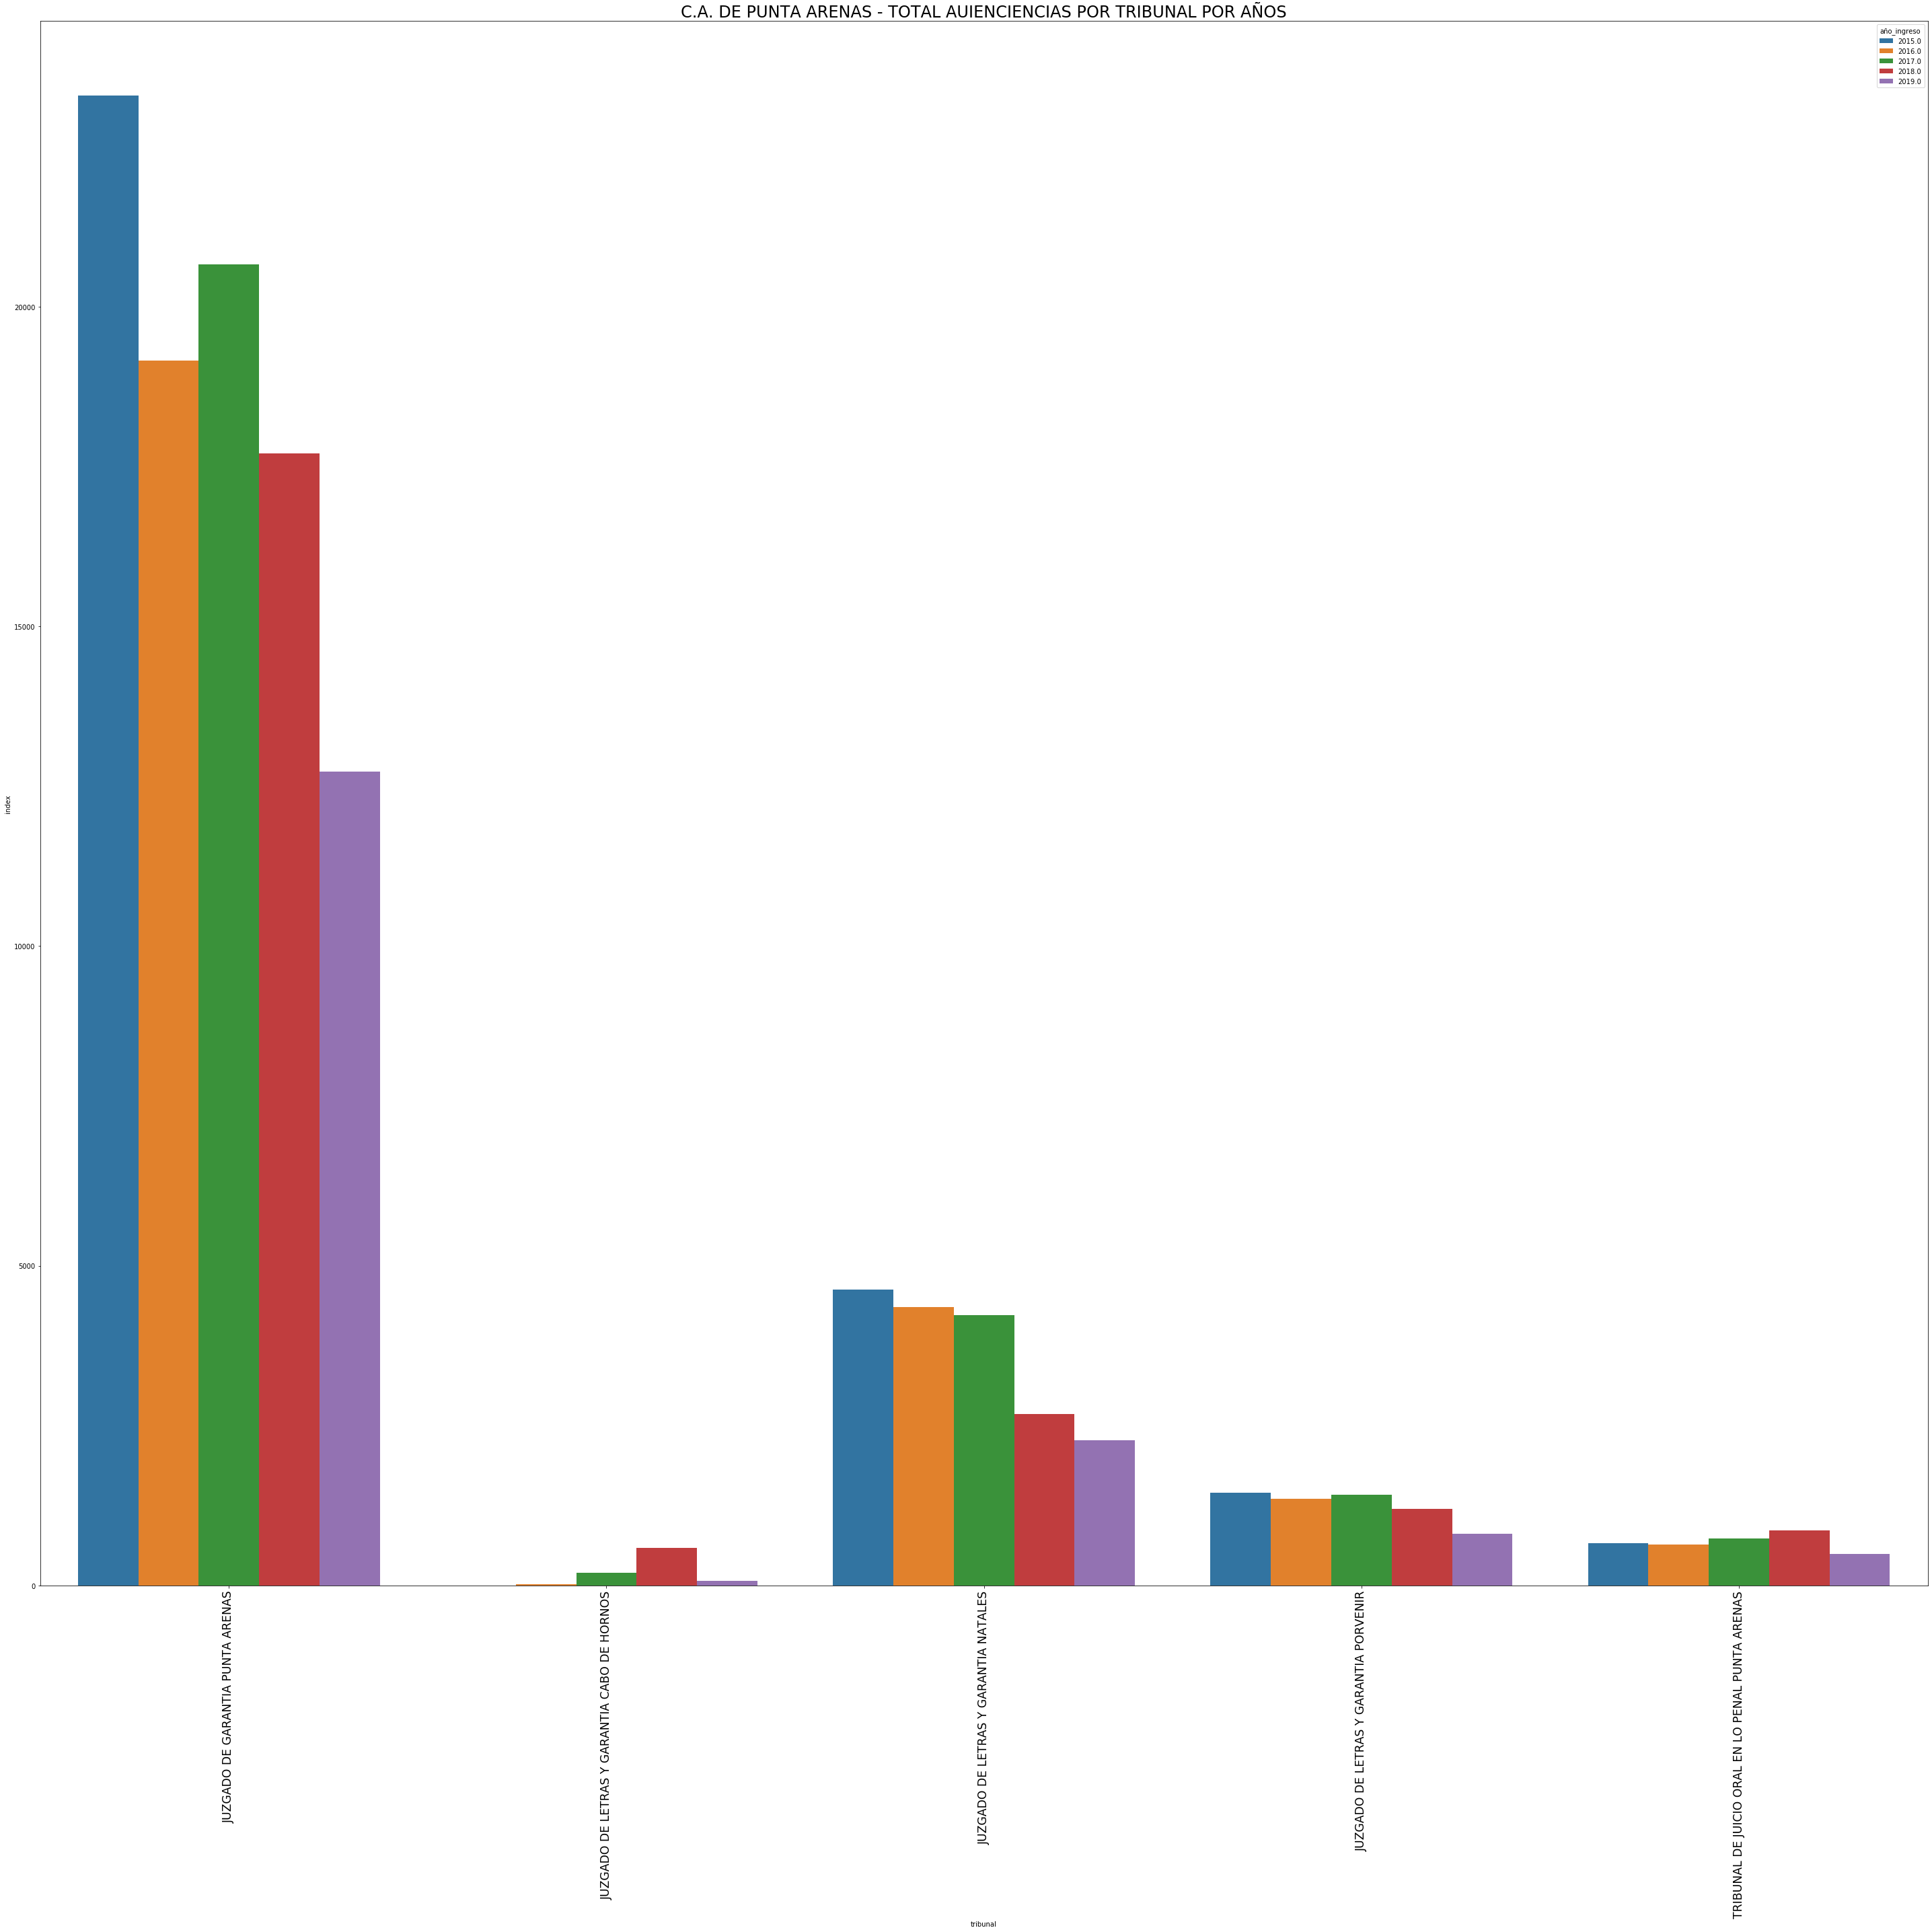

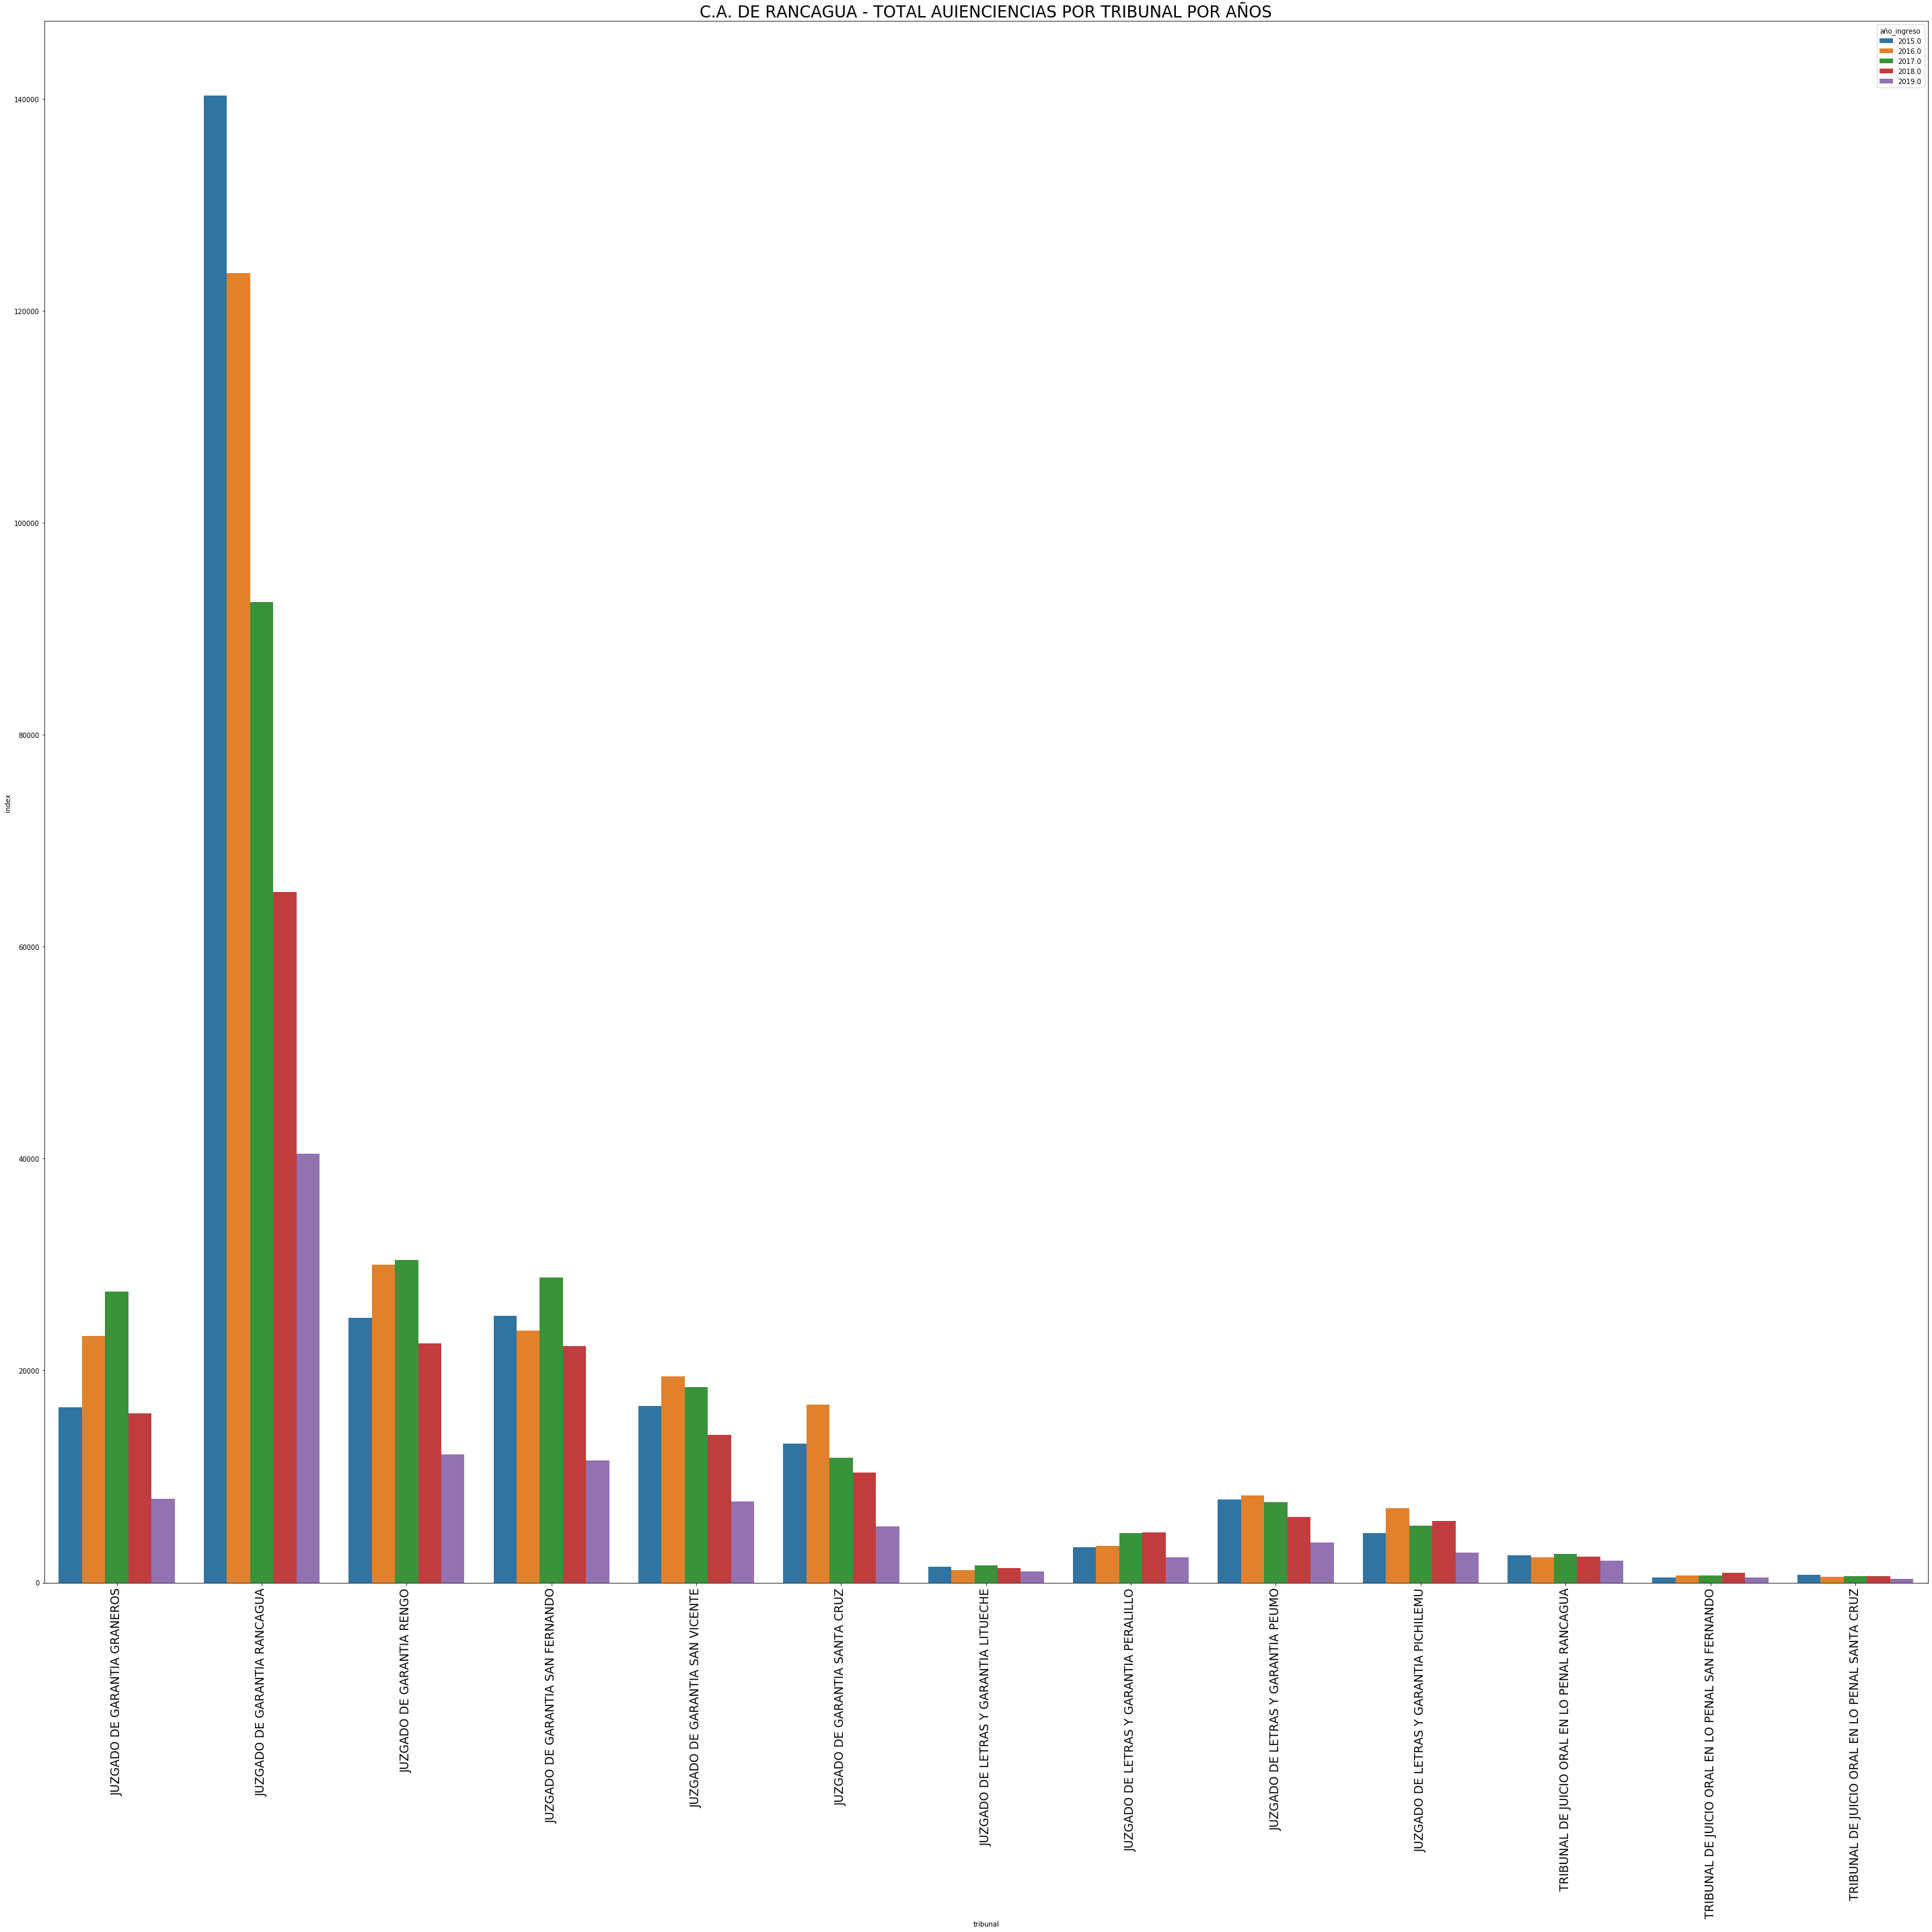

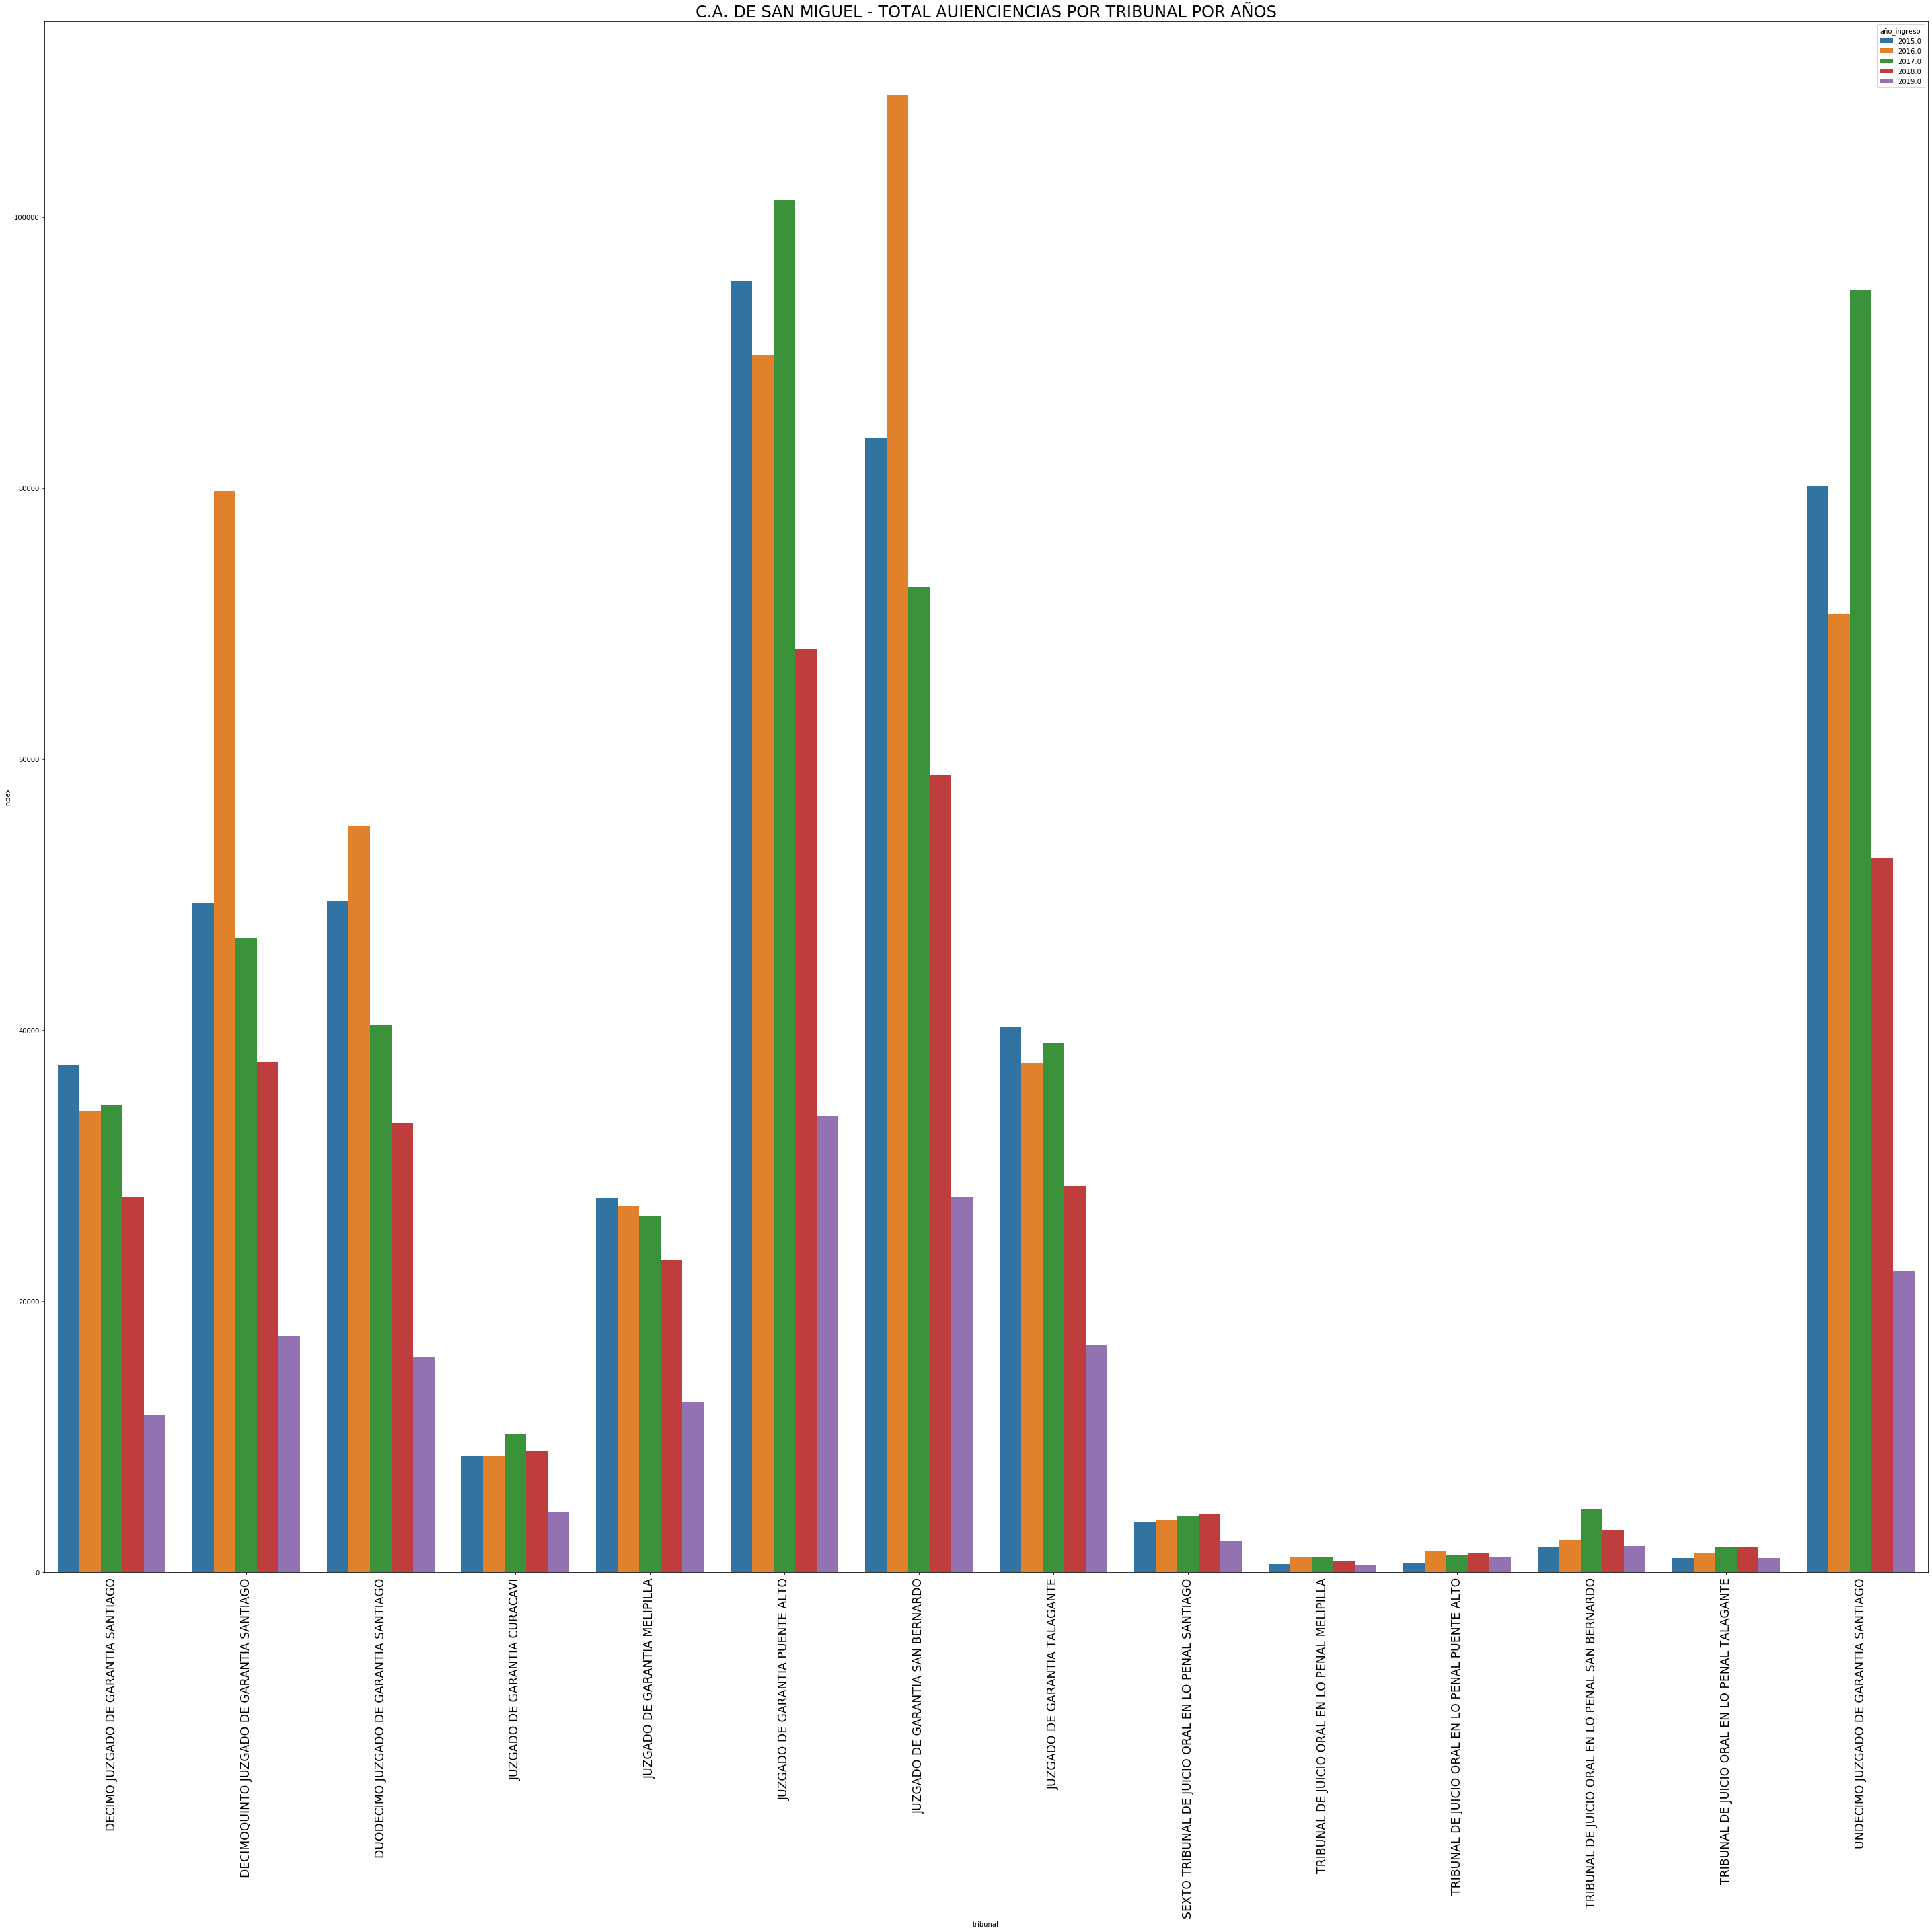

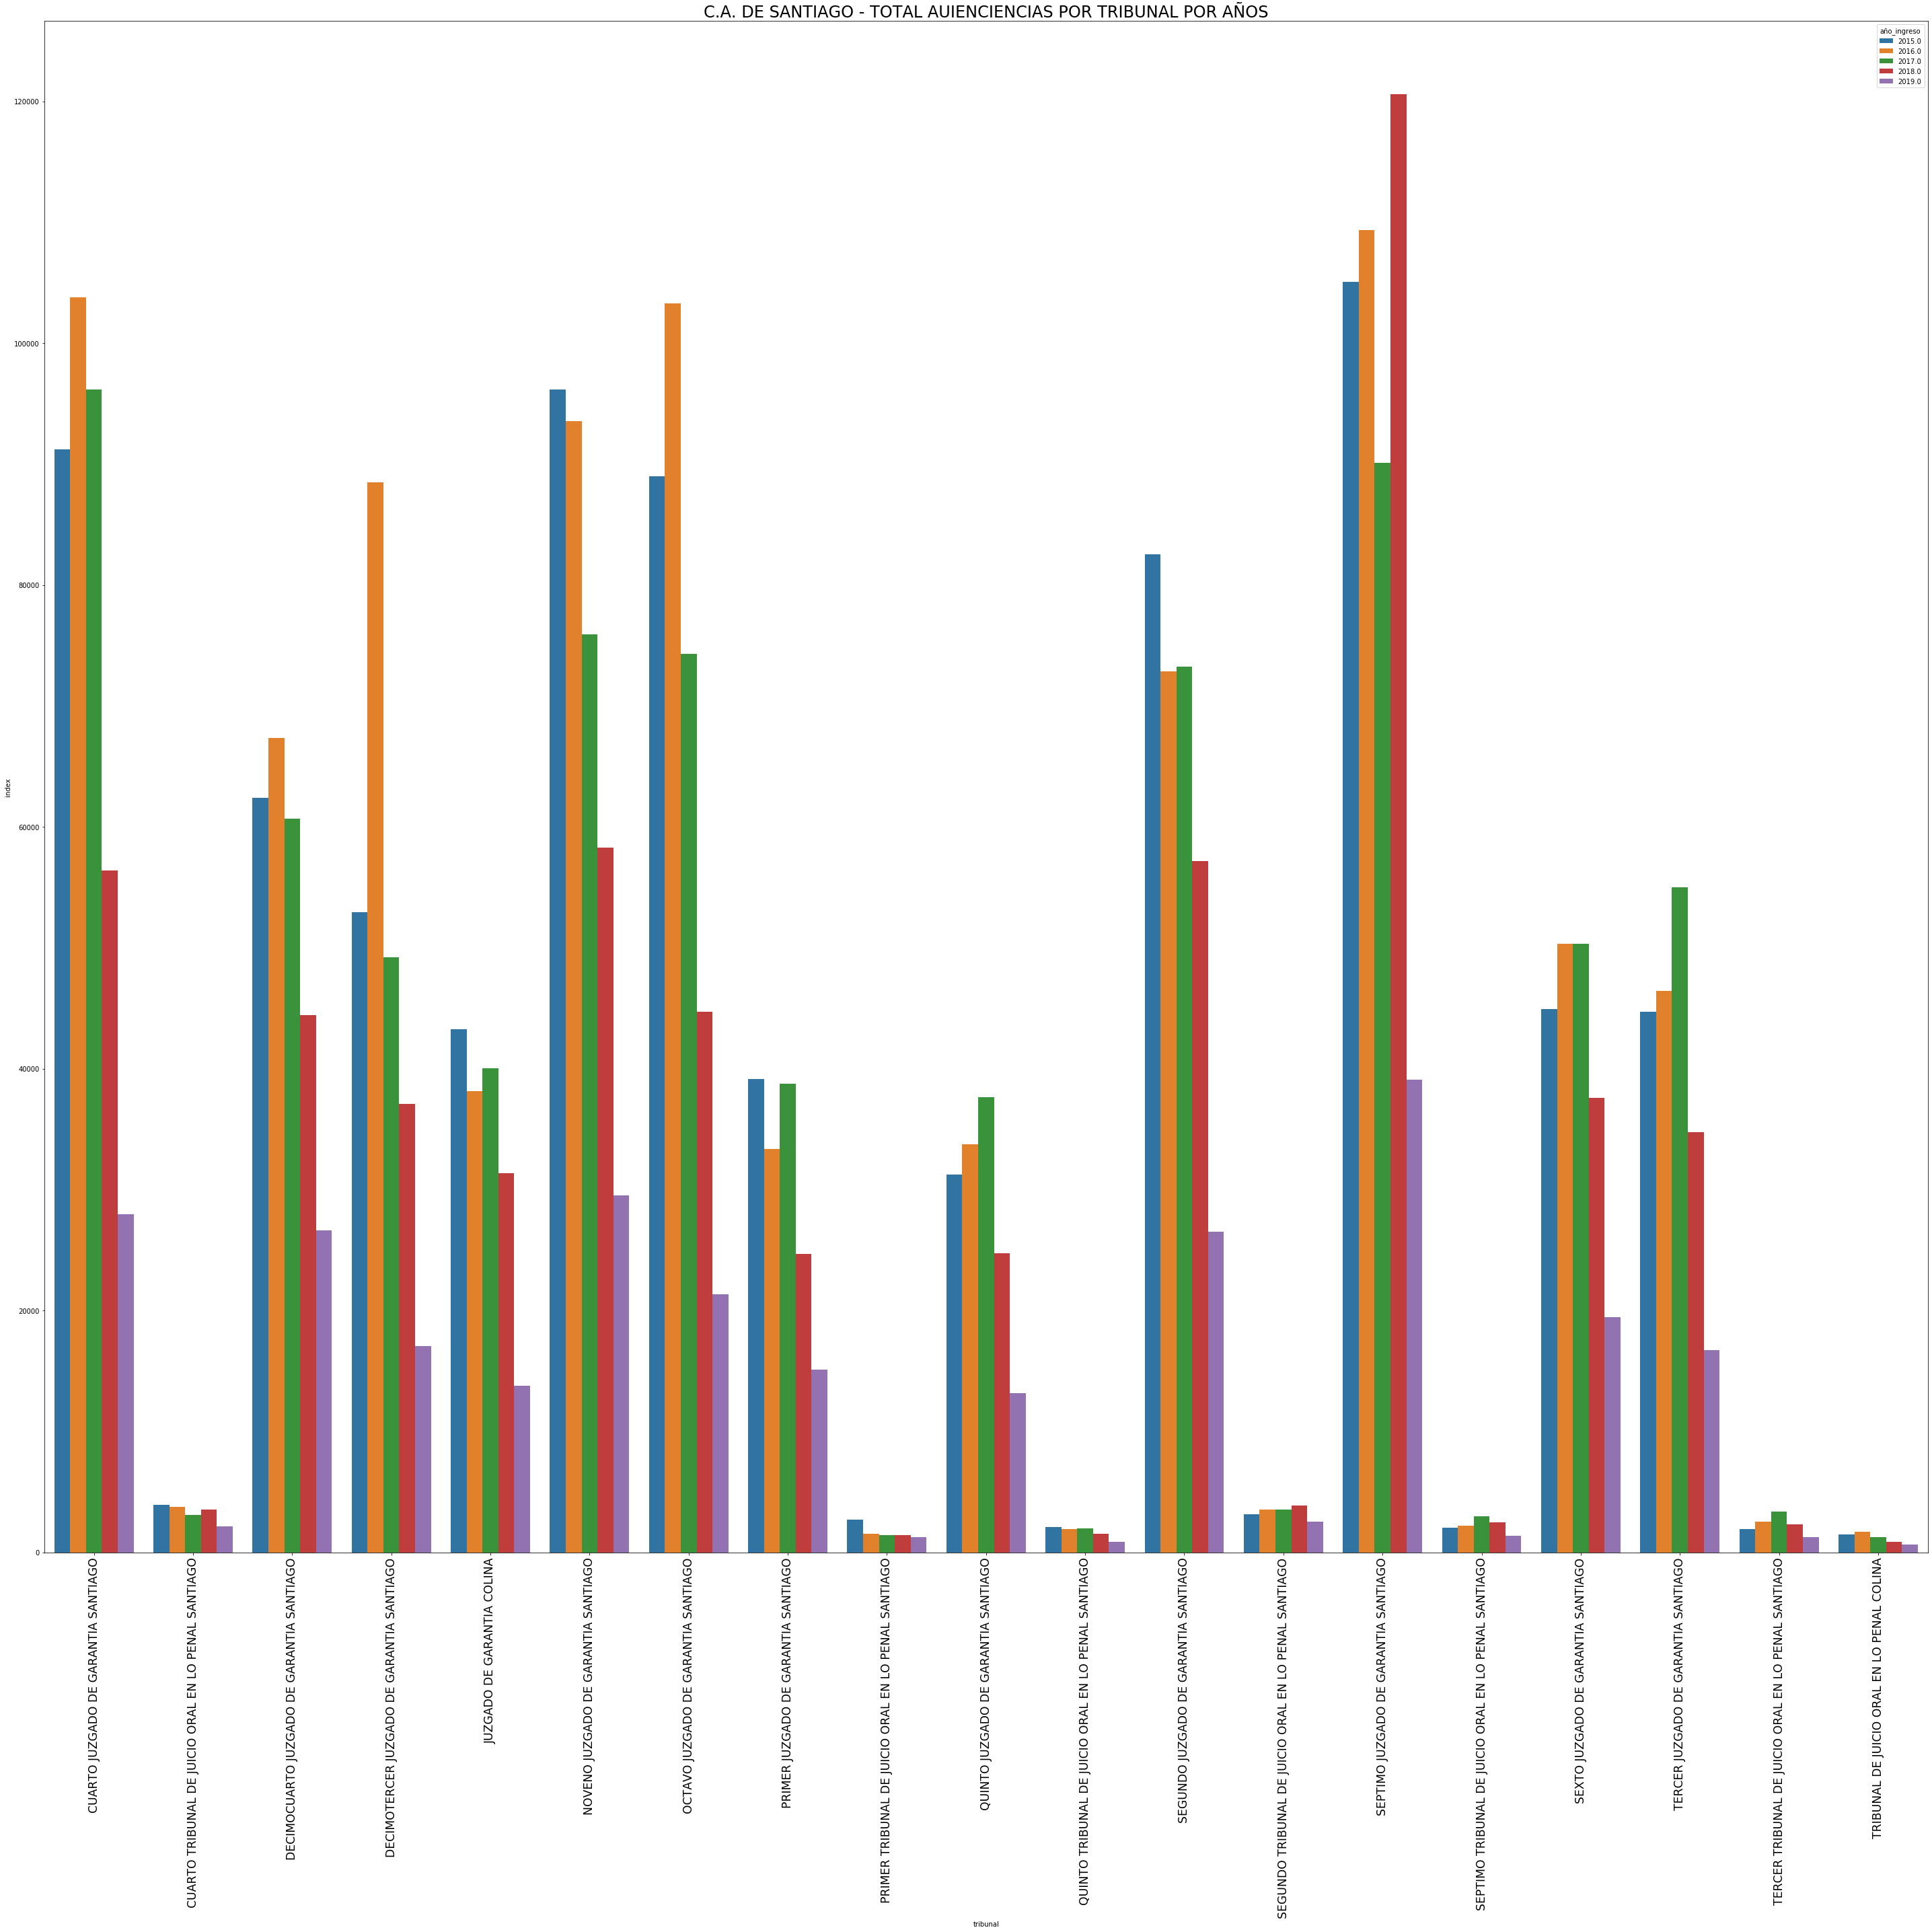

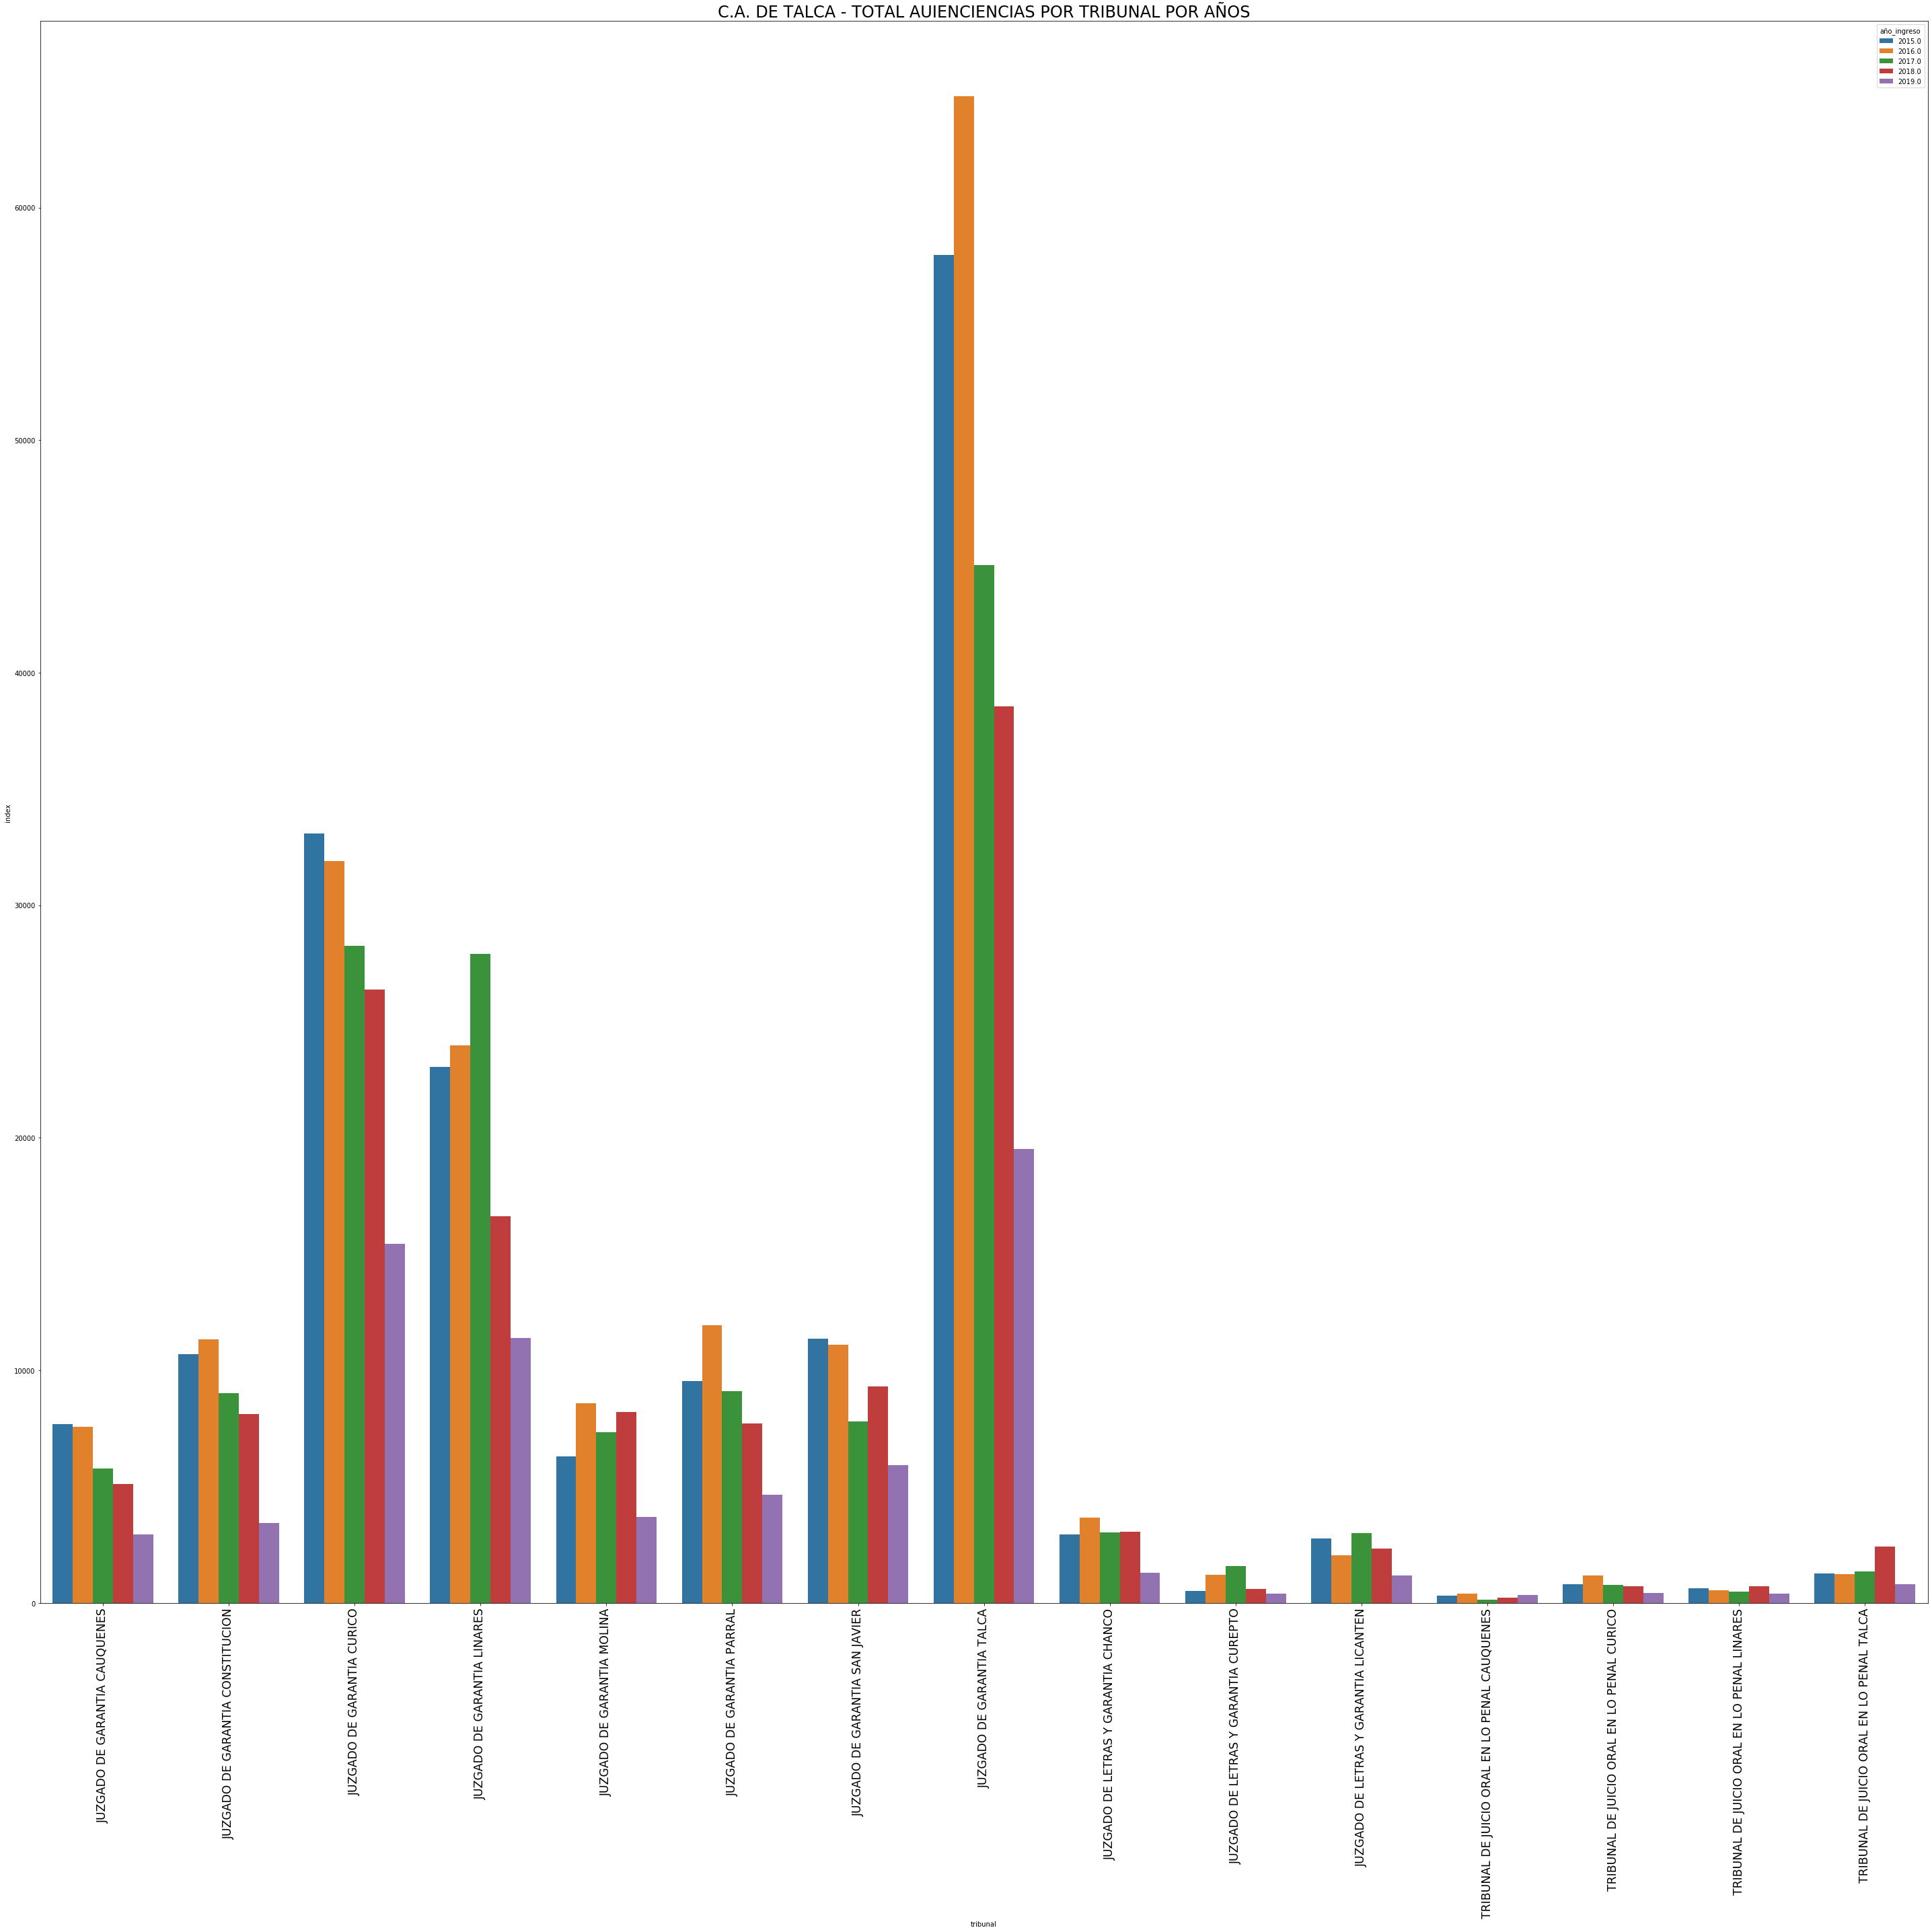

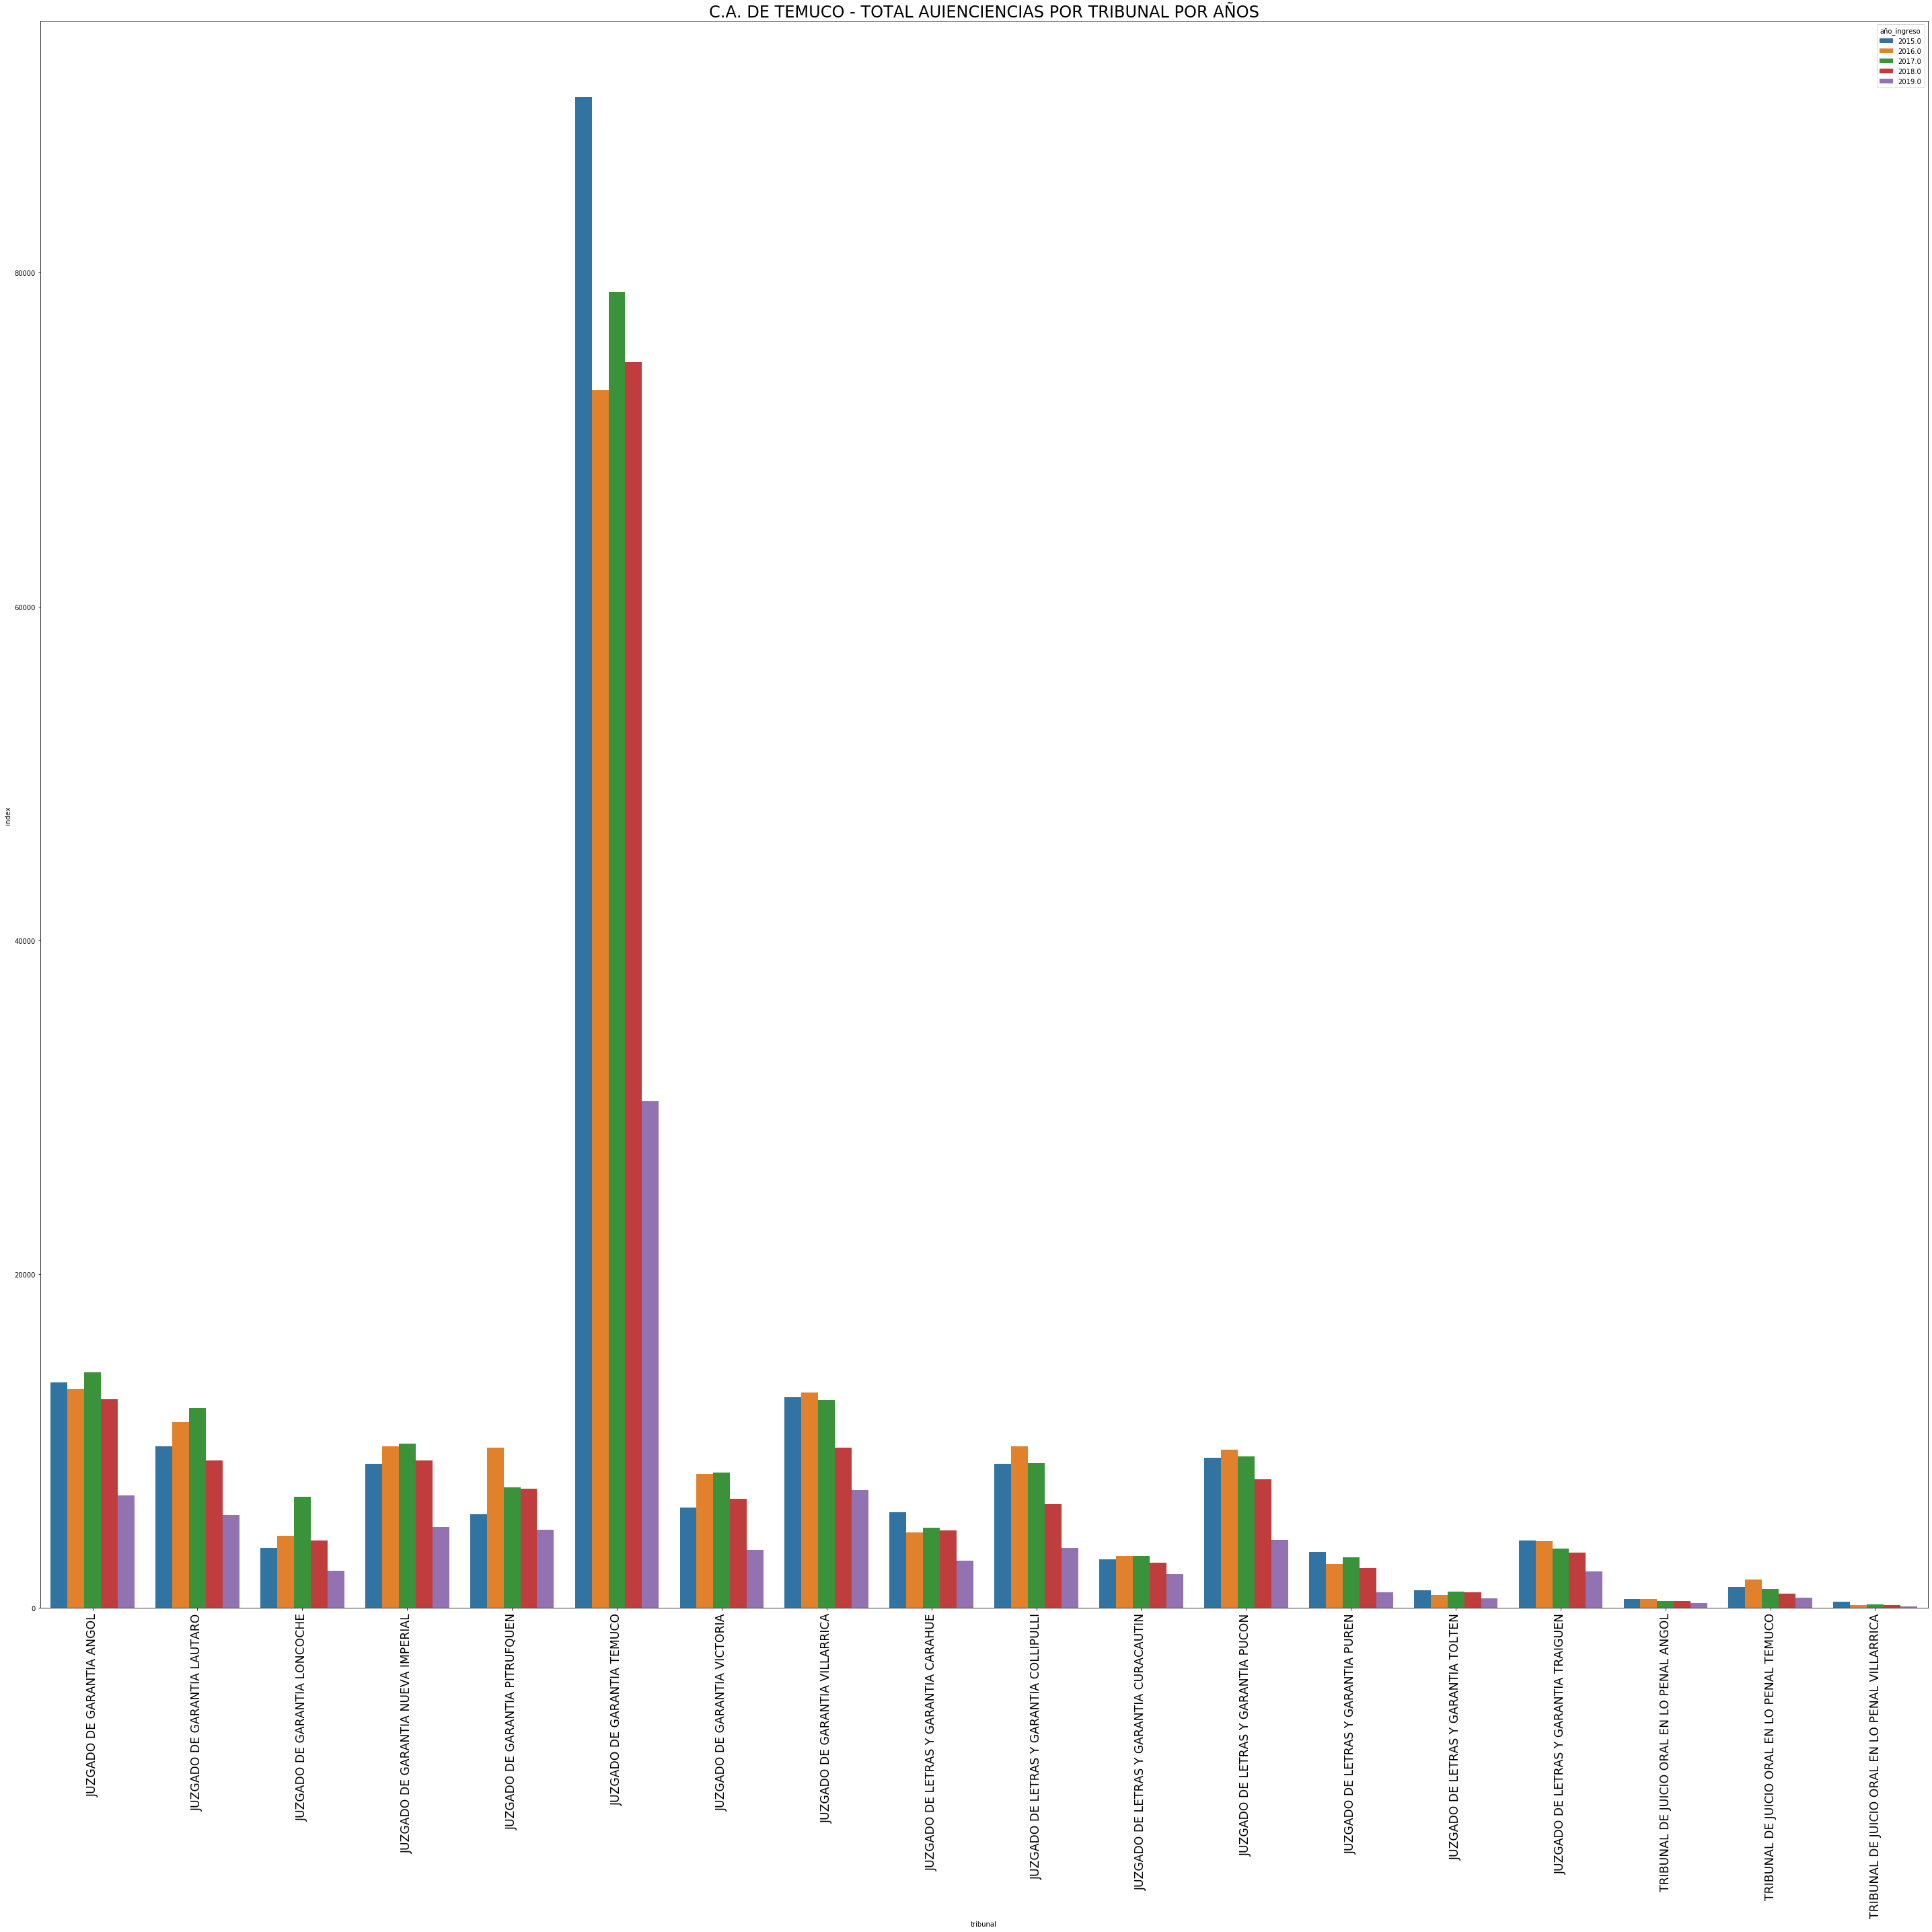

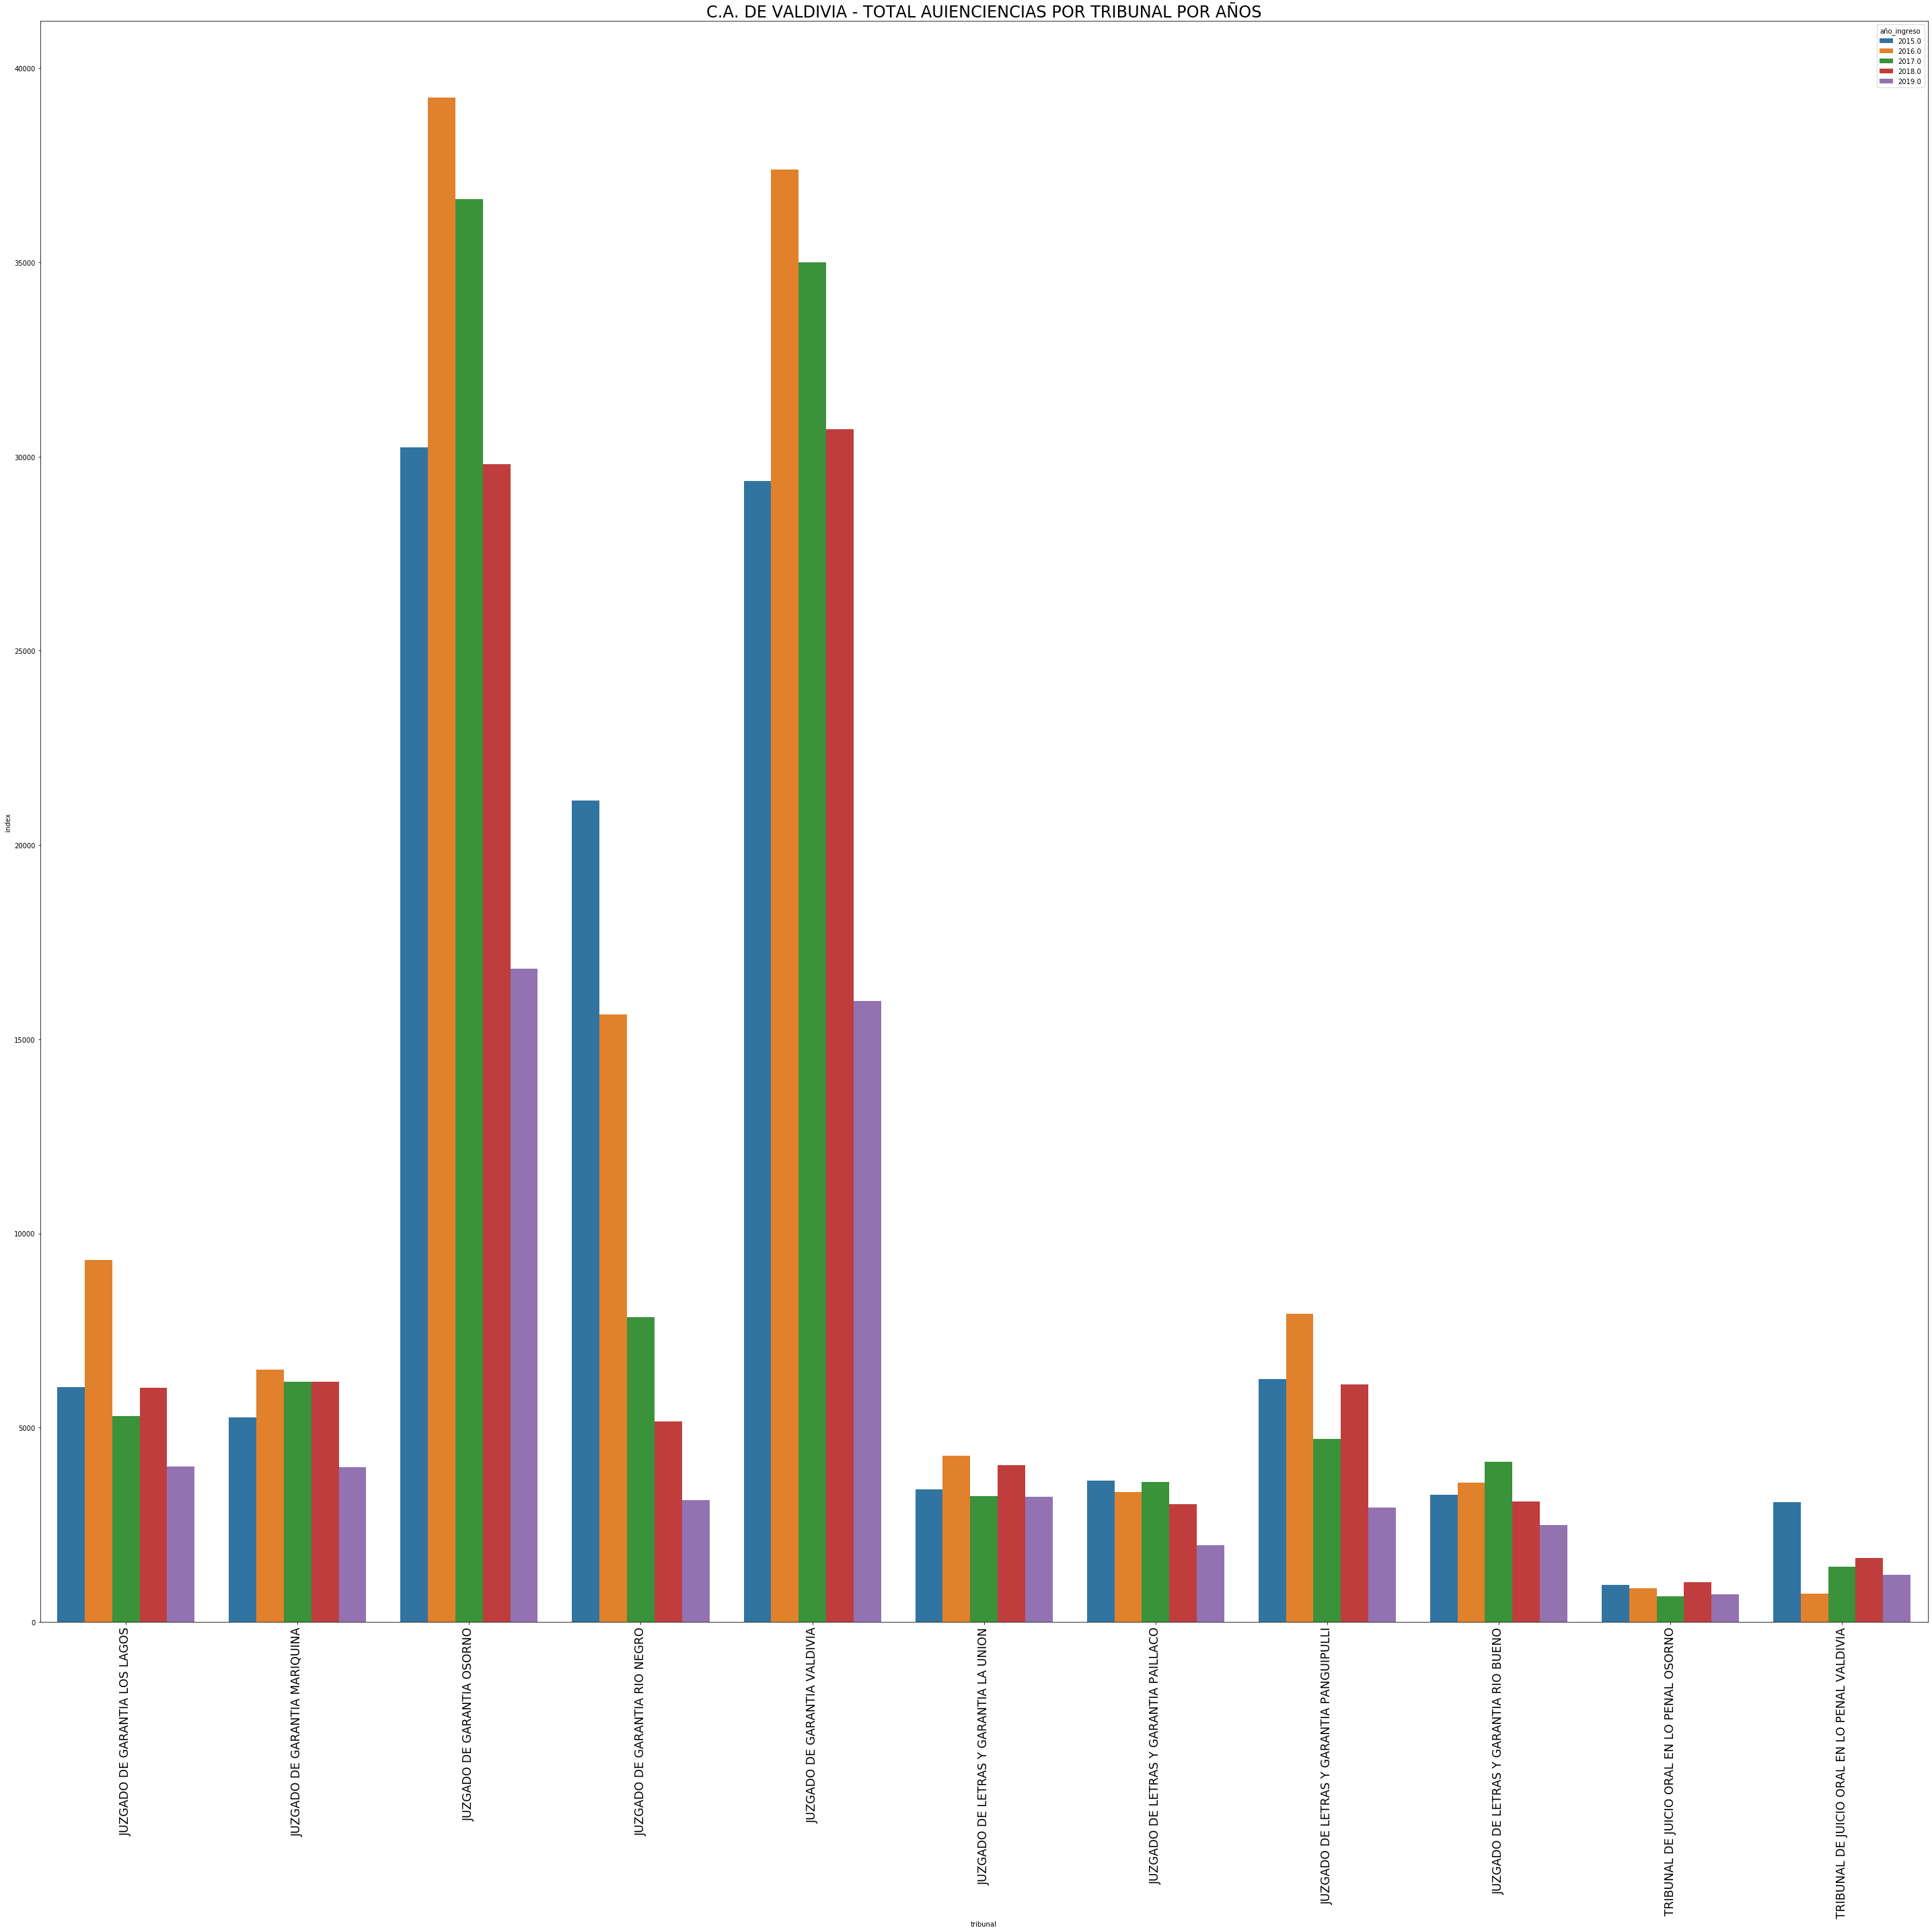

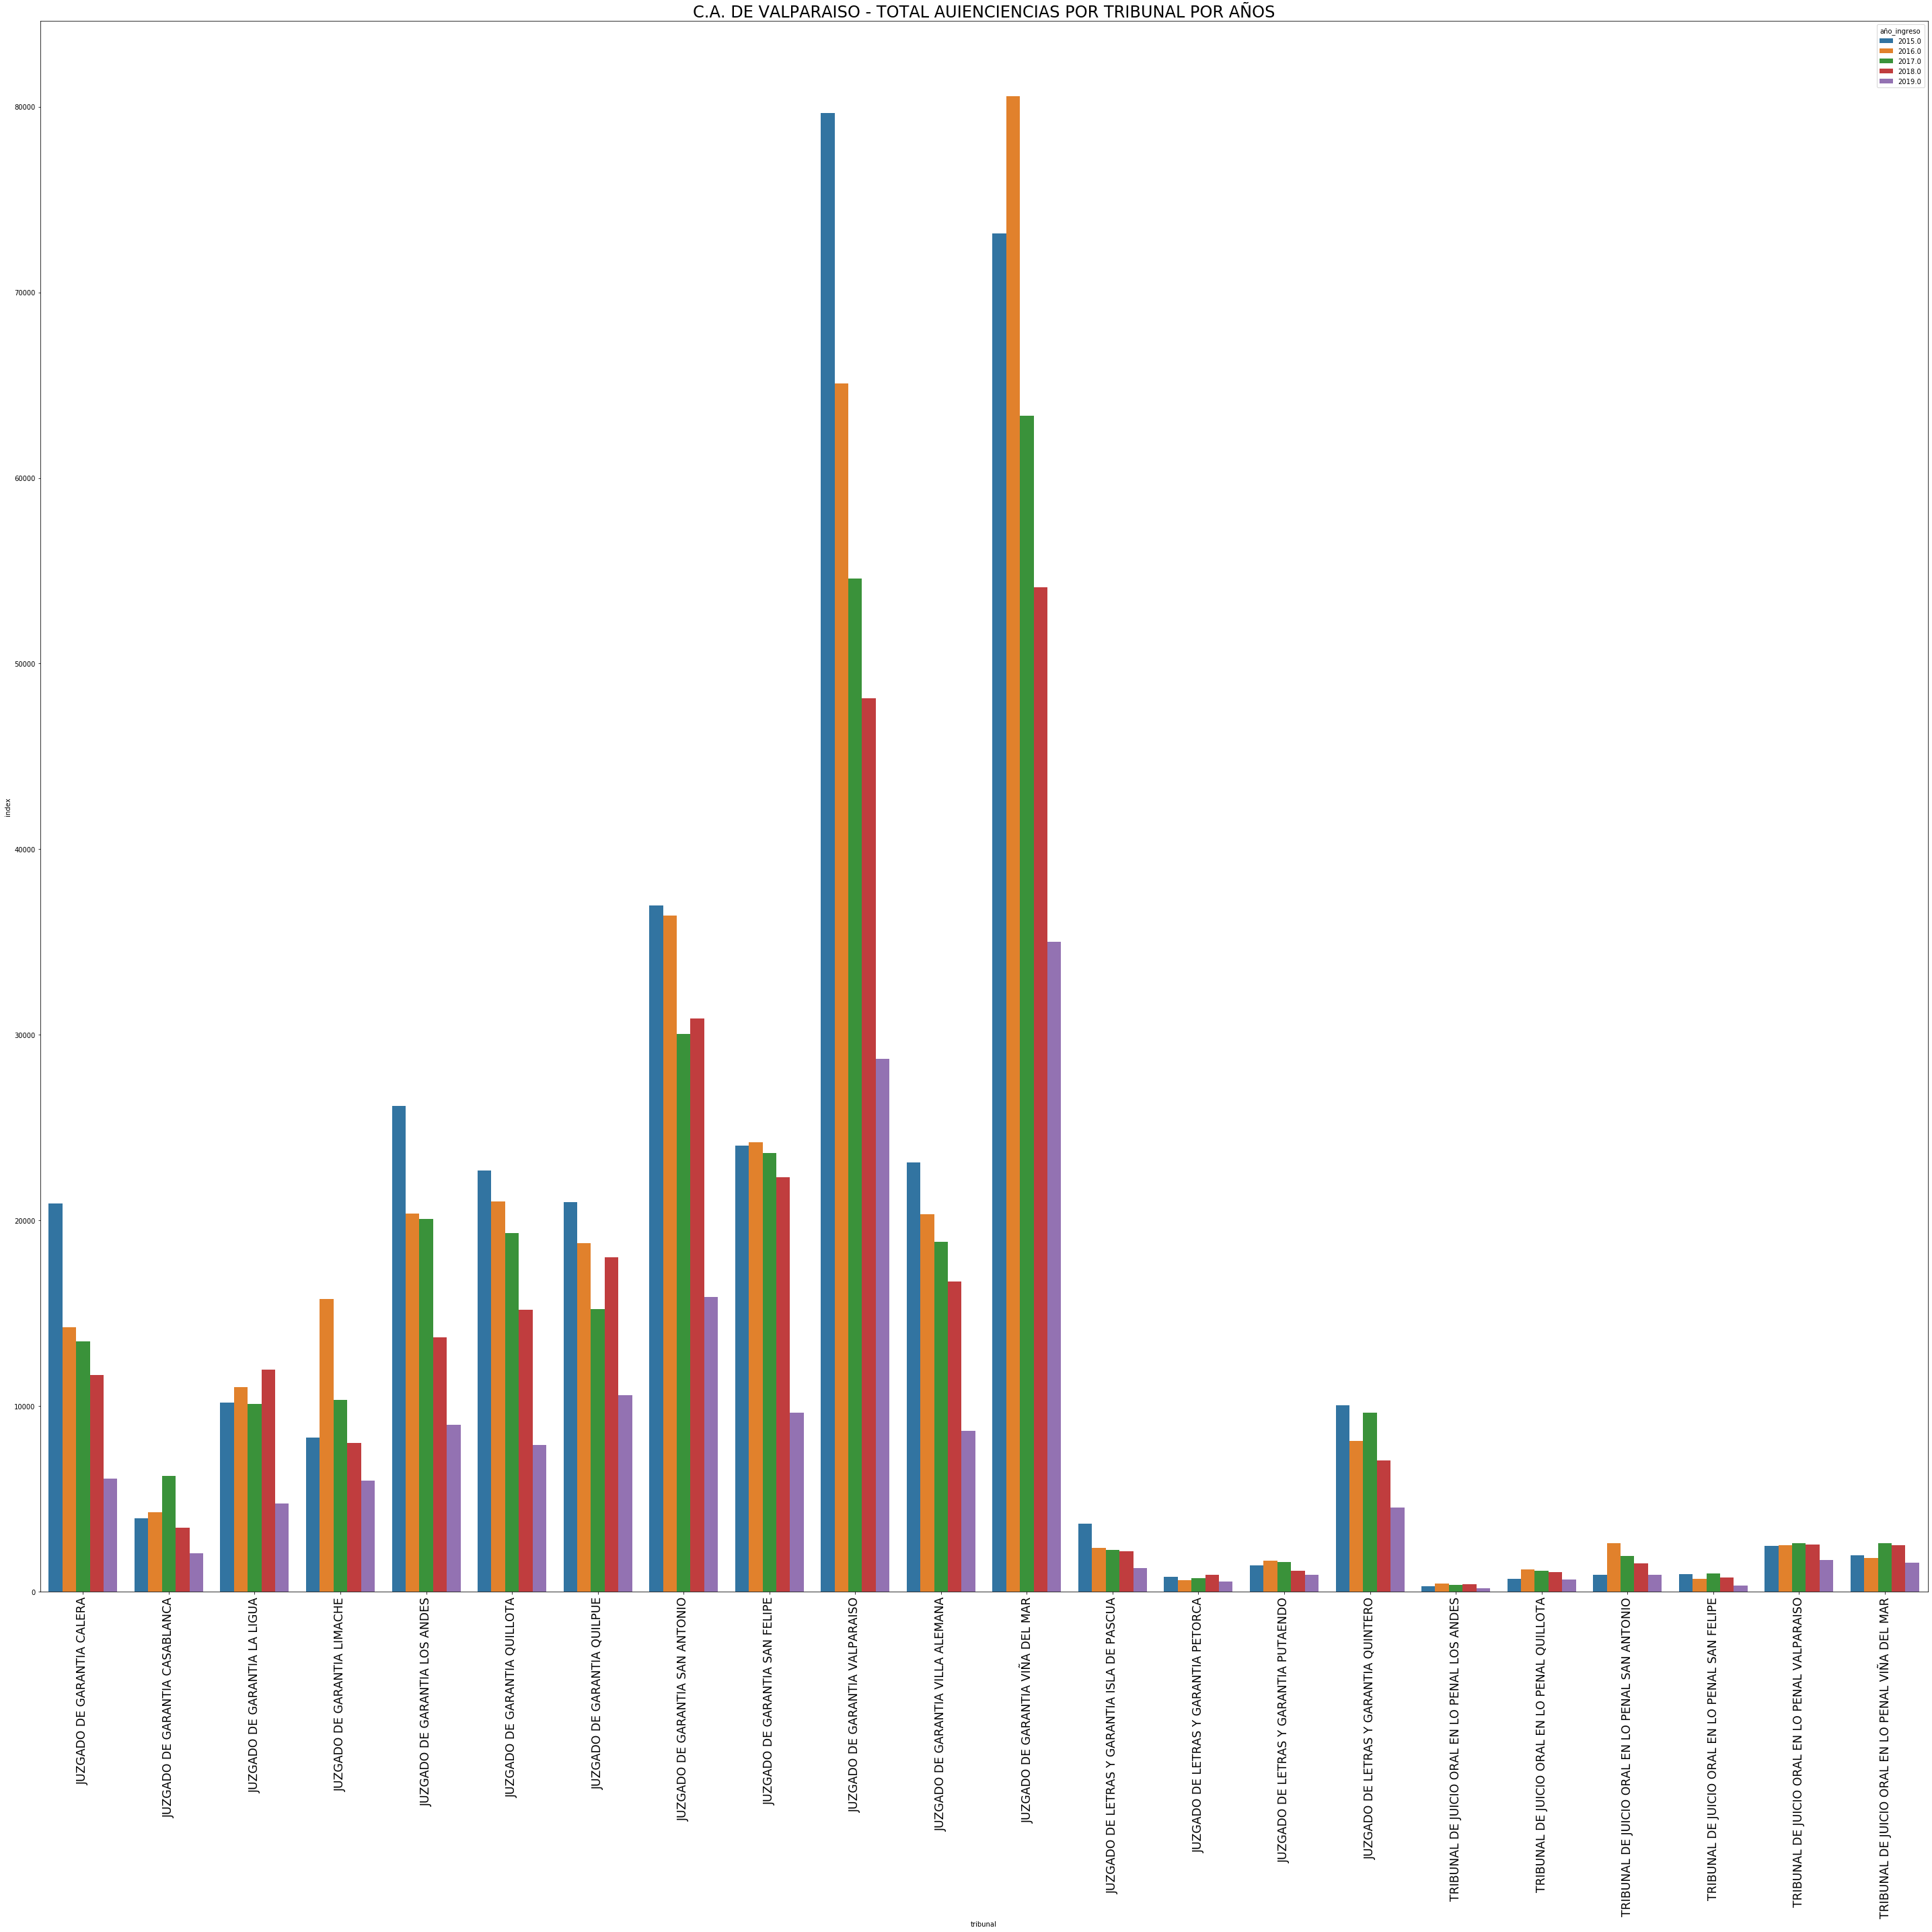

In [9]:
for corte, df_por_corte in df_causas.groupby(by=['corte']):
    summary = df_por_corte.groupby(by=['tribunal','año_ingreso']).count().reset_index()
    #total = df_por_corte[['tribunal','tipo_audiencia','fecha_audiencia','año_ingreso']].count()
    #print(summary)
    #print(total)
    #break
    plt.figure(figsize=(40,40))
    title = f'{corte} - TOTAL AUIENCIENCIAS POR TRIBUNAL POR AÑOS'
    plt.title(title, fontsize=24)

    ax = sns.barplot(x='tribunal', y='index', hue="año_ingreso", data=summary)
    
    ax.xaxis.set_tick_params(labelsize='xx-large')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(f'../reports/figures/{title}.svg')

    plt.show()

TIPOS DE AUDIENCIAS PERIODO 2015-2019

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102]),
 <a list of 103 Text xticklabel objects>)

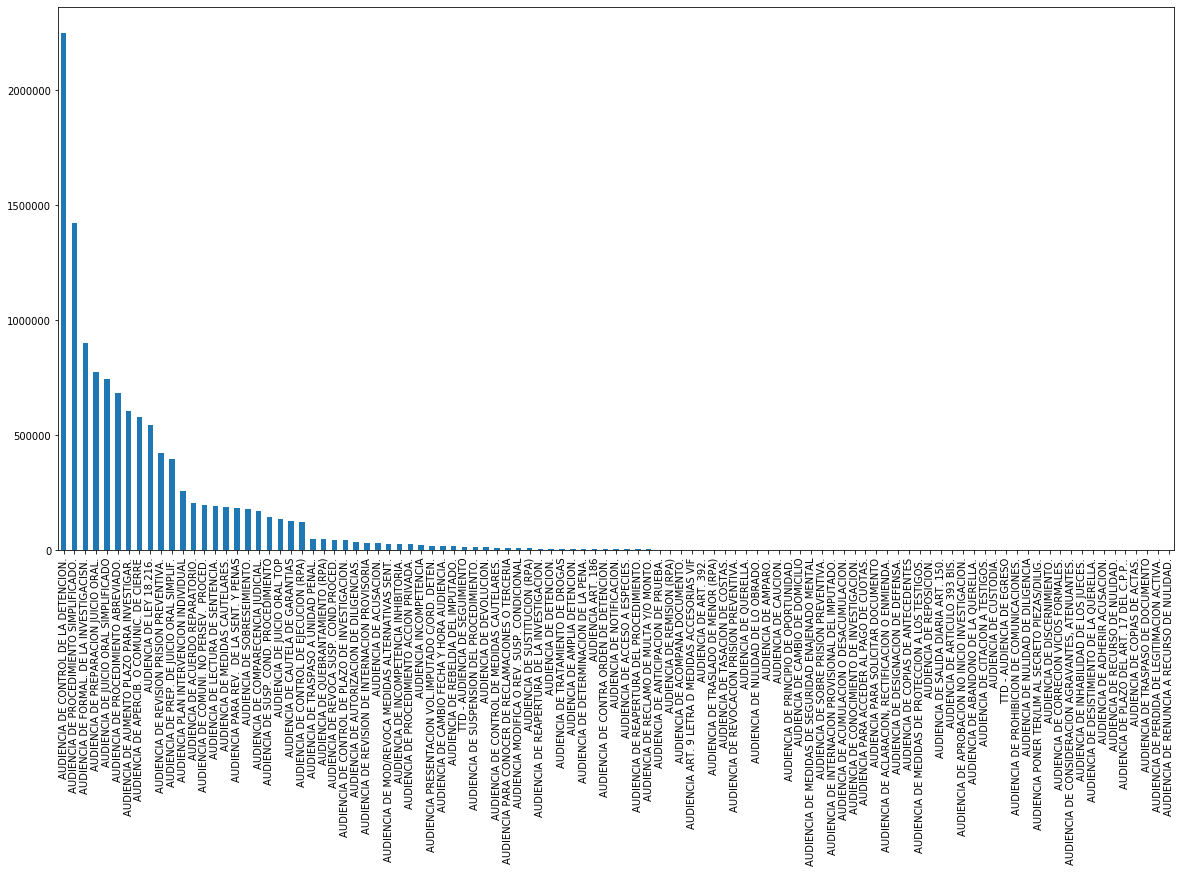

In [10]:
df_causas.tipo_audiencia.value_counts().plot(figsize=(20,10), kind="bar")
plt.xticks(rotation=90)

AUDIENCIAS QUE DAN INICIO A UN PROCESO PENAL POR CORTES Y POR AÑOS

In [11]:
audiencias_de_interes = ['AUDIENCIA DE FORMAL. DE LA INVESTIGACISN.','AUDIENCIA DE CONTROL DE LA DETENCION.']

inicio_proceso = df_causas.query('tipo_audiencia in @audiencias_de_interes')

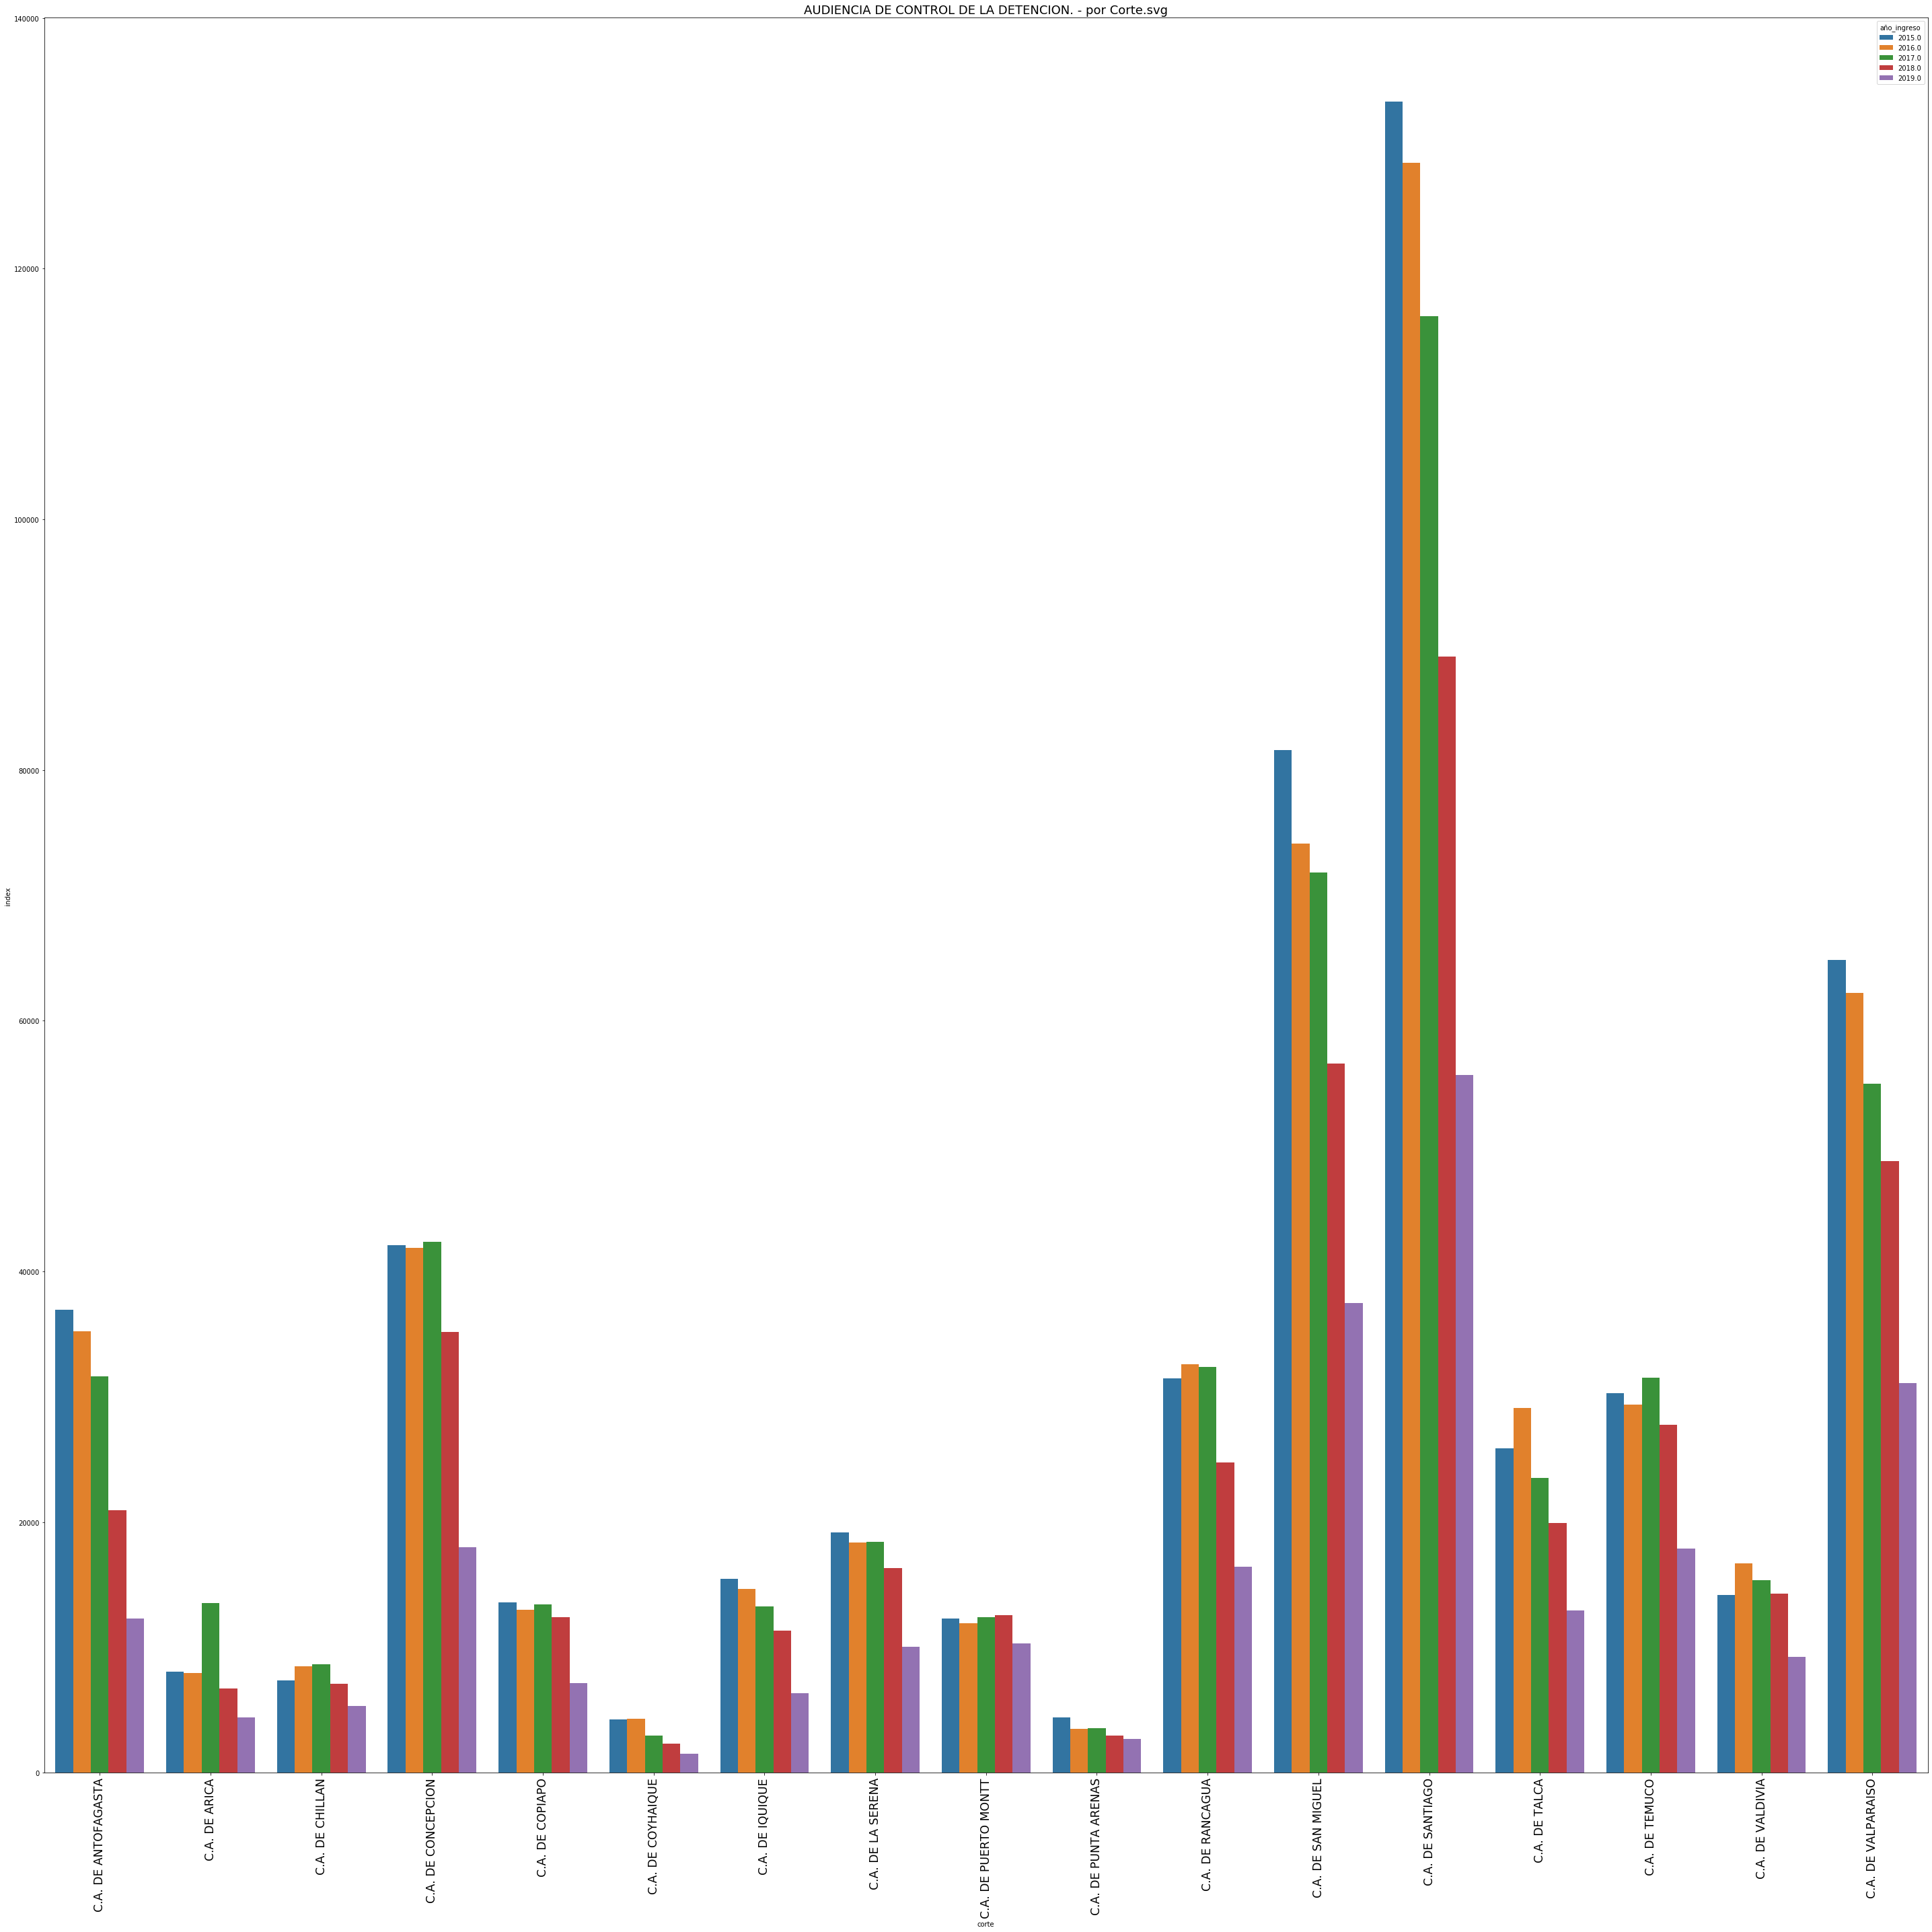

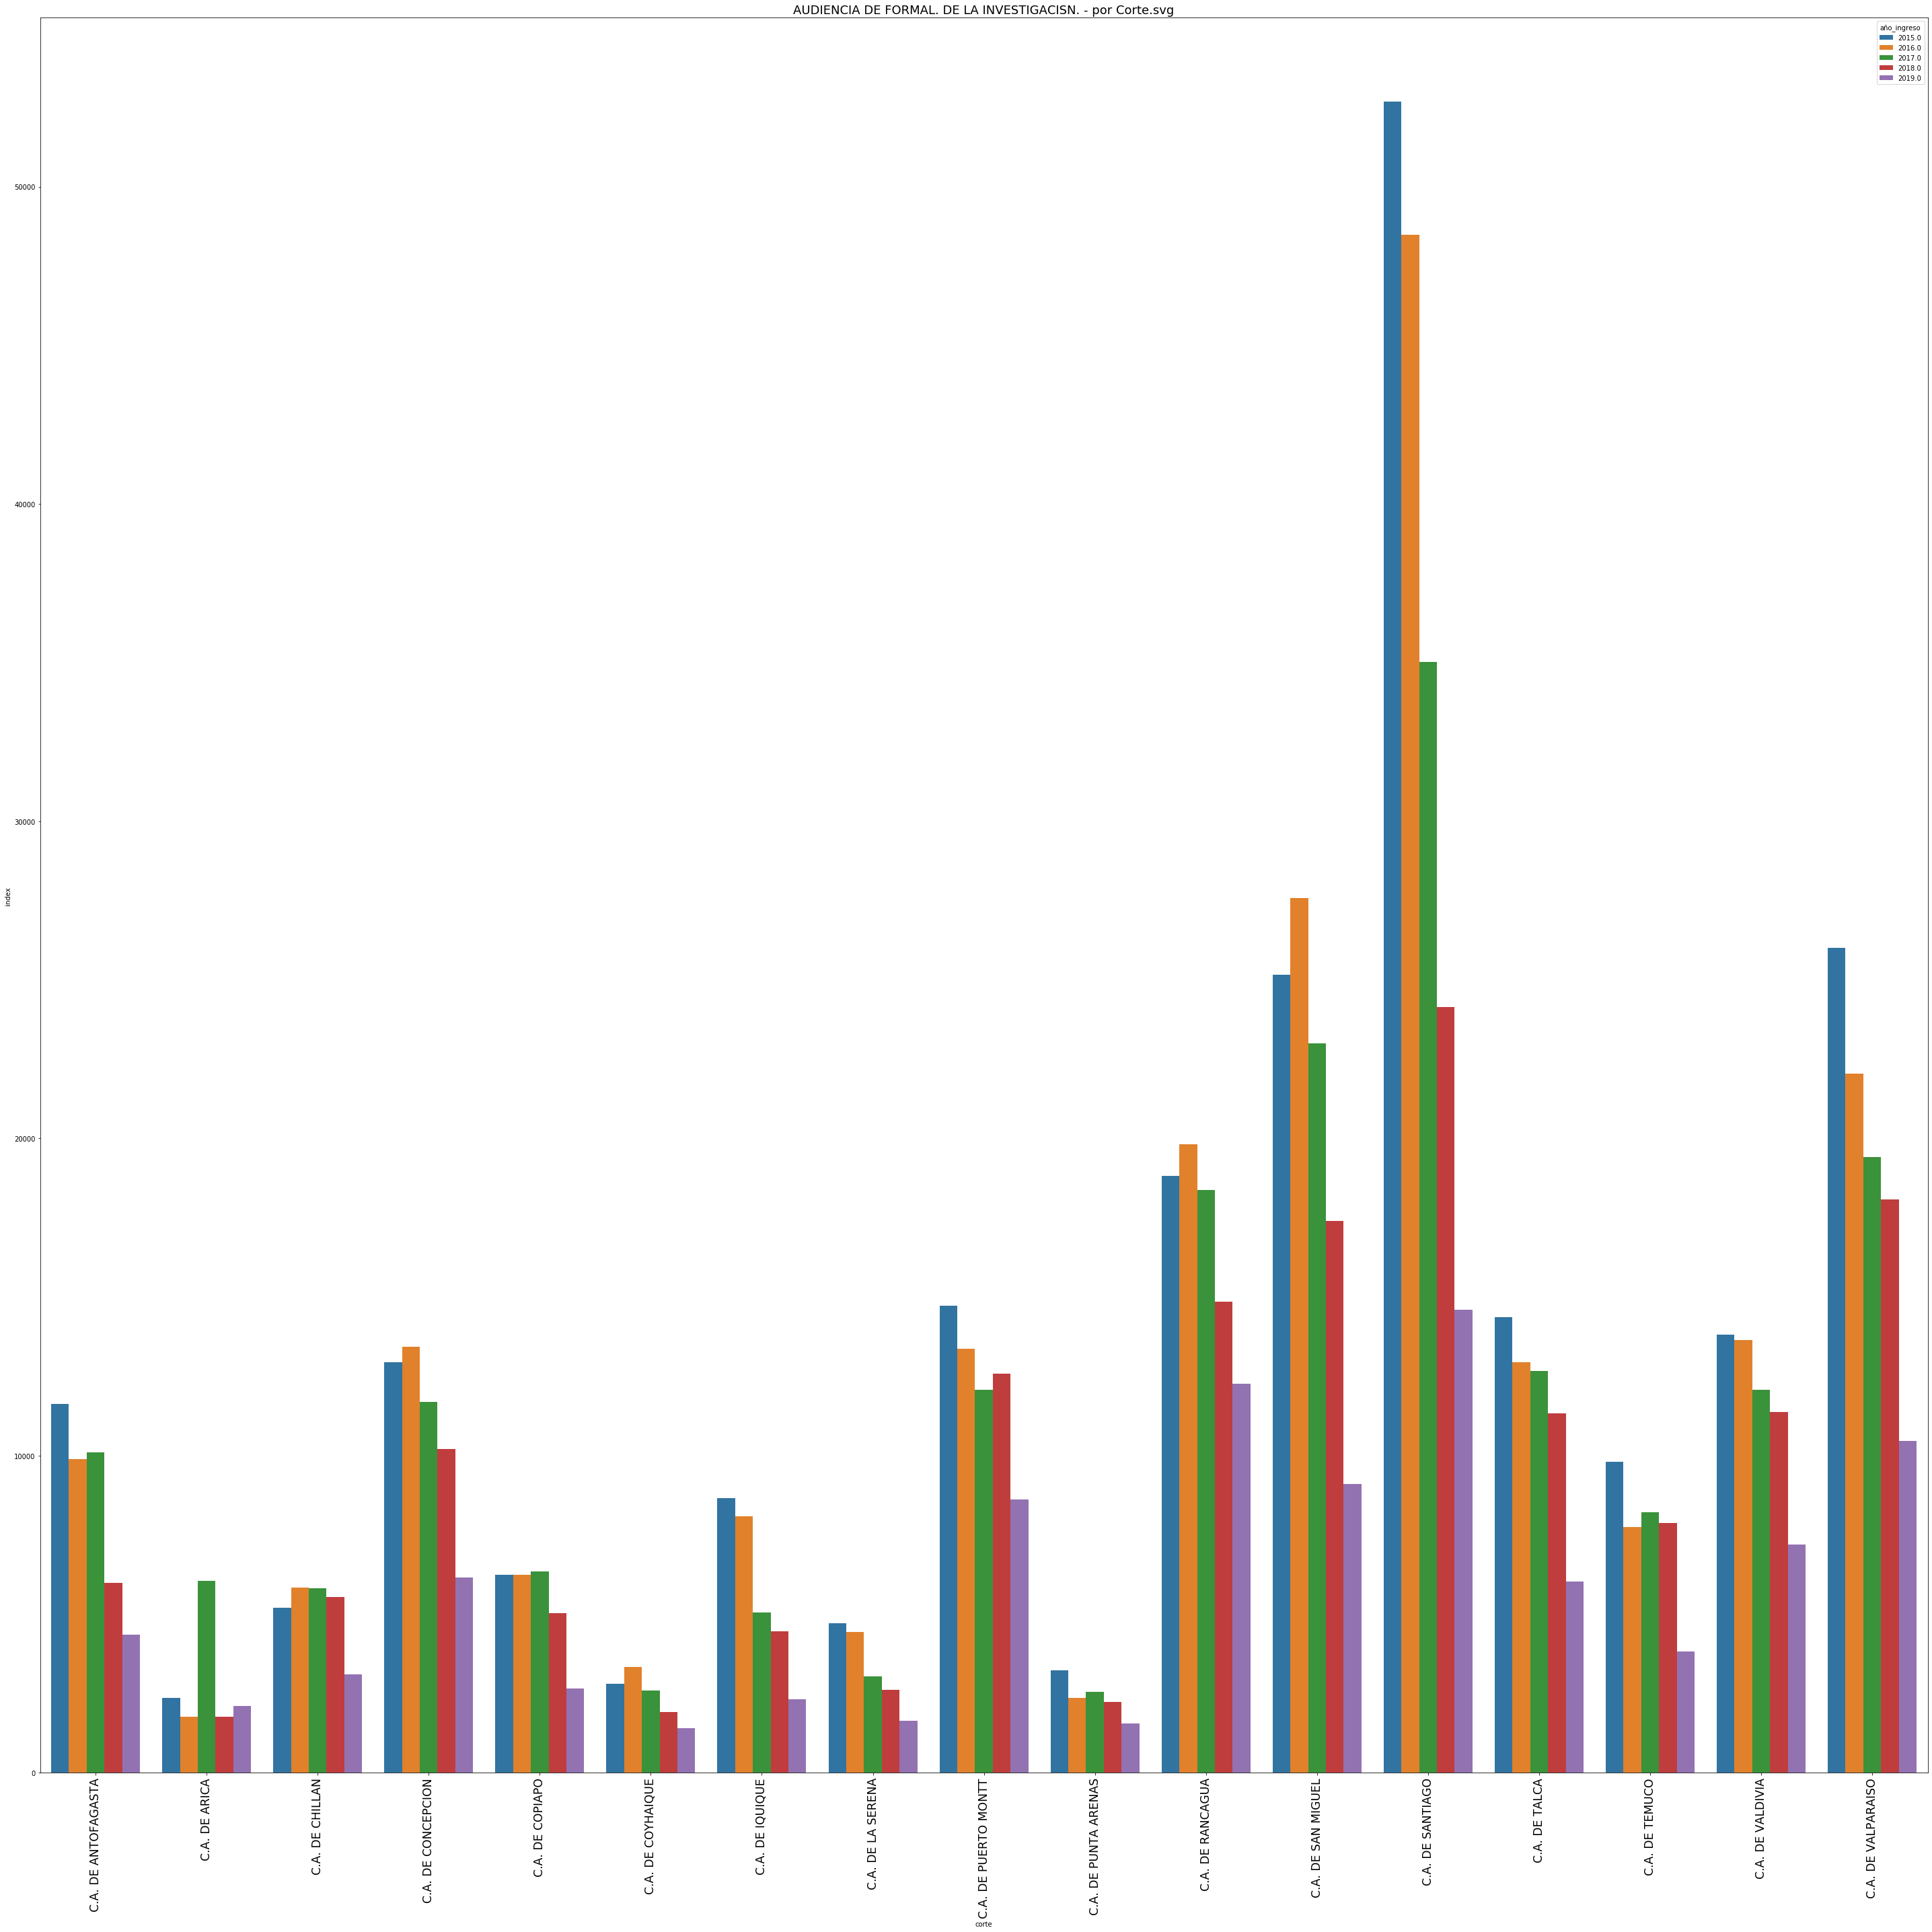

In [12]:
for tipo_audiencia, df_tipo_audiencia in inicio_proceso.groupby(by=['tipo_audiencia']):
    summary_inicio = df_tipo_audiencia.groupby(by=['corte','año_ingreso']).count().reset_index()
    plt.figure(figsize=(40,40))
    title = f'{tipo_audiencia} - por Corte.svg'
    plt.title(title, fontsize=18)

    ax = sns.barplot(x='corte', y='index',
                        hue="año_ingreso", data=summary_inicio)
    
    ax.xaxis.set_tick_params(labelsize='xx-large')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(f'../reports/figures/{title}.svg')

    plt.show()

In [13]:
roles = pd.unique(df_causas[['corte','tribunal_rit','año_ingreso']].values.ravel())
print(f"{len(roles)} causas en total")
roles

2980449 causas en total


array(['C.A. DE ARICA', '988-1-2018', 2018.0, ..., '1236-1804-2015',
       '1069-3161-2015', '1228-14033-2015'], dtype=object)

In [14]:
df_causas.columns

Index(['index', 'region', 'cod_corte', 'corte', 'tribunal_rit', 'cod_tribunal',
       'rit', 'tribunal', 'tipo_juzgado', 'dotacion_jueces', 'tipo_causa',
       'fecha_ingreso', 'año_ingreso', 'cod_materia', 'materia',
       'tipologia_materia', 'vigencia_materia', 'tipo_audiencia',
       'fecha_programacion_audiencia', 'fecha_audiencia', 'dias_agendamiento',
       'duracion_audiencia_minutos', 'total_audiencias',
       'total_ingresos_materia', 'total_terminos', 'fecha_termino',
       'año_termino', 'duracion_causa', 'motivo_termino', 'asiento', 'comunas',
       'poblacion', 'hombres', 'mujeres', 'urbano', 'rural'],
      dtype='object')

## Analisis de ingreso de Causas Orales ...

In [15]:
causas_orales = df_causas.query("tipo_juzgado == 'ORAL'")

In [16]:
totales_por_cortes = []

for (corte, año_ingreso), sub_df in causas_orales.groupby(by=['corte','año_ingreso']):
    unique_rol = sub_df['tribunal_rit'].unique()
    totales_por_cortes.append([corte, año_ingreso, len(unique_rol)])
    
   
df_totales_cortes = pd.DataFrame(totales_por_cortes, columns=['corte','año_ingreso','total_causas'])

df_totales_cortes

corte  año_ingreso  total_causas
0    C.A. DE ANTOFAGASTA       2015.0           700
1    C.A. DE ANTOFAGASTA       2016.0           714
2    C.A. DE ANTOFAGASTA       2017.0           767
3    C.A. DE ANTOFAGASTA       2018.0           773
4    C.A. DE ANTOFAGASTA       2019.0           713
5          C.A. DE ARICA       2015.0           369
6          C.A. DE ARICA       2016.0           419
7          C.A. DE ARICA       2017.0           499
8          C.A. DE ARICA       2018.0           475
9          C.A. DE ARICA       2019.0           504
10       C.A. DE CHILLAN       2015.0           258
11       C.A. DE CHILLAN       2016.0           288
12       C.A. DE CHILLAN       2017.0           341
13       C.A. DE CHILLAN       2018.0           273
14       C.A. DE CHILLAN       2019.0           259
15    C.A. DE CONCEPCION       2015.0          1266
16    C.A. DE CONCEPCION       2016.0          1194
17    C.A. DE CONCEPCION       2017.0           932
18    C.A. DE CONCEPCION       2018.0           642
19    C.A. DE CONCEPCION       2019.0           473
20       C.A. DE COPIAPO       2015.0           306
21       C.A. DE COPIAPO       2016.0           280
22       C.A. DE COPIAPO       2017.0           303
23       C.A. DE COPIAPO       2018.0           167
24       C.A. DE COPIAPO       2019.0           174
25     C.A. DE COYHAIQUE       2015.0           124
26     C.A. DE COYHAIQUE       2016.0           146
27     C.A. DE COYHAIQUE       2017.0           147
28     C.A. DE COYHAIQUE       2018.0           129
29     C.A. DE COYHAIQUE       2019.0            78
30       C.A. DE IQUIQUE       2015.0           749
31       C.A. DE IQUIQUE       2016.0           875
32       C.A. DE IQUIQUE       2017.0           814
33       C.A. DE IQUIQUE       2018.0           652
34       C.A. DE IQUIQUE       2019.0           954
35     C.A. DE LA SERENA       2015.0           713
36     C.A. DE LA SERENA       2016.0           612
37     C.A. DE LA SERENA       2017.0           570
38     C.A. DE LA SERENA       2018.0           494
39     C.A. DE LA SERENA       2019.0           314
40  C.A. DE PUERTO MONTT       2015.0           181
41  C.A. DE PUERTO MONTT       2016.0           255
42  C.A. DE PUERTO MONTT       2017.0           209
43  C.A. DE PUERTO MONTT       2018.0           203
44  C.A. DE PUERTO MONTT       2019.0           221
45  C.A. DE PUNTA ARENAS       2015.0           141
46  C.A. DE PUNTA ARENAS       2016.0           143
47  C.A. DE PUNTA ARENAS       2017.0           163
48  C.A. DE PUNTA ARENAS       2018.0           167
49  C.A. DE PUNTA ARENAS       2019.0           141
50      C.A. DE RANCAGUA       2015.0           884
51      C.A. DE RANCAGUA       2016.0           819
52      C.A. DE RANCAGUA       2017.0           858
53      C.A. DE RANCAGUA       2018.0           785
54      C.A. DE RANCAGUA       2019.0           956
55    C.A. DE SAN MIGUEL       2015.0          1529
56    C.A. DE SAN MIGUEL       2016.0          1766
57    C.A. DE SAN MIGUEL       2017.0          1942
58    C.A. DE SAN MIGUEL       2018.0          1866
59    C.A. DE SAN MIGUEL       2019.0          1692
60      C.A. DE SANTIAGO       2015.0          2859
61      C.A. DE SANTIAGO       2016.0          2960
62      C.A. DE SANTIAGO       2017.0          3158
63      C.A. DE SANTIAGO       2018.0          2805
64      C.A. DE SANTIAGO       2019.0          2680
65         C.A. DE TALCA       2015.0           813
66         C.A. DE TALCA       2016.0           885
67         C.A. DE TALCA       2017.0           756
68         C.A. DE TALCA       2018.0           788
69         C.A. DE TALCA       2019.0           732
70        C.A. DE TEMUCO       2015.0           523
71        C.A. DE TEMUCO       2016.0           550
72        C.A. DE TEMUCO       2017.0           438
73        C.A. DE TEMUCO       2018.0           320
74        C.A. DE TEMUCO       2019.0           301
75      C.A. DE VALDIVIA       2015.0           430
76      C.A. DE

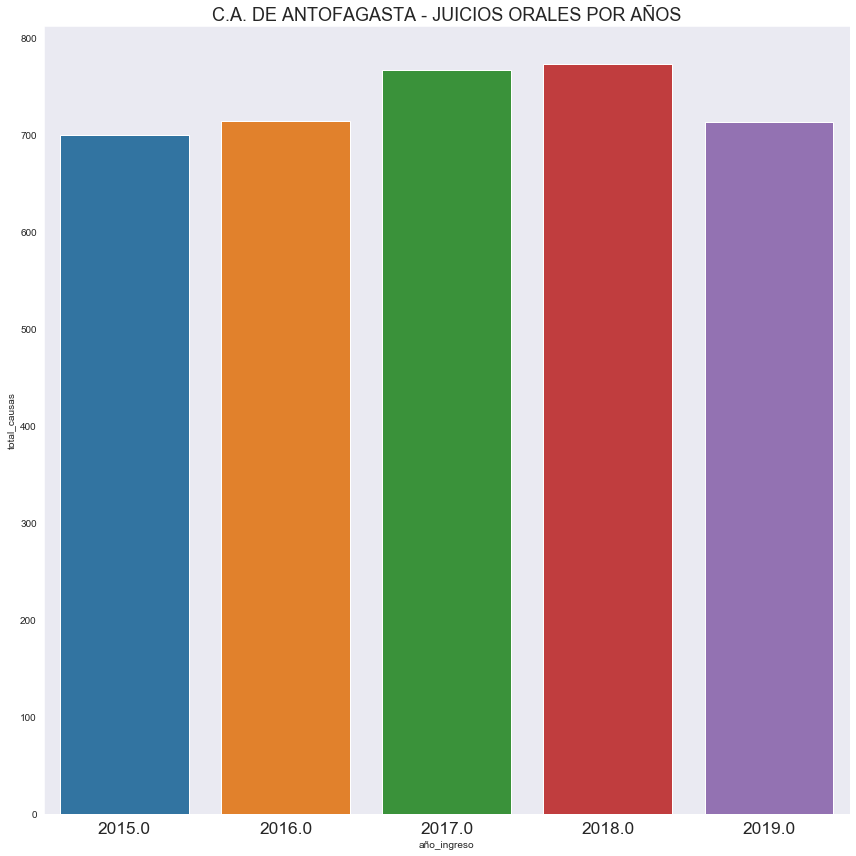

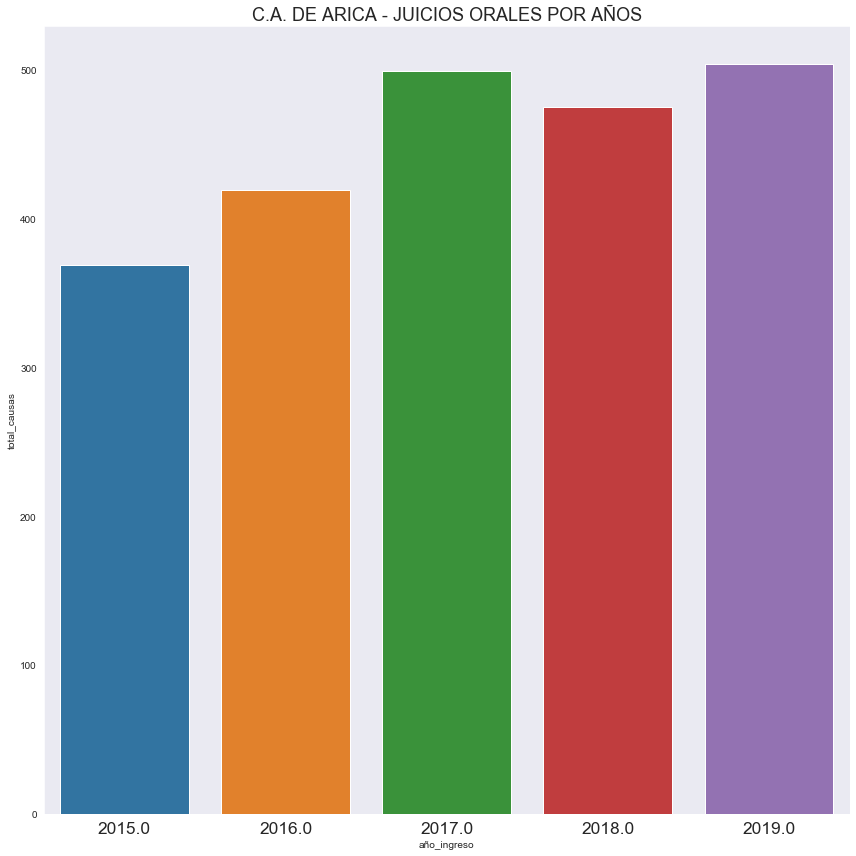

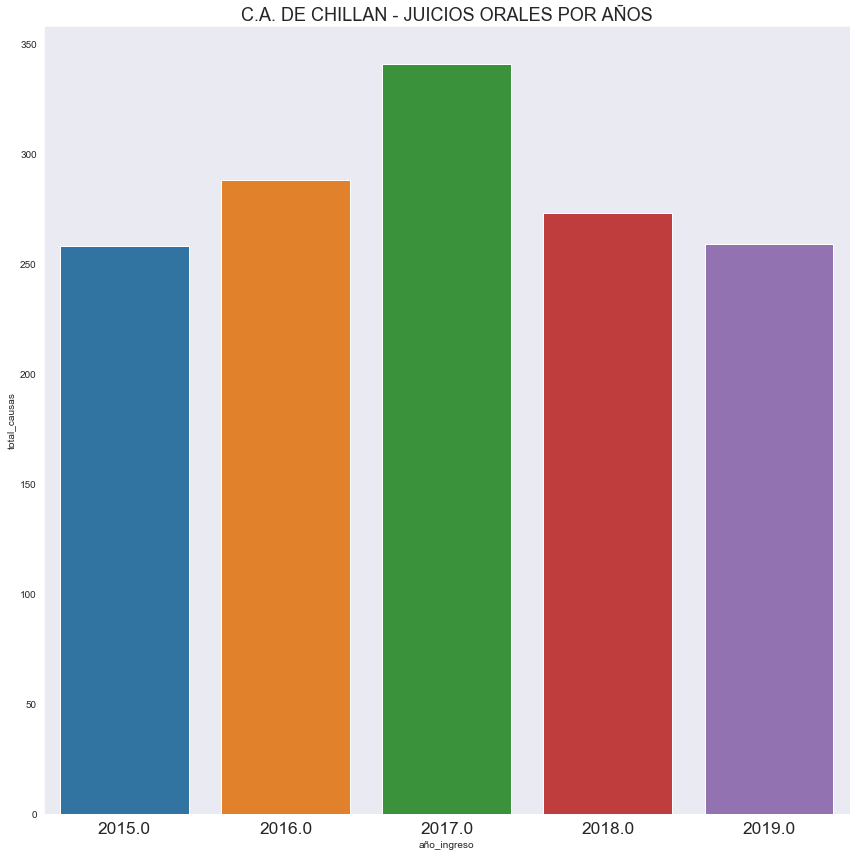

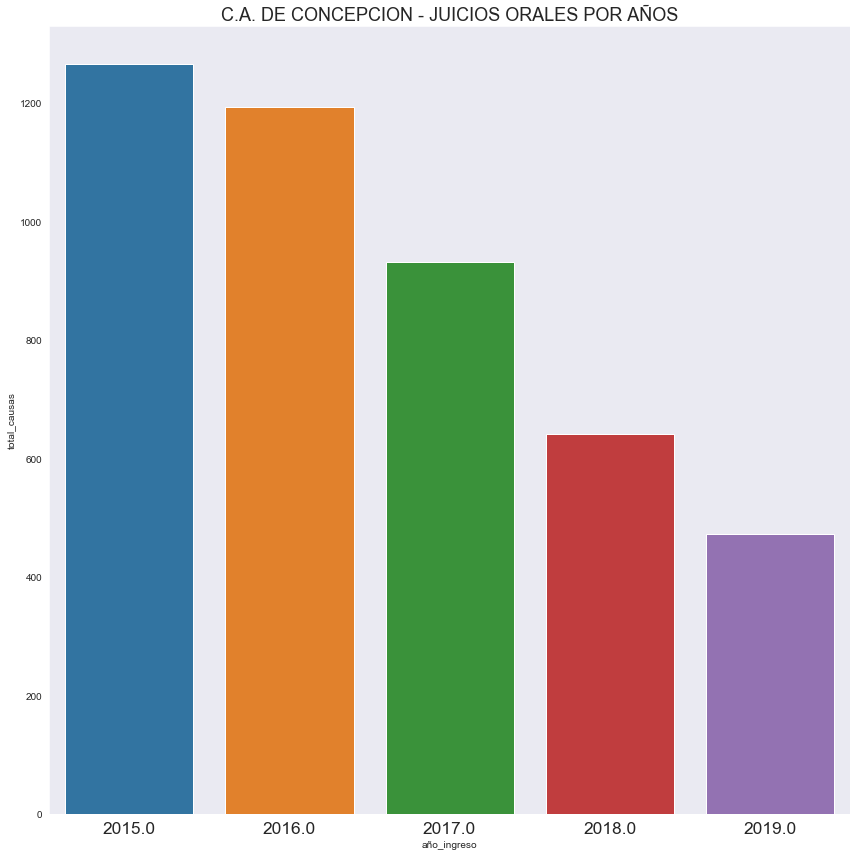

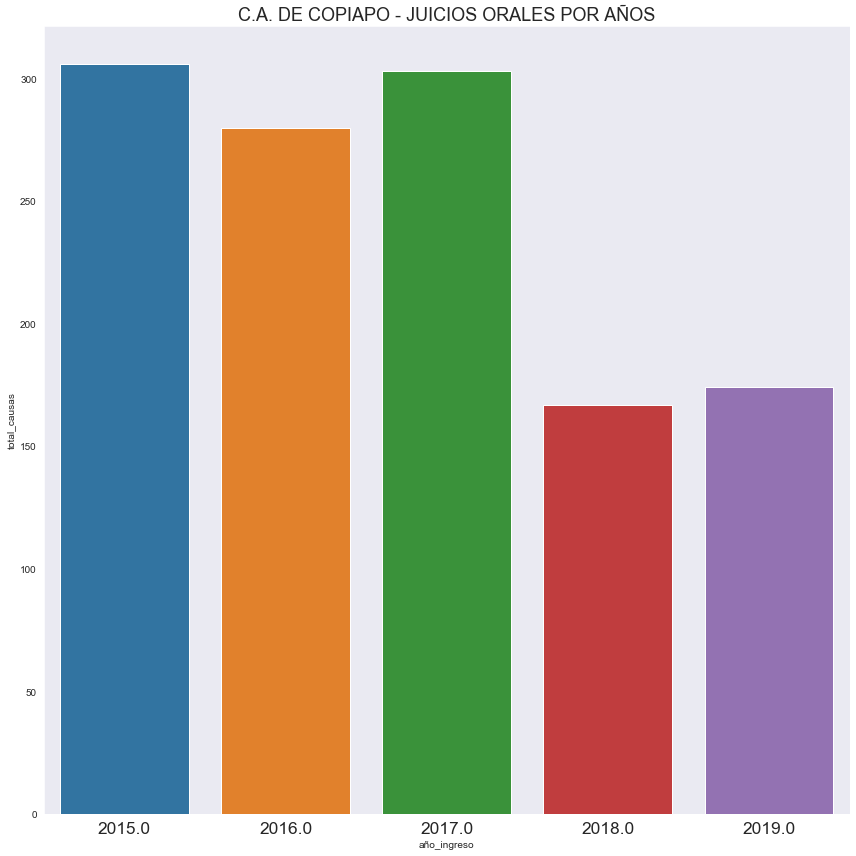

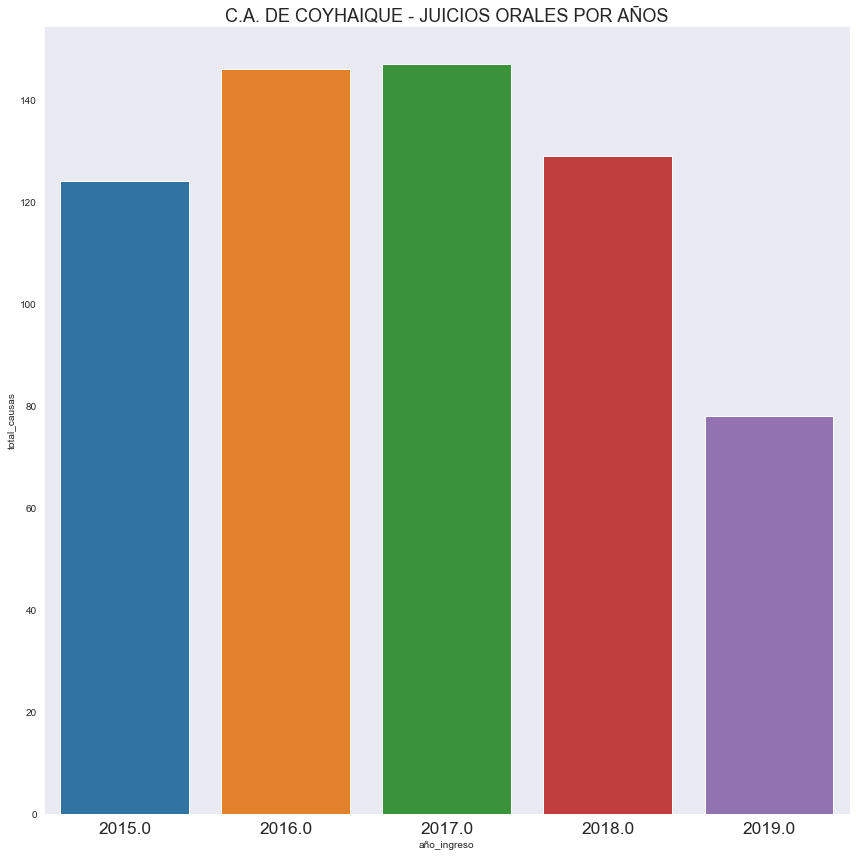

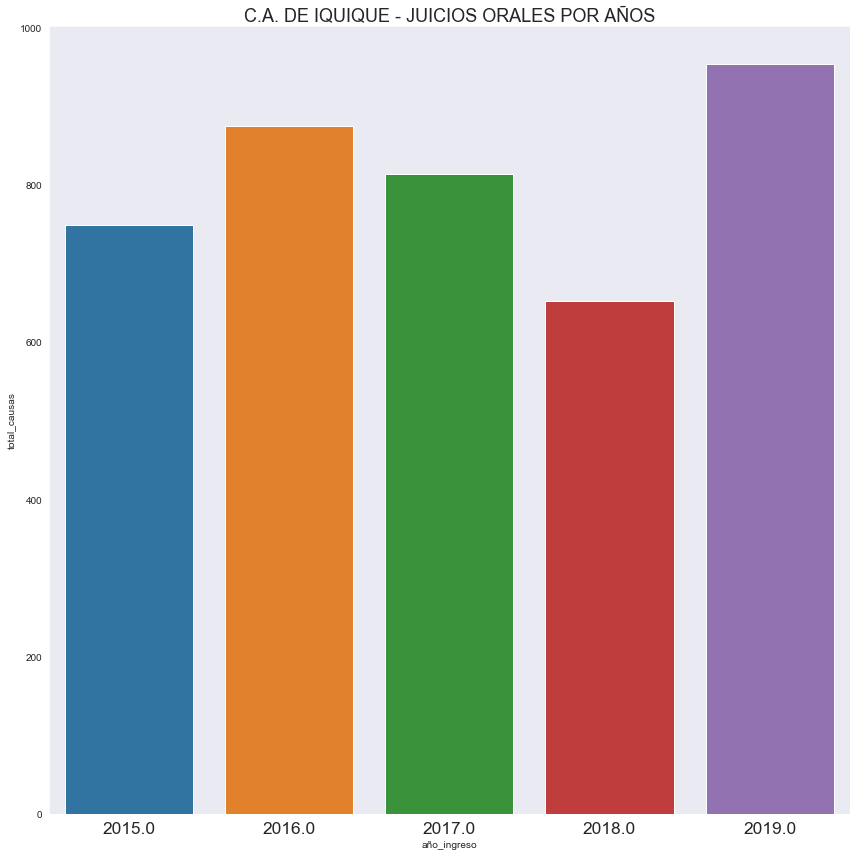

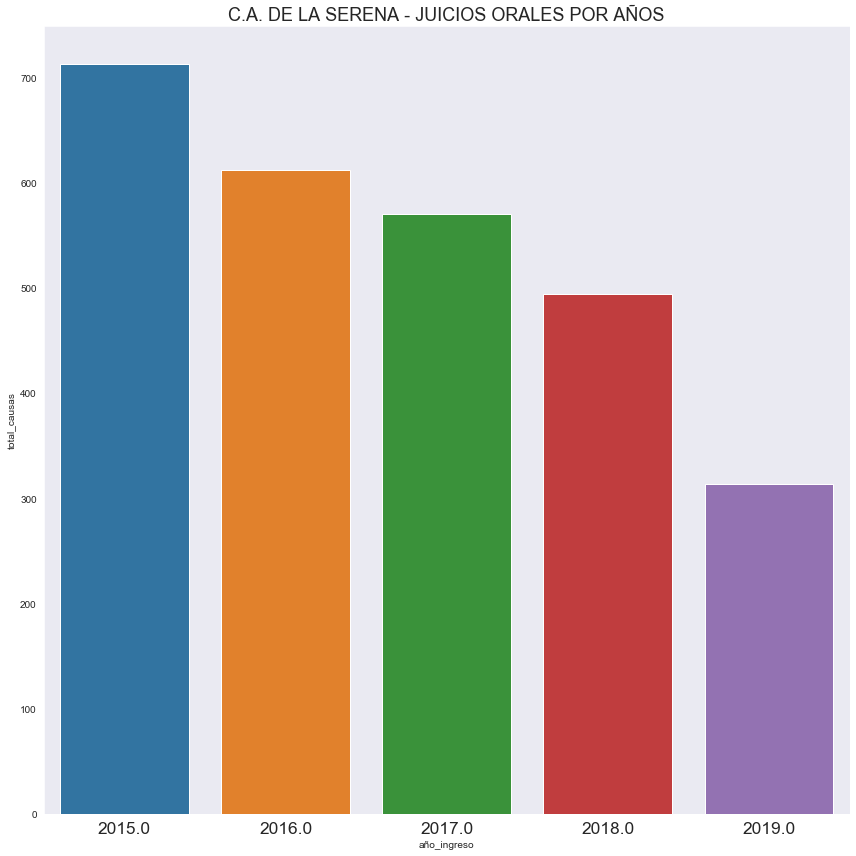

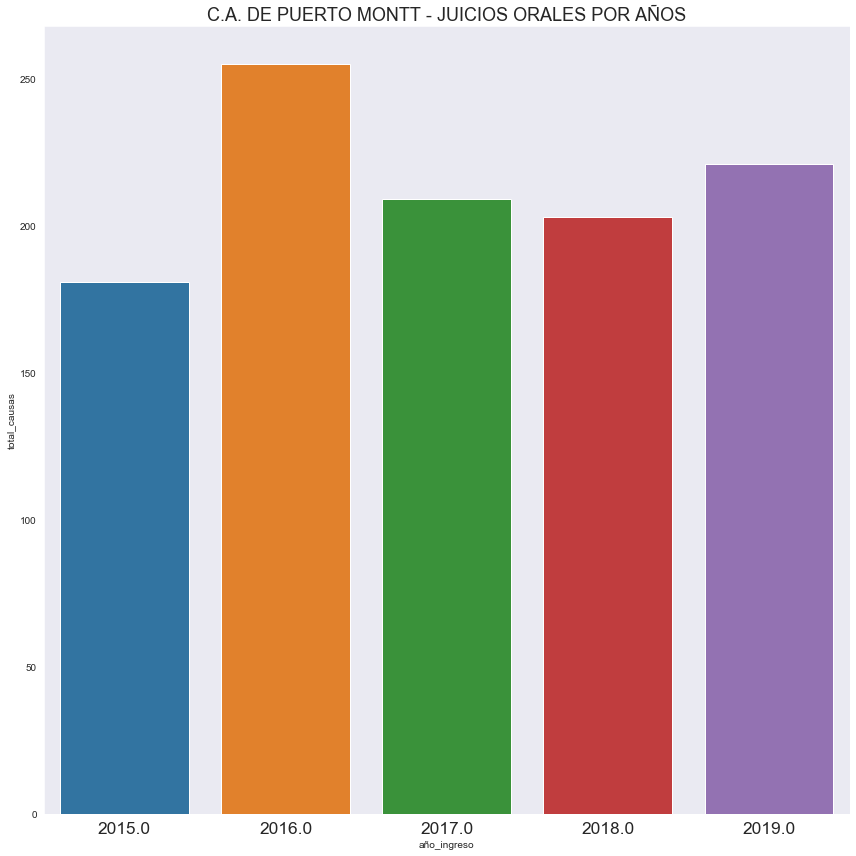

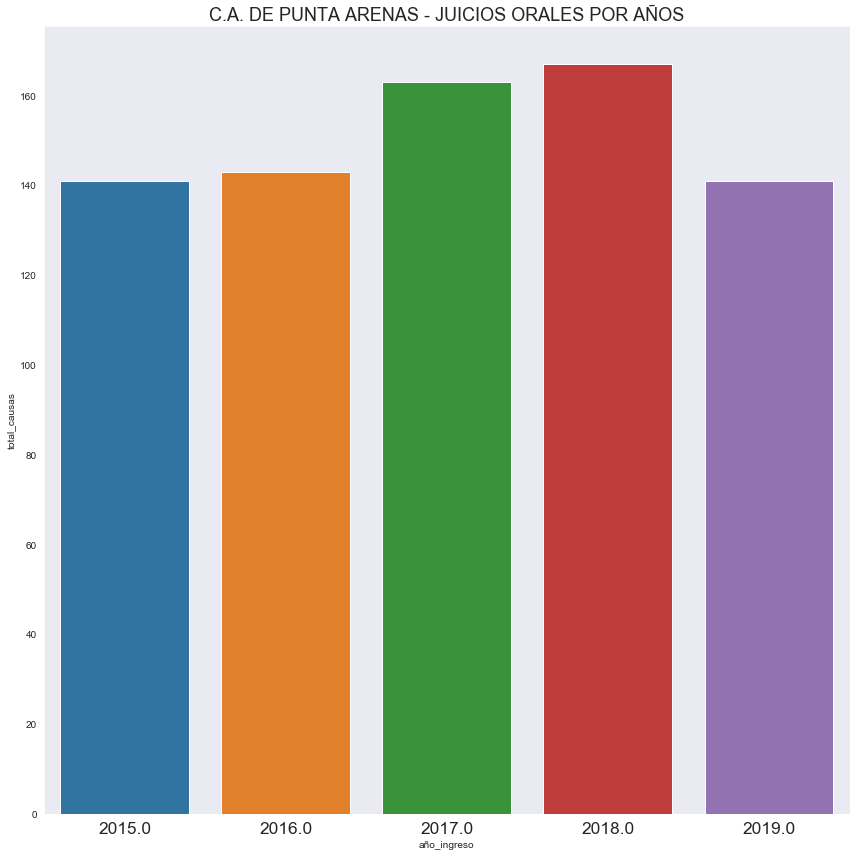

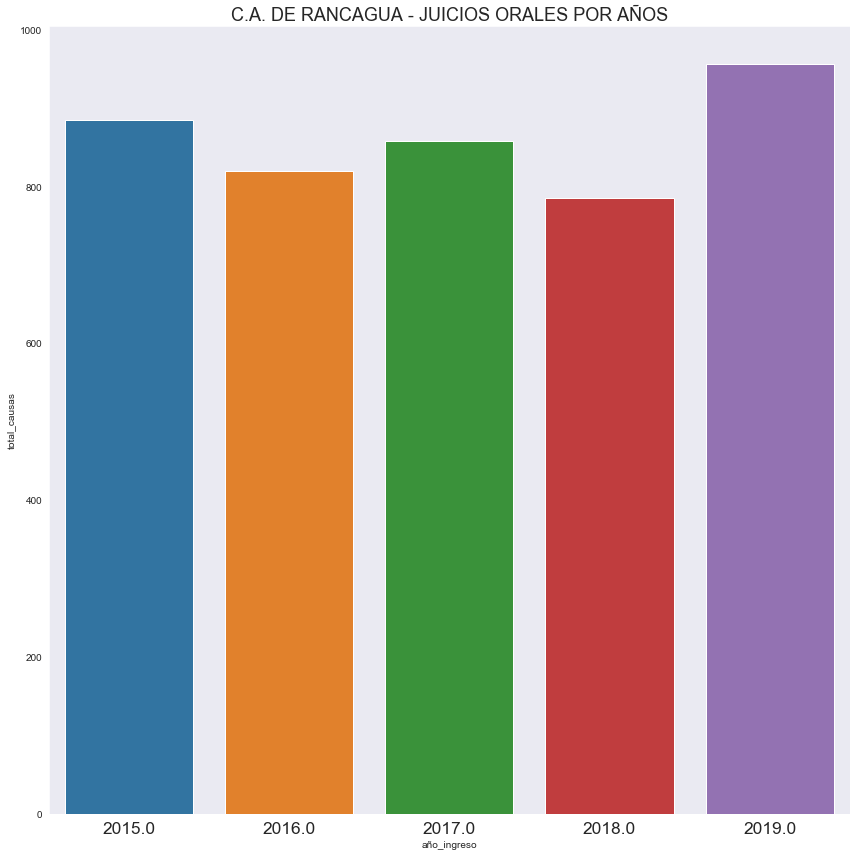

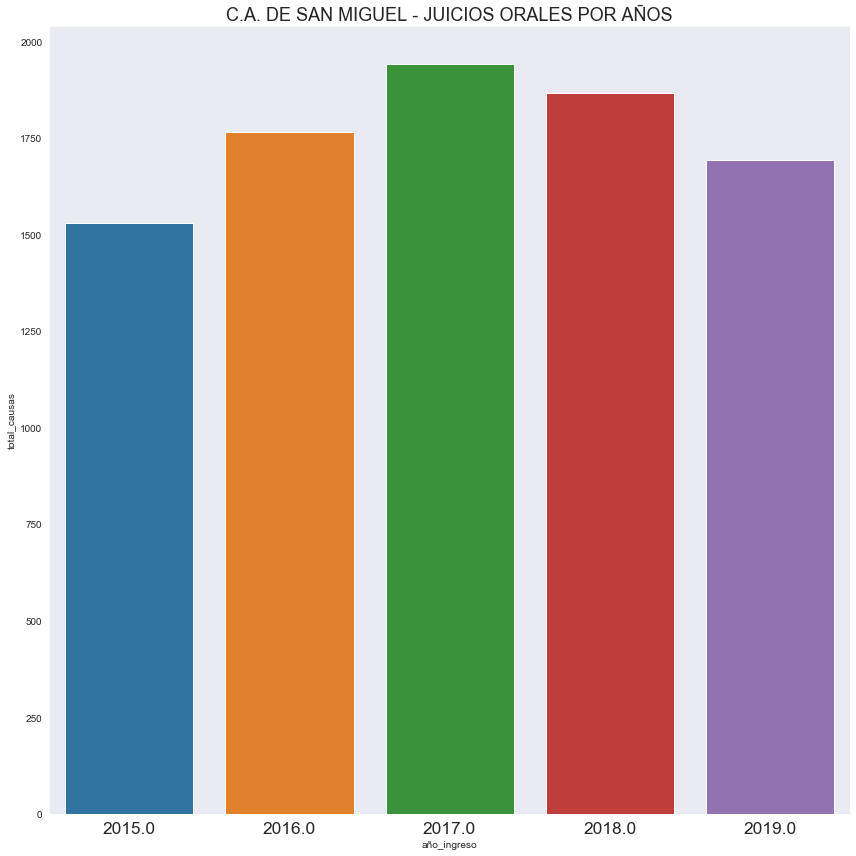

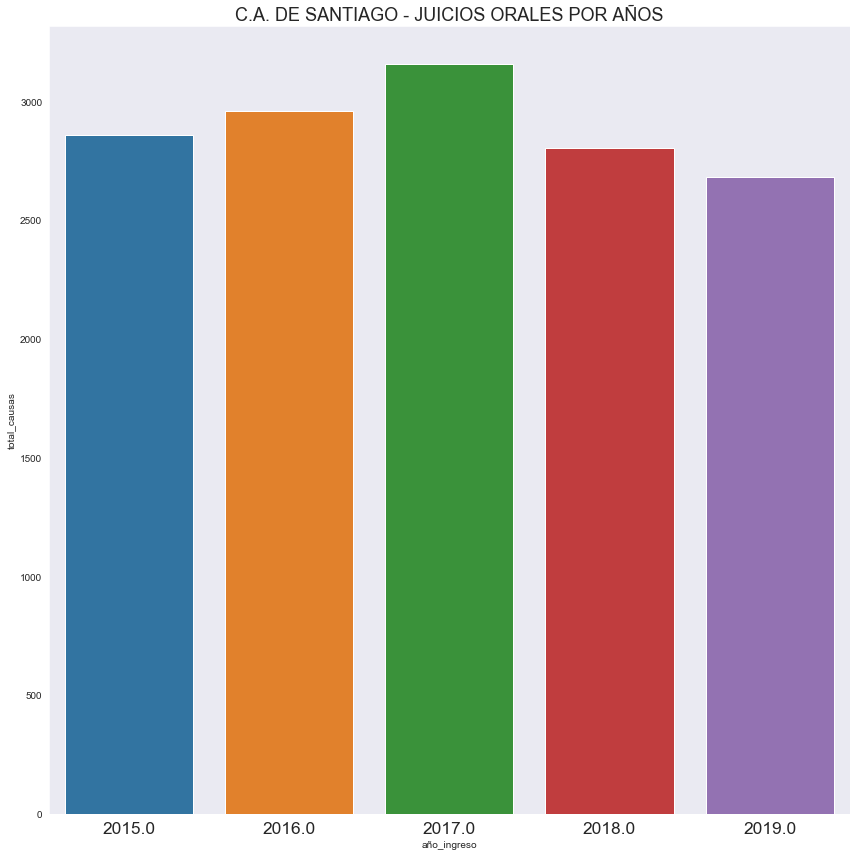

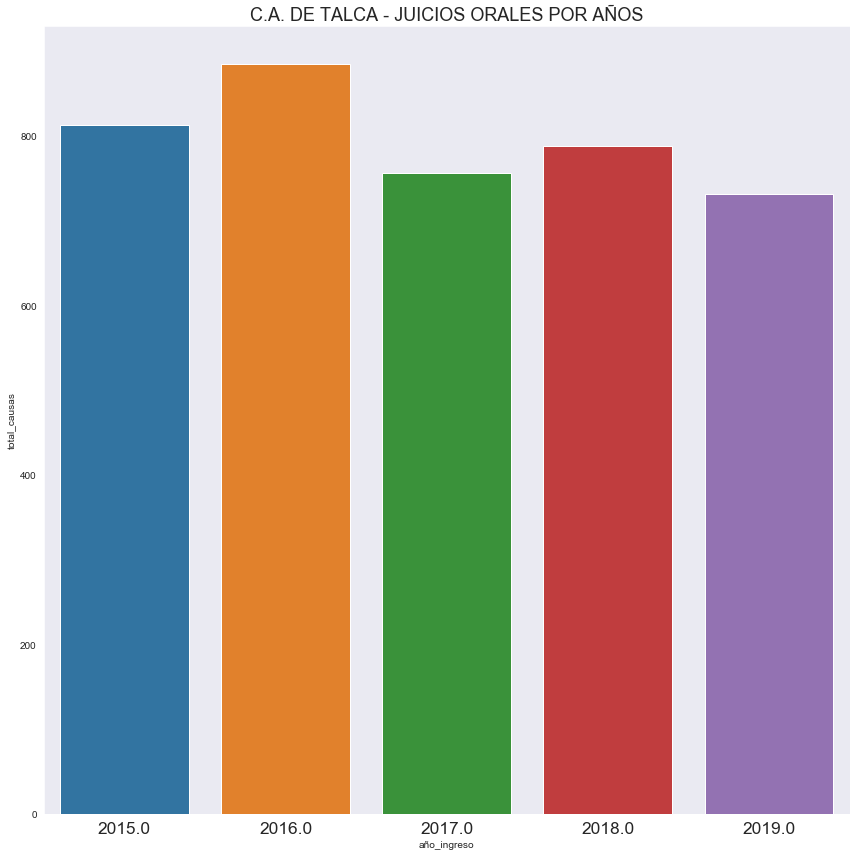

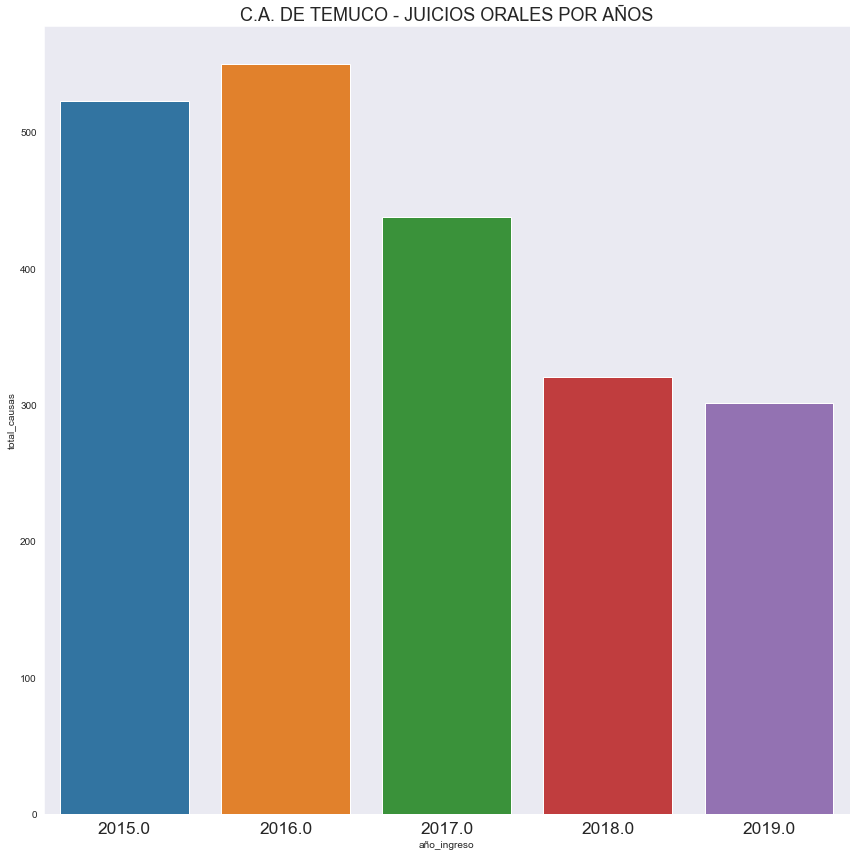

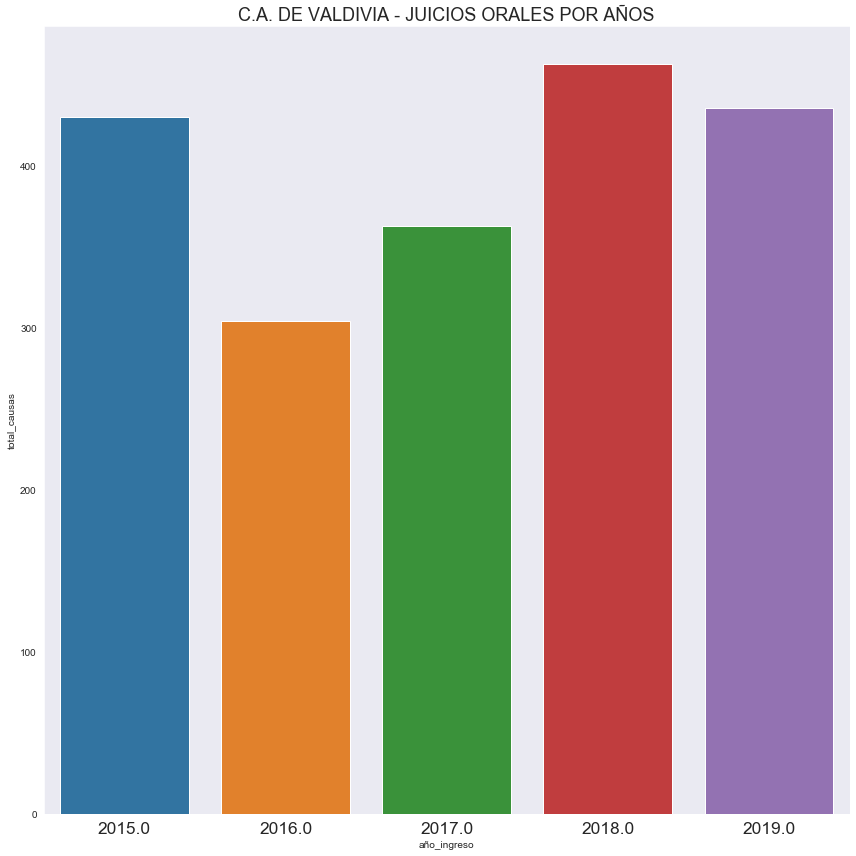

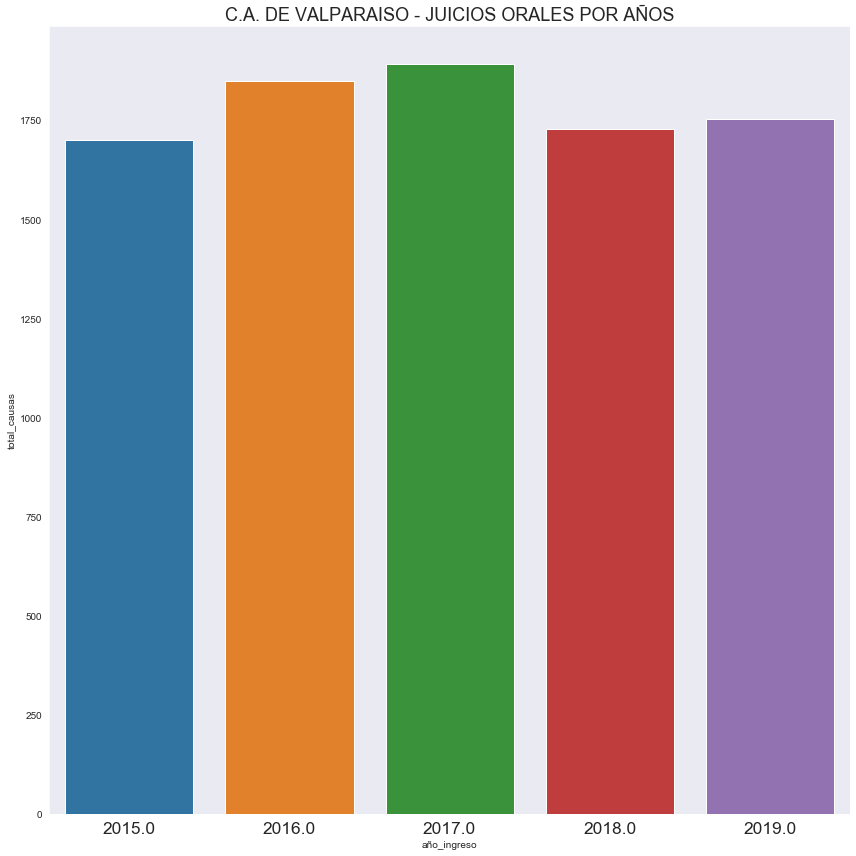

In [73]:
for corte in df_totales_cortes['corte'].unique():
    condicion = f"corte == '{corte}'"
    summary = df_totales_cortes.query(condicion)

    plt.figure(figsize=(12,12))
    title = f'{corte} - JUICIOS ORALES POR AÑOS'
    plt.title(title, fontsize=18)

    ax = sns.barplot(x='año_ingreso', y='total_causas', data=summary)
    
    ax.xaxis.set_tick_params(labelsize='xx-large')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig(f'../reports/figures/{title}.svg')

    plt.show()

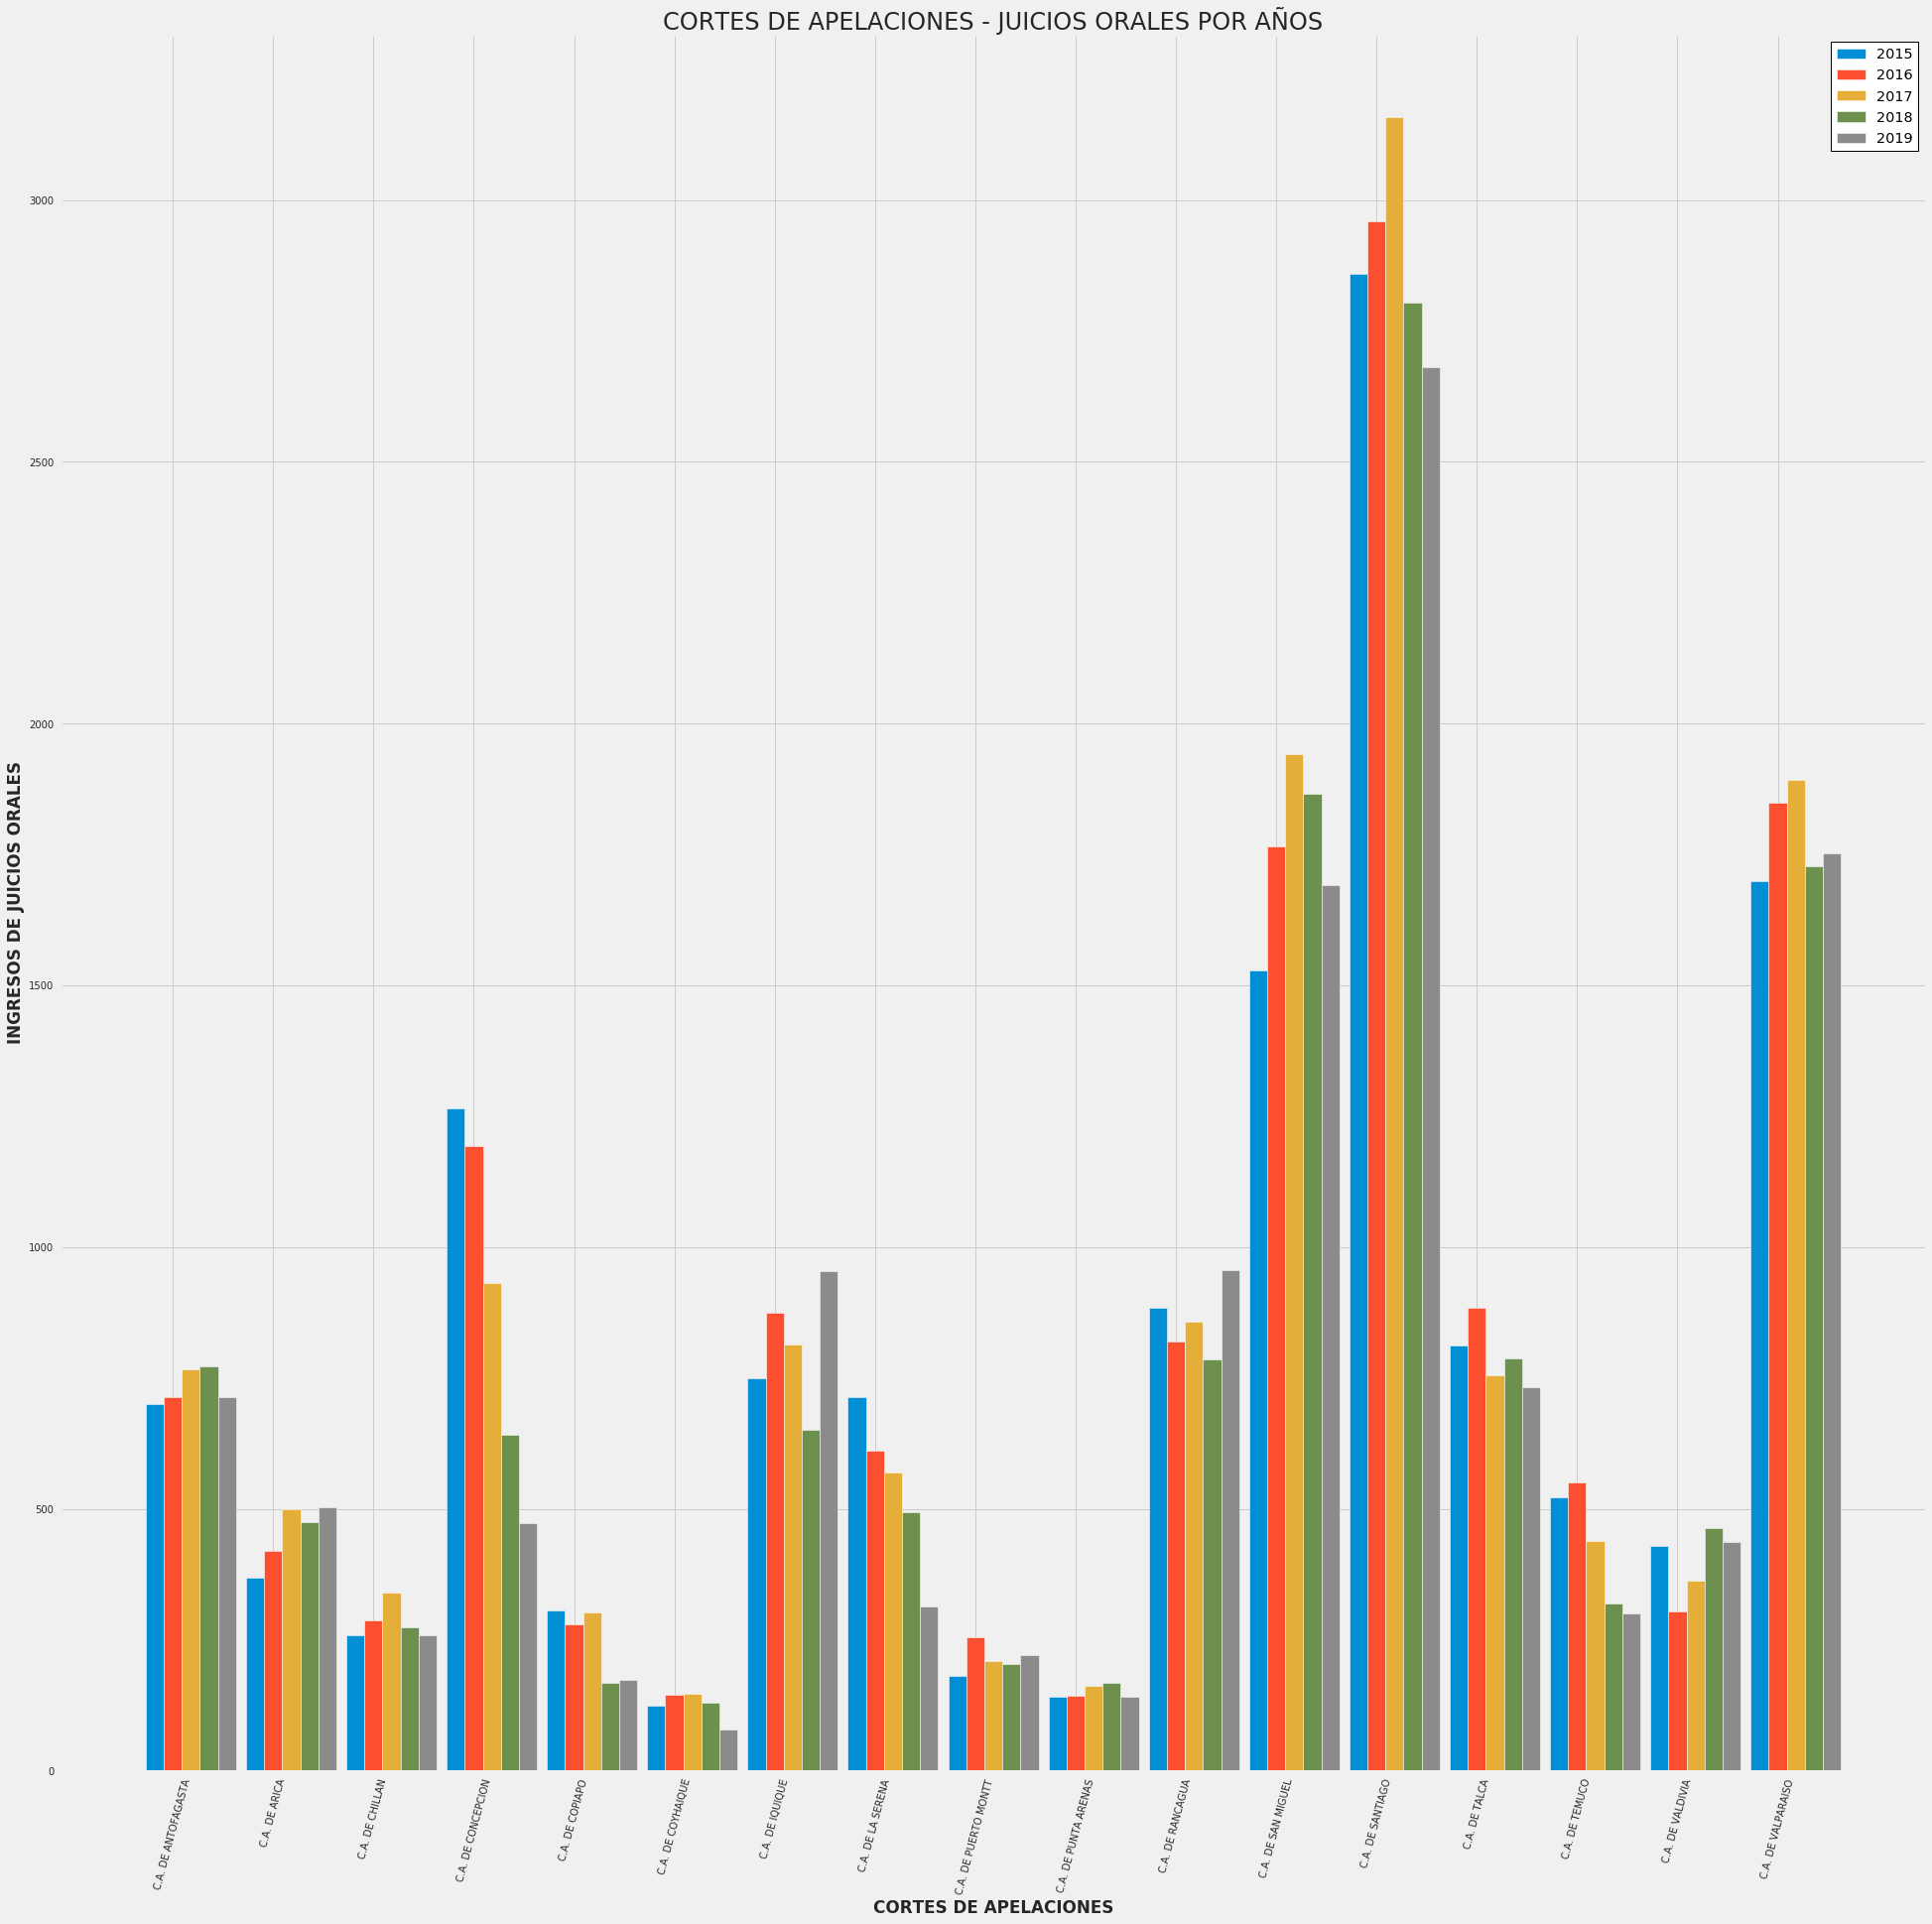

In [163]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.18
# set height of bar

años = range(2015,2020)
resumen = []

for año in años:
    criterio = f"año_ingreso == {año}"
    totales = df_totales_cortes.query(criterio).total_causas.to_list()
    resumen.append([año,totales])
    
# Set position of bar on X axis
r1 = np.arange(len(resumen[0][1]))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]


# Make the plot

plt.figure(figsize=(30,30))

plt.bar(r1, resumen[0][1], width=barWidth, edgecolor='white', label='2015')
plt.bar(r2, resumen[1][1], width=barWidth, edgecolor='white', label='2016')
plt.bar(r3, resumen[2][1], width=barWidth, edgecolor='white', label='2017')
plt.bar(r4, resumen[3][1], width=barWidth, edgecolor='white', label='2018')
plt.bar(r5, resumen[4][1], width=barWidth, edgecolor='white', label='2019')
 
# Add xticks on the middle of the group bars
plt.style.use('classic')
title = f'CORTES DE APELACIONES - JUICIOS ORALES POR AÑOS'
plt.title(title, fontsize=24)
plt.xlabel('CORTES DE APELACIONES', fontweight='bold')
plt.ylabel('INGRESOS DE JUICIOS ORALES', fontweight='bold')

plt.xticks([r + barWidth for r in range(len(resumen[0][1]))], df_totales_cortes.corte.unique(), rotation=75)


# Create legend & Show graphic
plt.legend()
plt.show()

    

In [17]:
totales_por_tribunales = []

for (tribunal, año_ingreso), sub_df in causas_orales.groupby(by=['tribunal','año_ingreso']):
    unique_rol = sub_df['tribunal_rit'].unique()
    totales_por_tribunales.append([tribunal, año_ingreso, len(unique_rol)])
    
   
df_totales_tribunales = pd.DataFrame(totales_por_tribunales, columns=['tribunal','año_ingreso','total_causas'])

df_totales_tribunales

tribunal  año_ingreso  \
0    CUARTO TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...       2015.0   
1    CUARTO TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...       2016.0   
2    CUARTO TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...       2017.0   
3    CUARTO TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...       2018.0   
4    CUARTO TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...       2019.0   
5    PRIMER TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...       2015.0   
6    PRIMER TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...       2016.0   
7    PRIMER TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...       2017.0   
8    PRIMER TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...       2018.0   
9    PRIMER TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...       2019.0   
10   QUINTO TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...       2015.0   
11   QUINTO TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...       2016.0   
12   QUINTO TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...       2017.0   
13   QUINTO TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...       2018.0   
14   QUINTO TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...       2019.0   
15   SEGUNDO TRIBUNAL DE JUICIO ORAL EN LO PENAL SA...       2015.0   
16   SEGUNDO TRIBUNAL DE JUICIO ORAL EN LO PENAL SA...       2016.0   
17   SEGUNDO TRIBUNAL DE JUICIO ORAL EN LO PENAL SA...       2017.0   
18   SEGUNDO TRIBUNAL DE JUICIO ORAL EN LO PENAL SA...       2018.0   
19   SEGUNDO TRIBUNAL DE JUICIO ORAL EN LO PENAL SA...       2019.0   
20   SEPTIMO TRIBUNAL DE JUICIO ORAL EN LO PENAL SA...       2015.0   
21   SEPTIMO TRIBUNAL DE JUICIO ORAL EN LO PENAL SA...       2016.0   
22   SEPTIMO TRIBUNAL DE JUICIO ORAL EN LO PENAL SA...       2017.0   
23   SEPTIMO TRIBUNAL DE JUICIO ORAL EN LO PENAL SA...       2018.0   
24   SEPTIMO TRIBUNAL DE JUICIO ORAL EN LO PENAL SA...       2019.0   
25   SEXTO TRIBUNAL DE JUICIO ORAL EN LO PENAL SANT...       2015.0   
26   SEXTO TRIBUNAL DE JUICIO ORAL EN LO PENAL SANT...       2016.0   
27   SEXTO TRIBUNAL DE JUICIO ORAL EN LO PENAL SANT...       2017.0   
28   SEXTO TRIBUNAL DE JUICIO ORAL EN LO PENAL SANT...       2018.0   
29   SEXTO TRIBUNAL DE JUICIO ORAL EN LO PENAL SANT...       2019.0   
30   TERCER TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...       2015.0   
31   TERCER TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...       2016.0   
32   TERCER TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...       2017.0   
33   TERCER TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...       2018.0   
34   TERCER TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...       2019.0   
35           TRIBUNAL DE JUICIO ORAL EN LO PENAL ANGOL       2015.0   
36           TRIBUNAL DE JUICIO ORAL EN LO PENAL ANGOL       2016.0   
37           TRIBUNAL DE JUICIO ORAL EN LO PENAL ANGOL       2017.0   
38           TRIBUNAL DE JUICIO ORAL EN LO PENAL ANGOL       2018.0   
39           TRIBUNAL DE JUICIO ORAL EN LO PENAL ANGOL       2019.0   
40     TRIBUNAL DE JUICIO ORAL EN LO PENAL ANTOFAGASTA       2015.0   
41     TRIBUNAL DE JUICIO ORAL EN LO PENAL ANTOFAGASTA       2016.0   
42     TRIBUNAL DE JUICIO ORAL EN LO PENAL ANTOFAGASTA       2017.0   
43     TRIBUNAL DE JUICIO ORAL EN LO PENAL ANTOFAGASTA       2018.0   
44     TRIBUNAL DE JUICIO ORAL EN LO PENAL ANTOFAGASTA       2019.0   
45           TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA       2015.0   
46           TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA       2016.0   
47           TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA       2017.0   
48           TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA       2018.0   
49           TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA       2019.0   
50          TRIBUNAL DE JUICIO ORAL EN LO PENAL CALAMA       2015.0   
51          TRIBUNAL DE JUICIO ORAL EN LO PENAL CALAMA       2016.0   
52          TRIBUNAL DE JUICIO ORAL EN LO PENAL CALAMA       2017.0   
53          TRIBUNAL DE JUICIO ORAL EN LO PENAL CALAMA       2018.0   
54          TRIBUNAL DE JUICIO ORAL EN LO PENAL CALAMA       2019.0   
55          TRIBUNAL DE JUICIO ORAL EN LO PENAL CASTRO       2015.0   

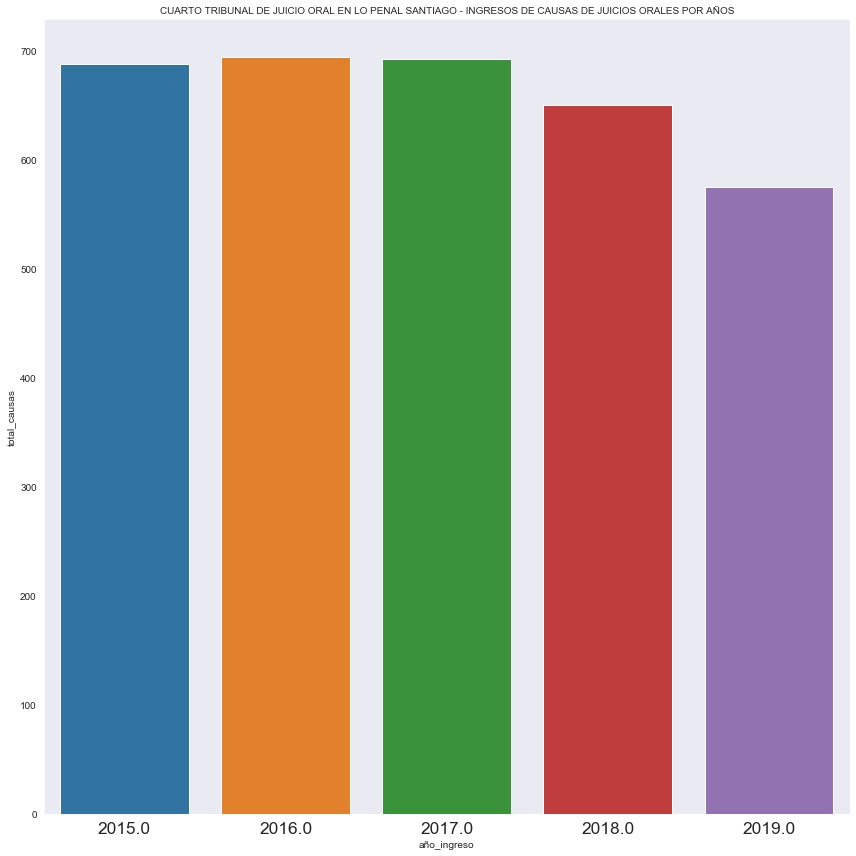

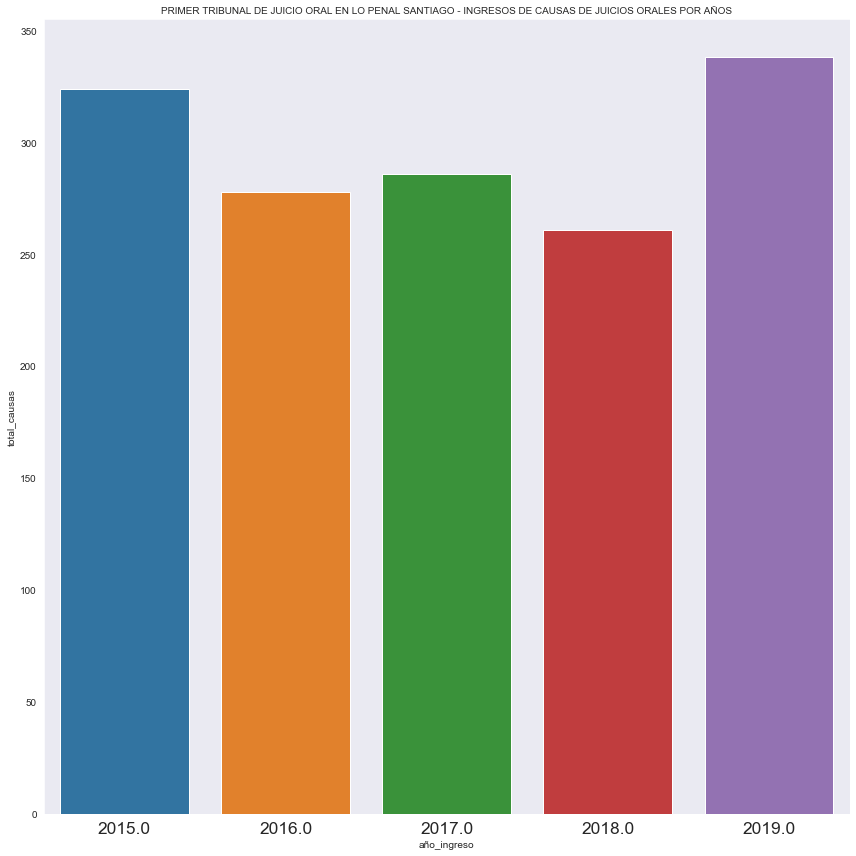

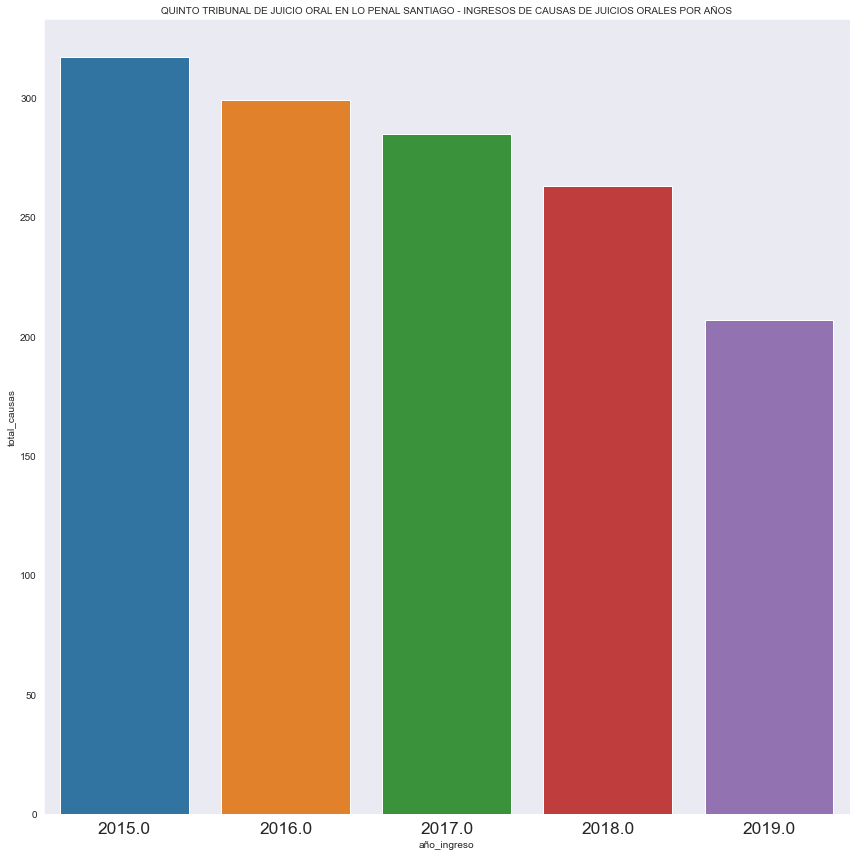

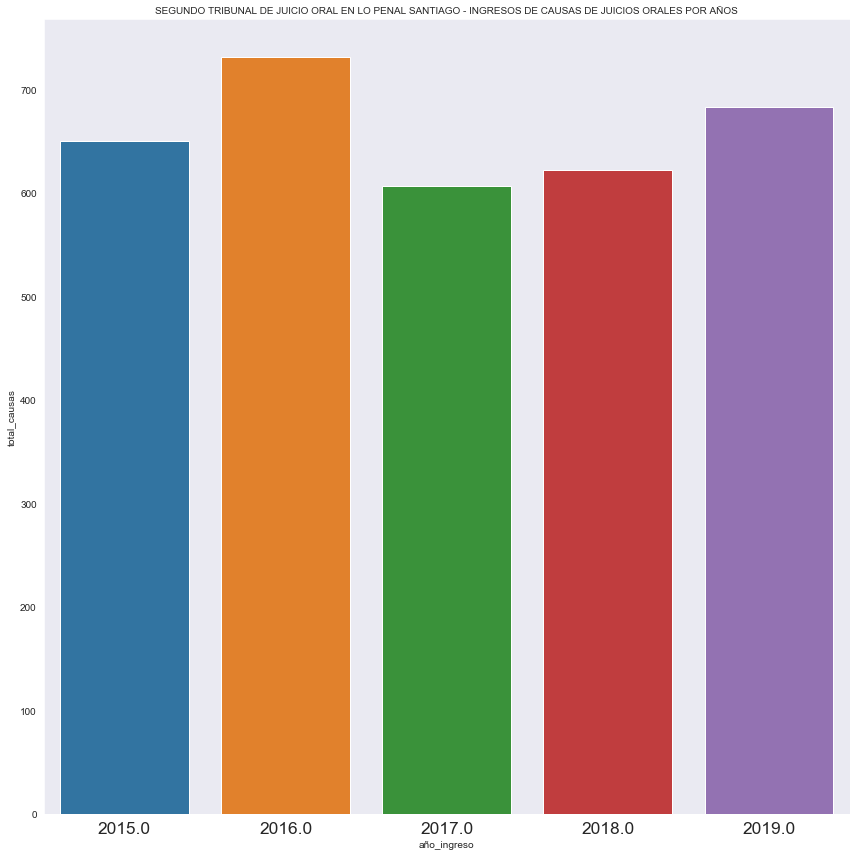

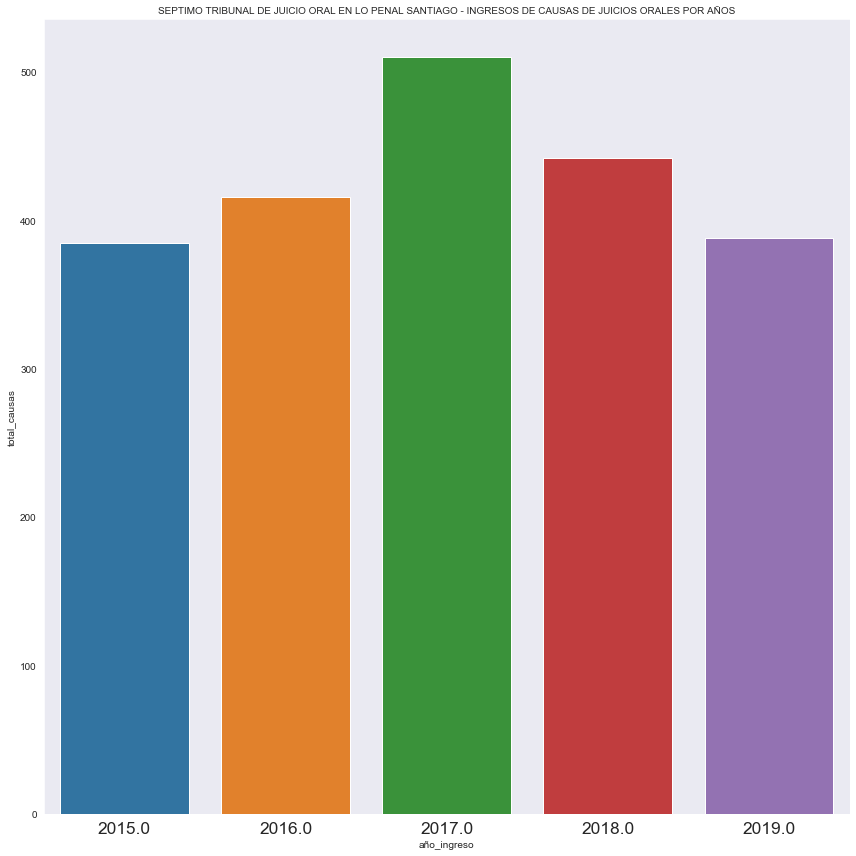

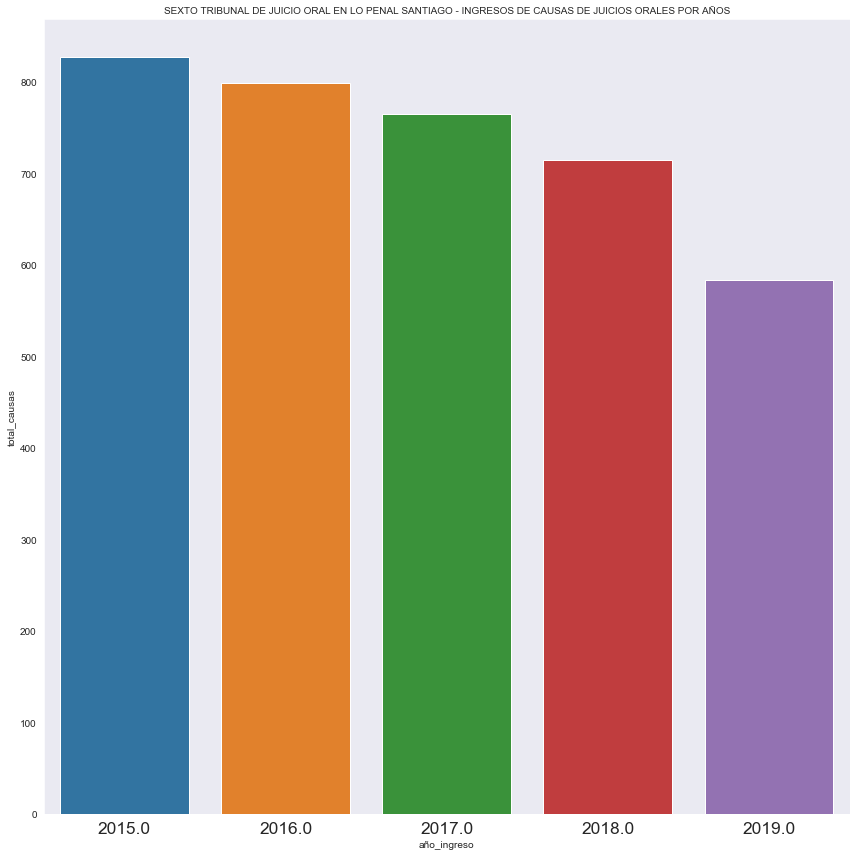

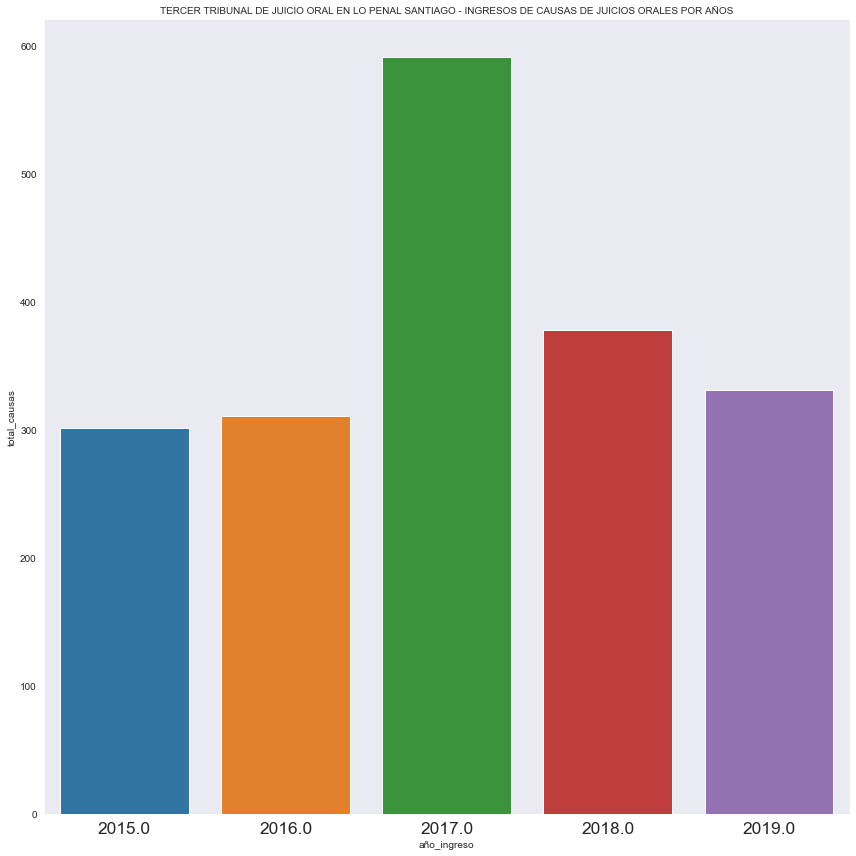

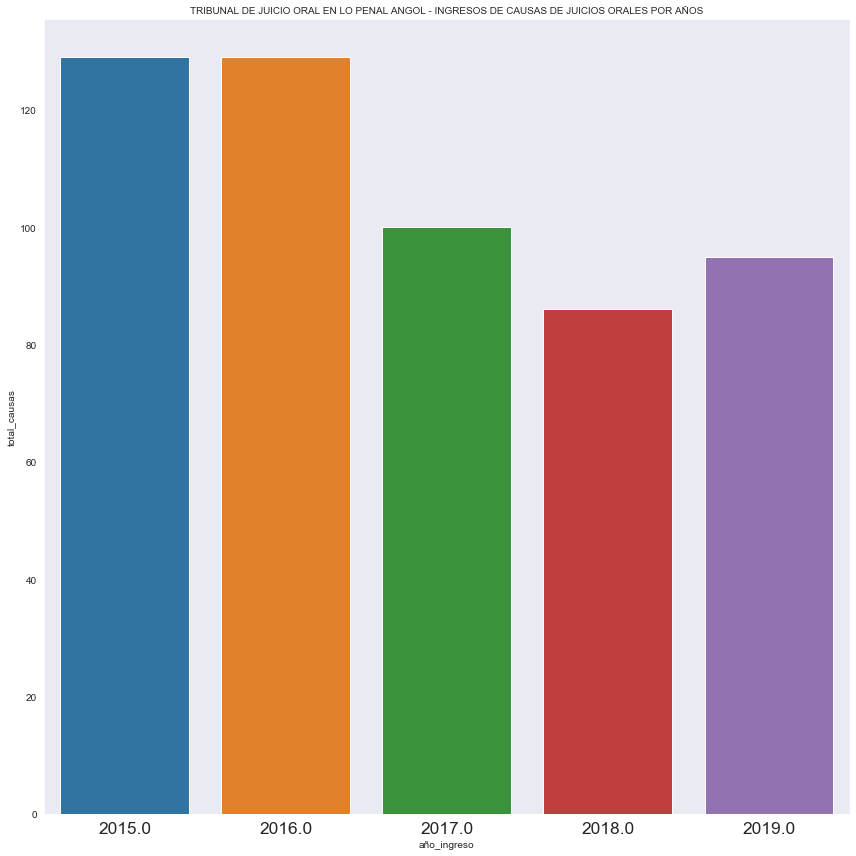

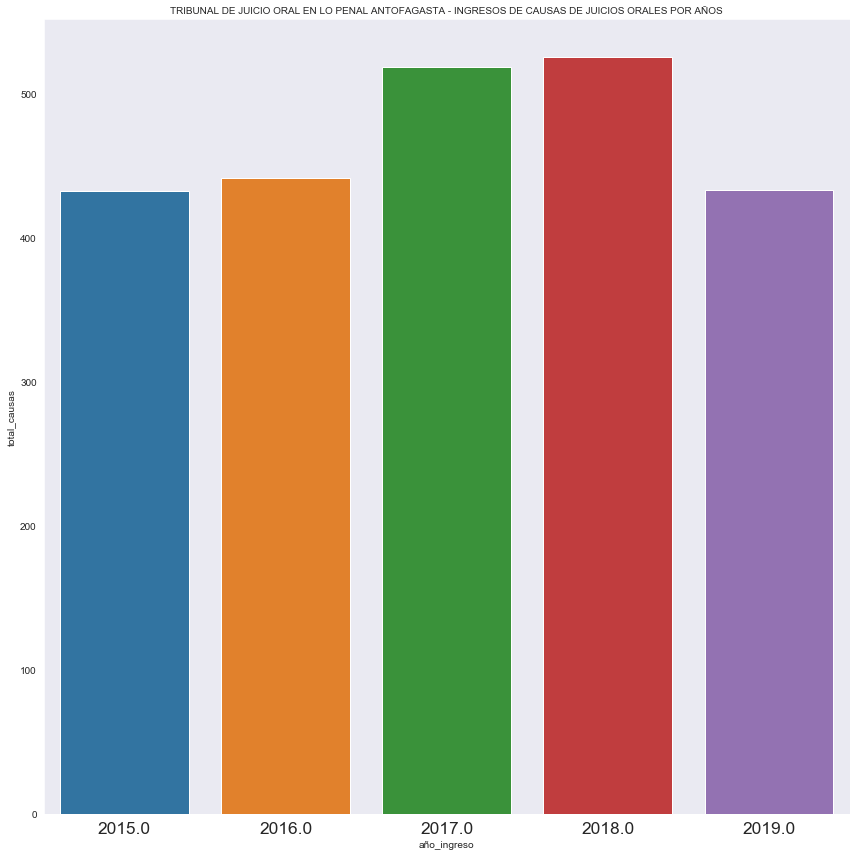

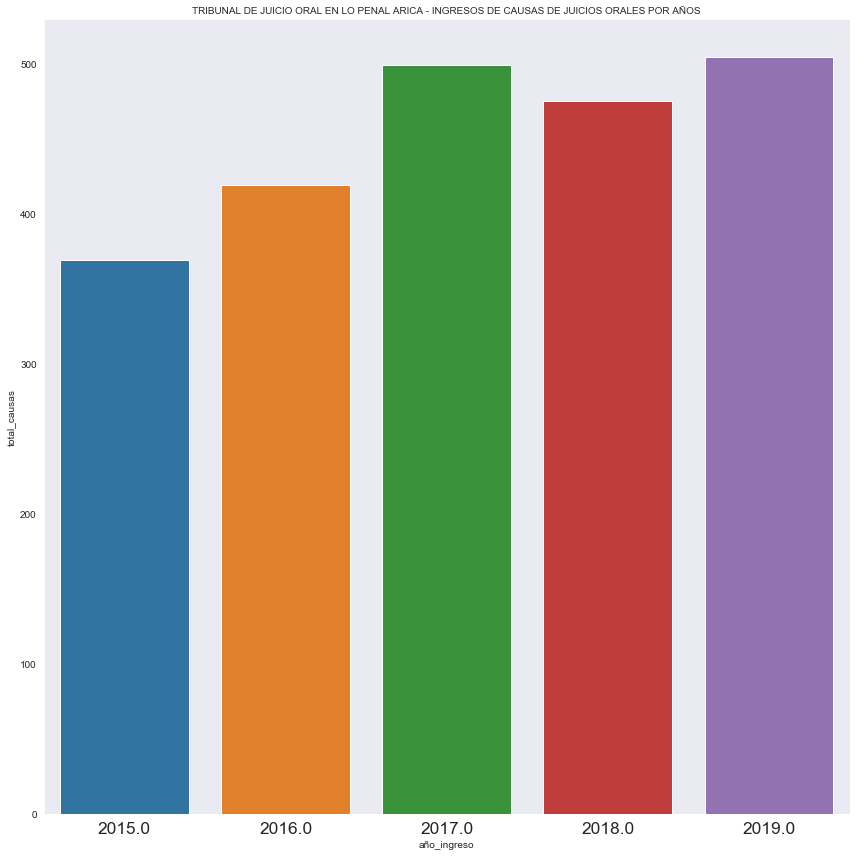

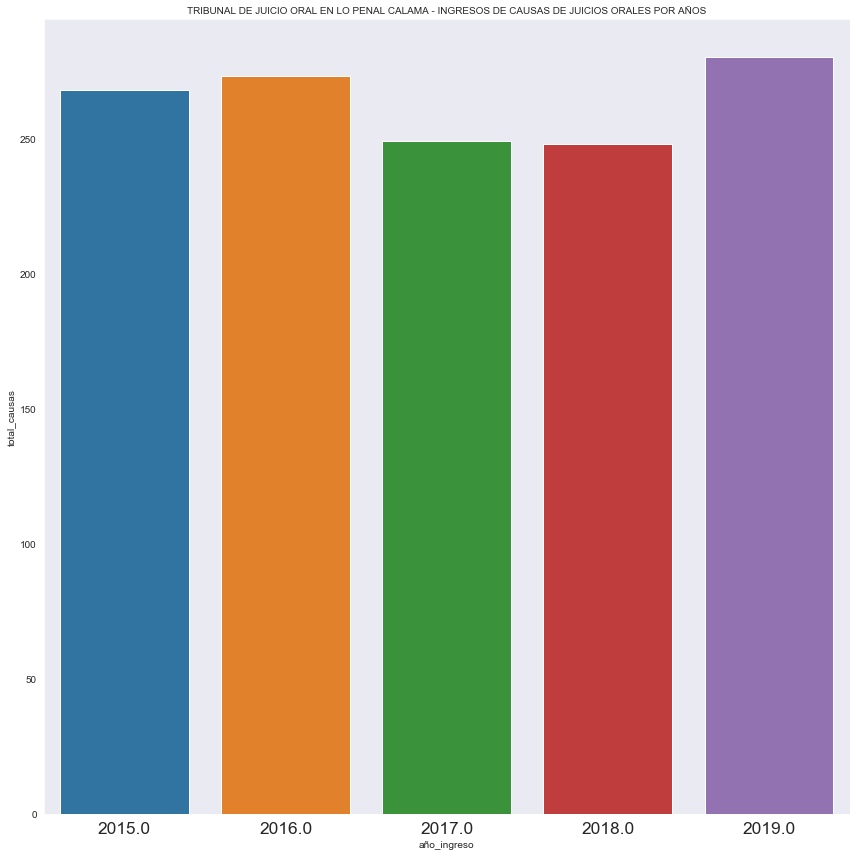

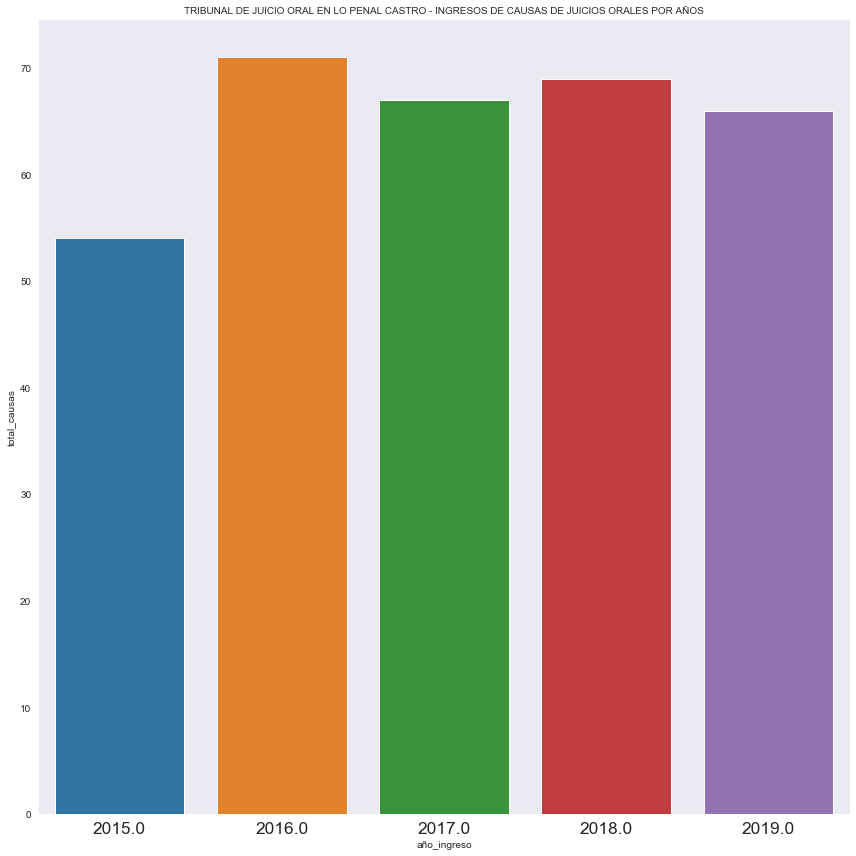

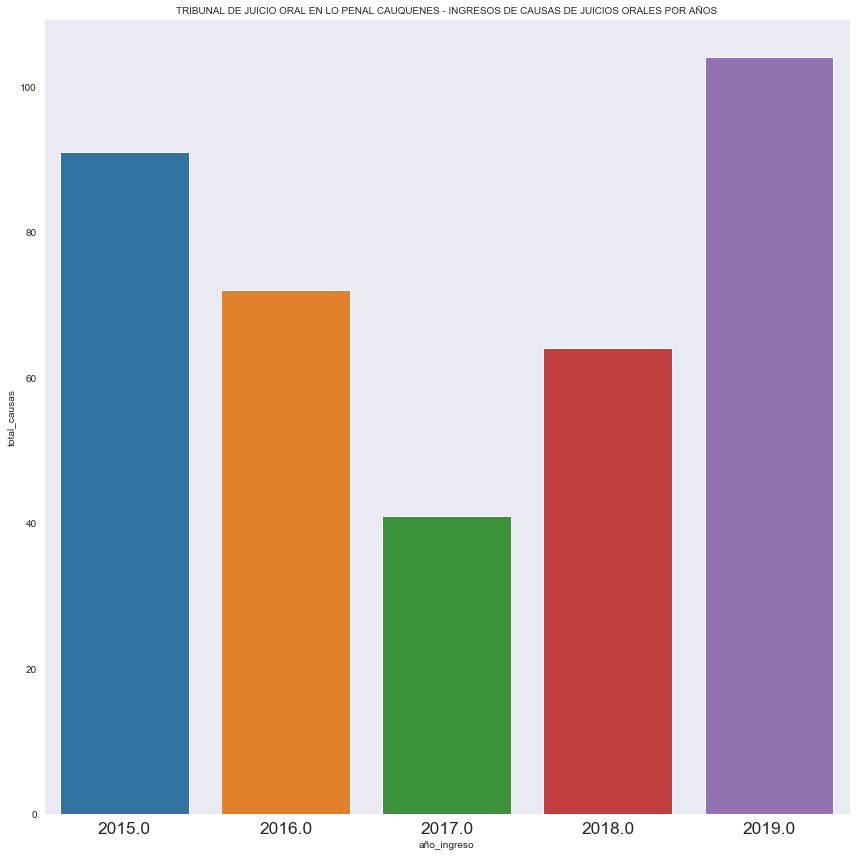

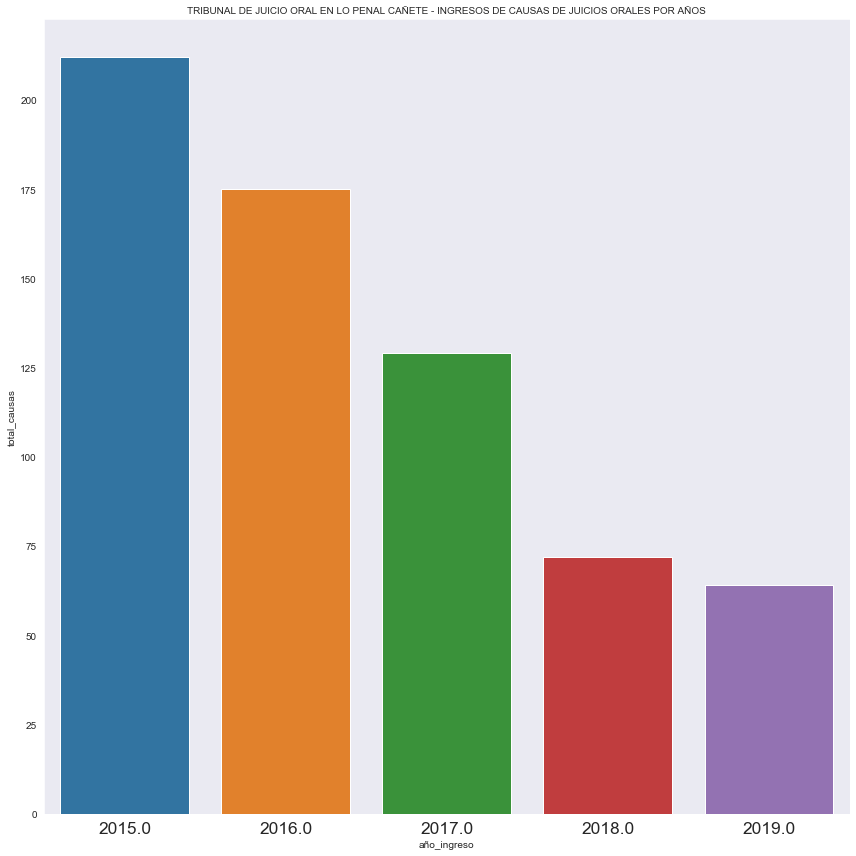

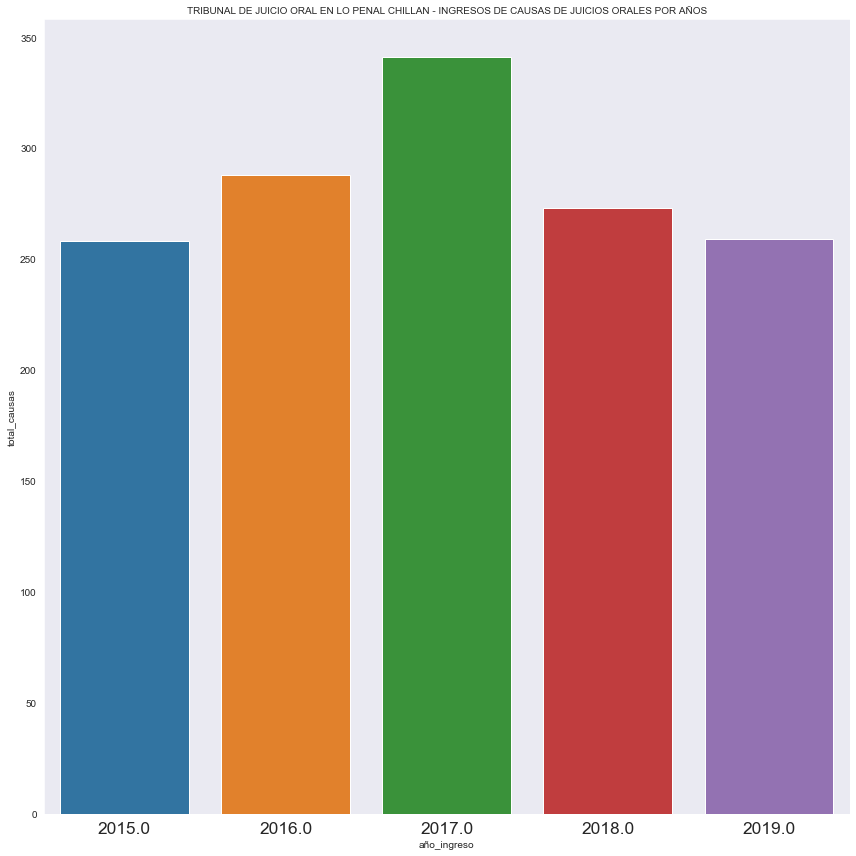

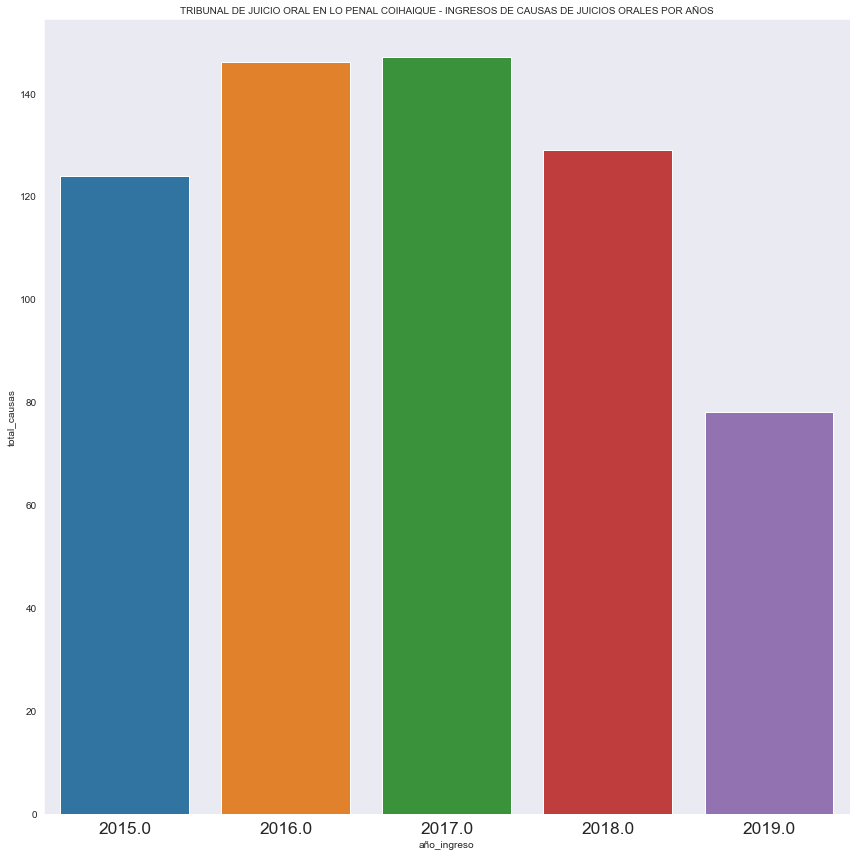

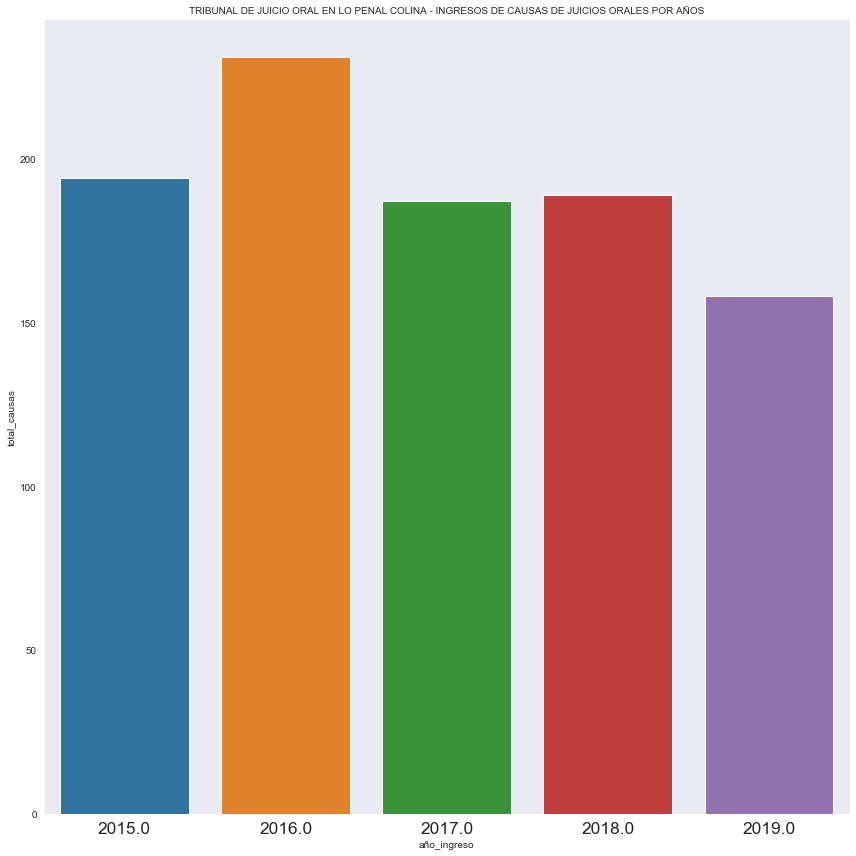

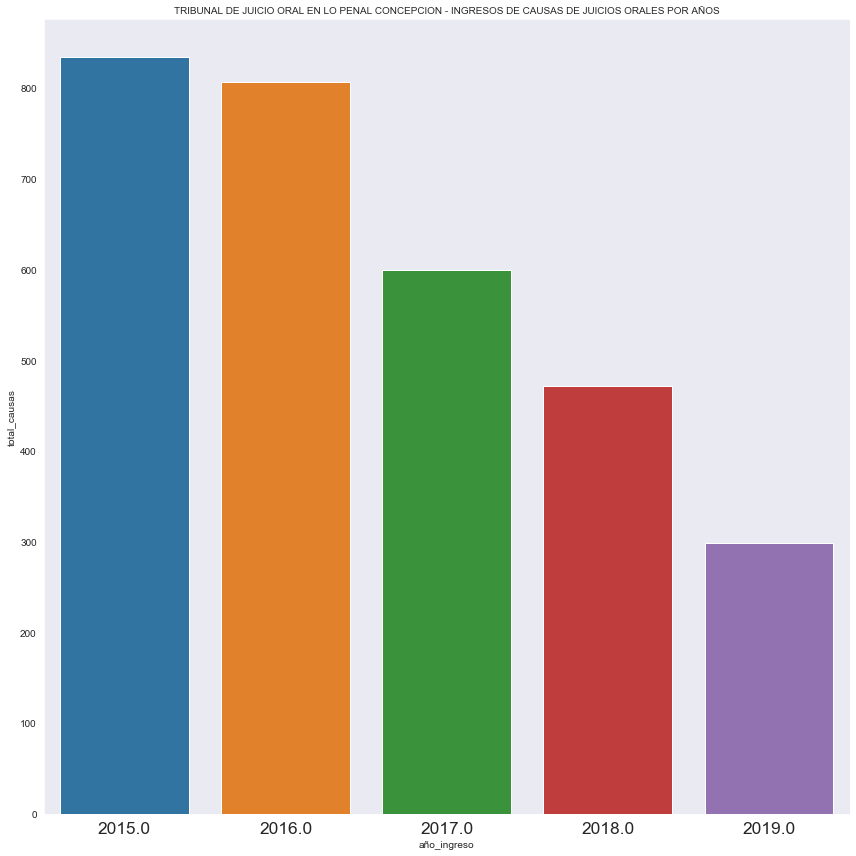

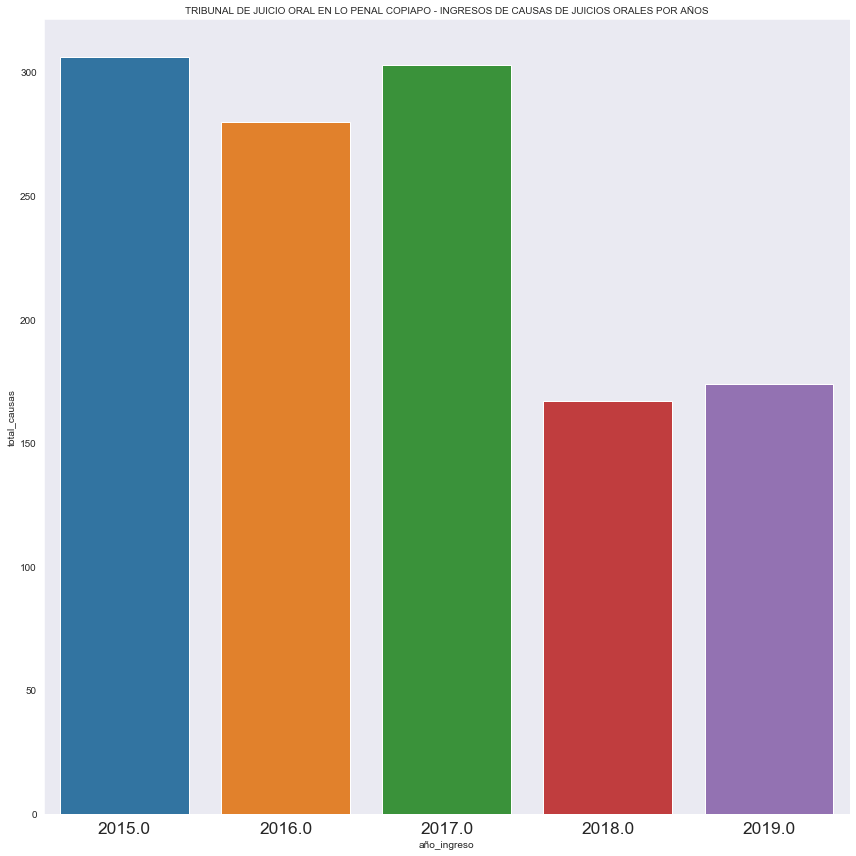

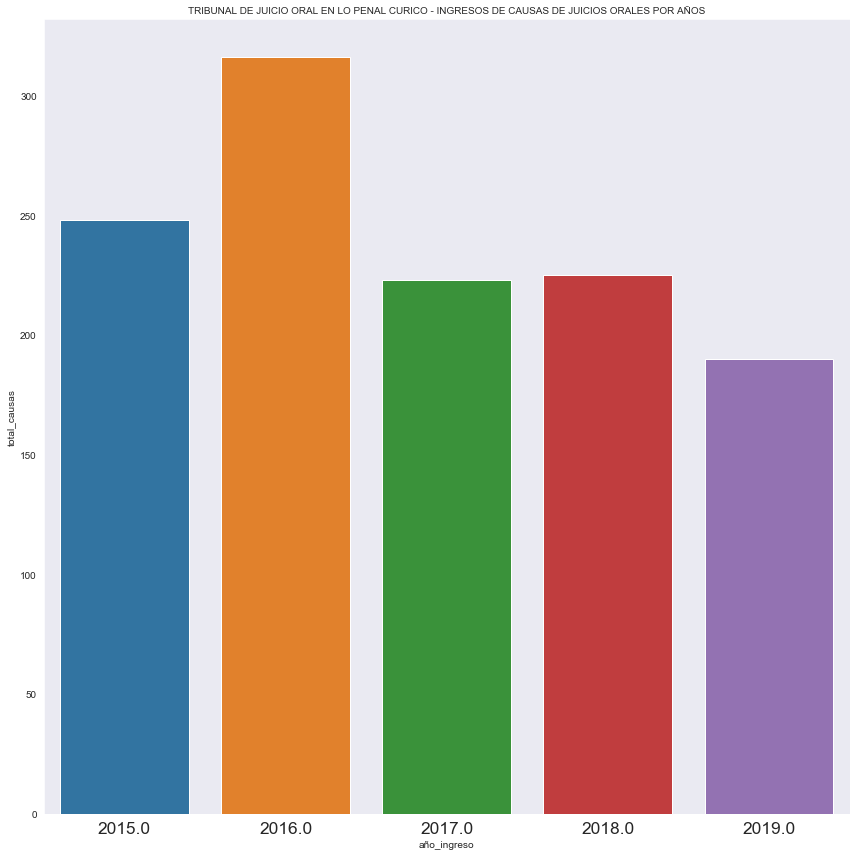

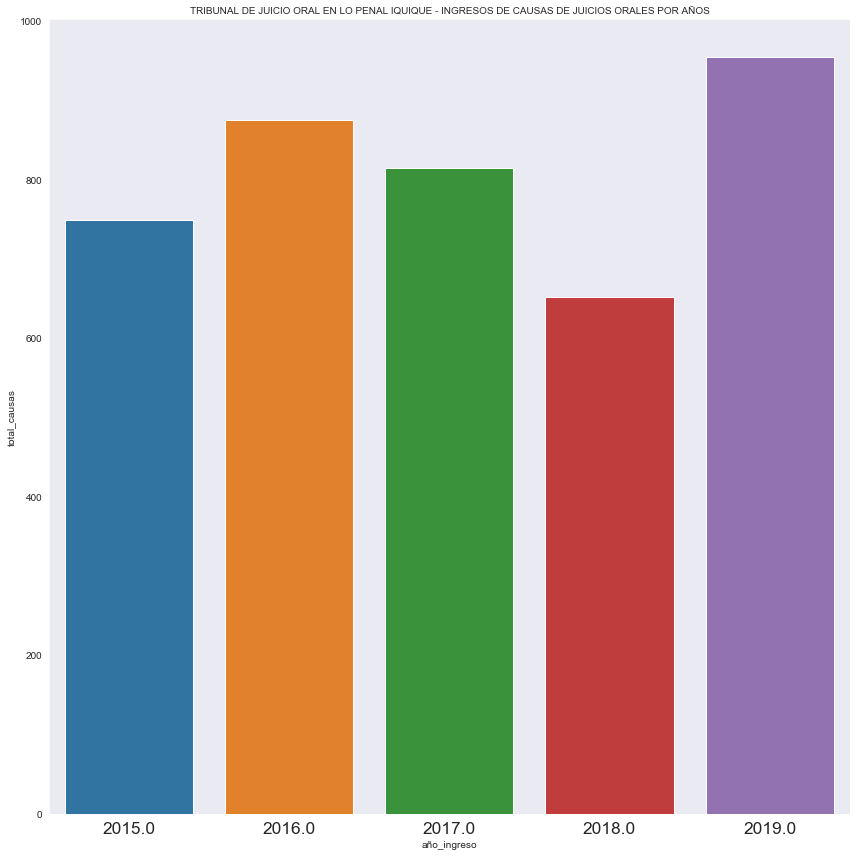

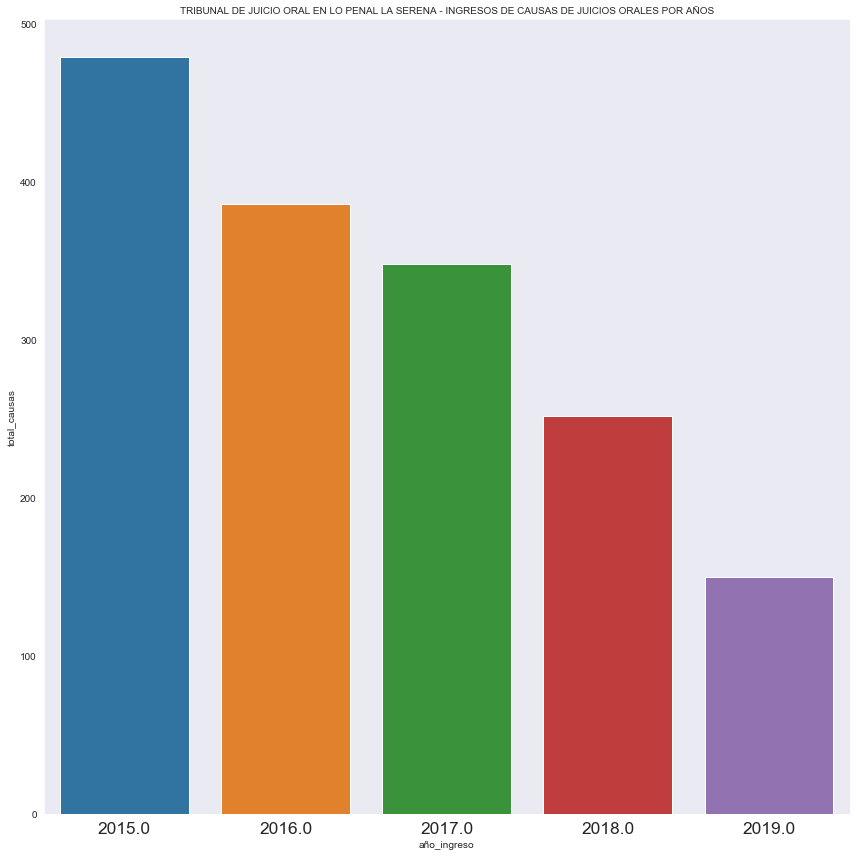

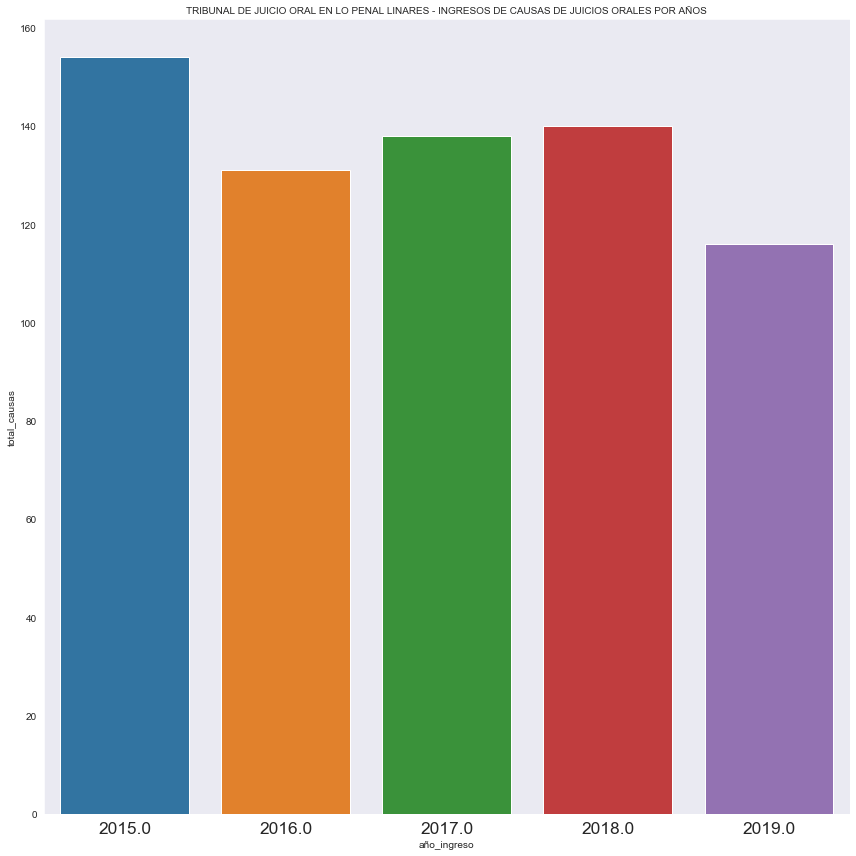

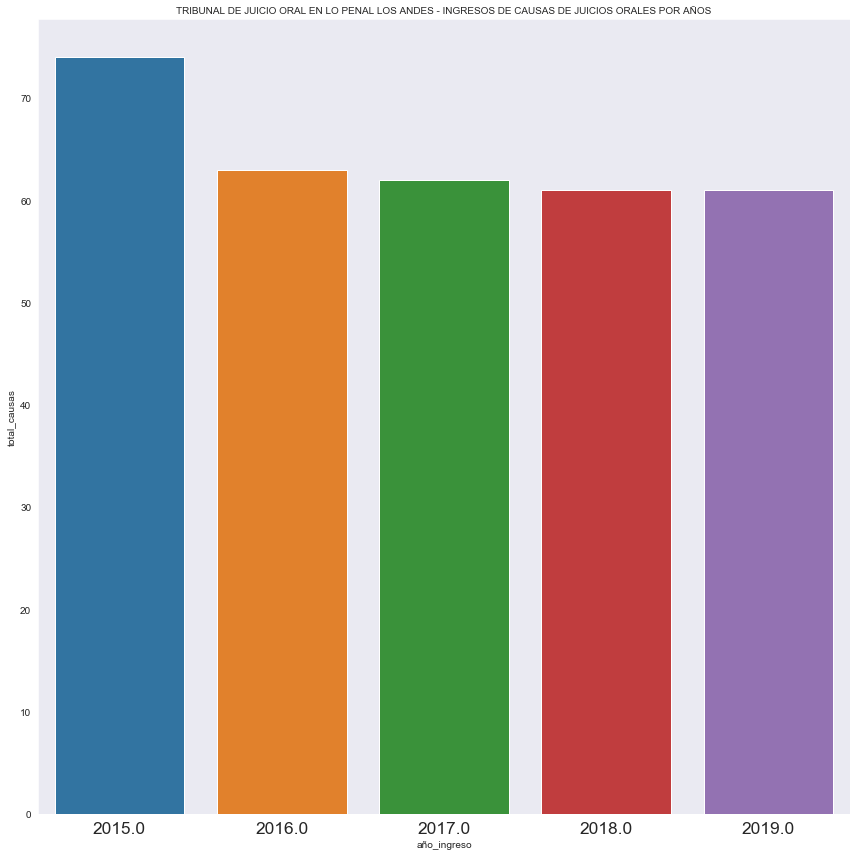

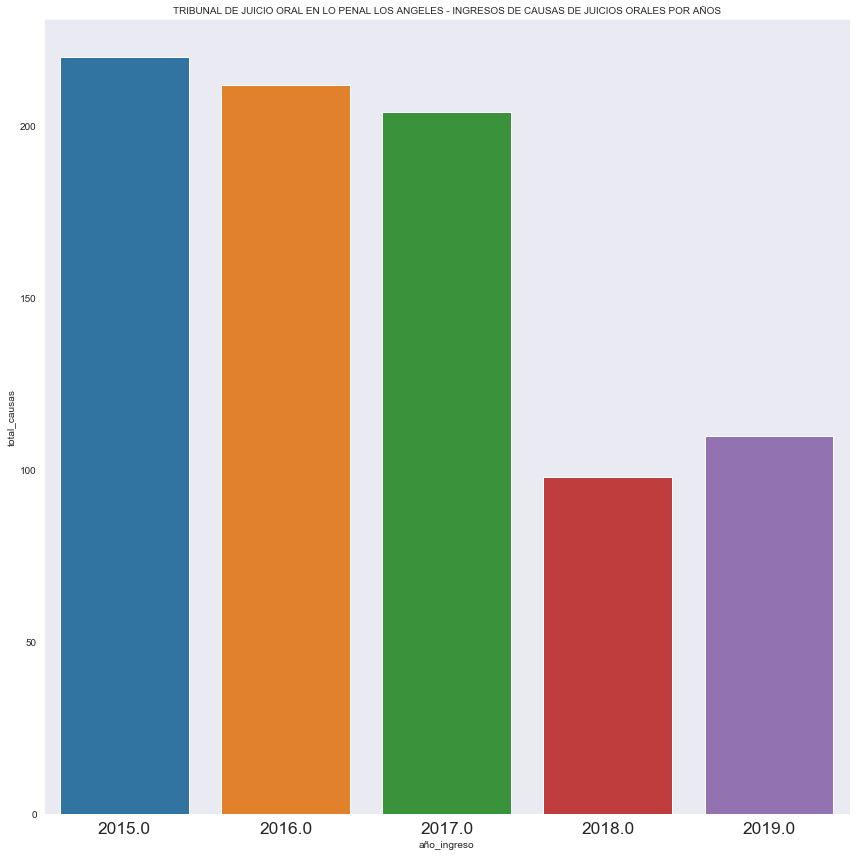

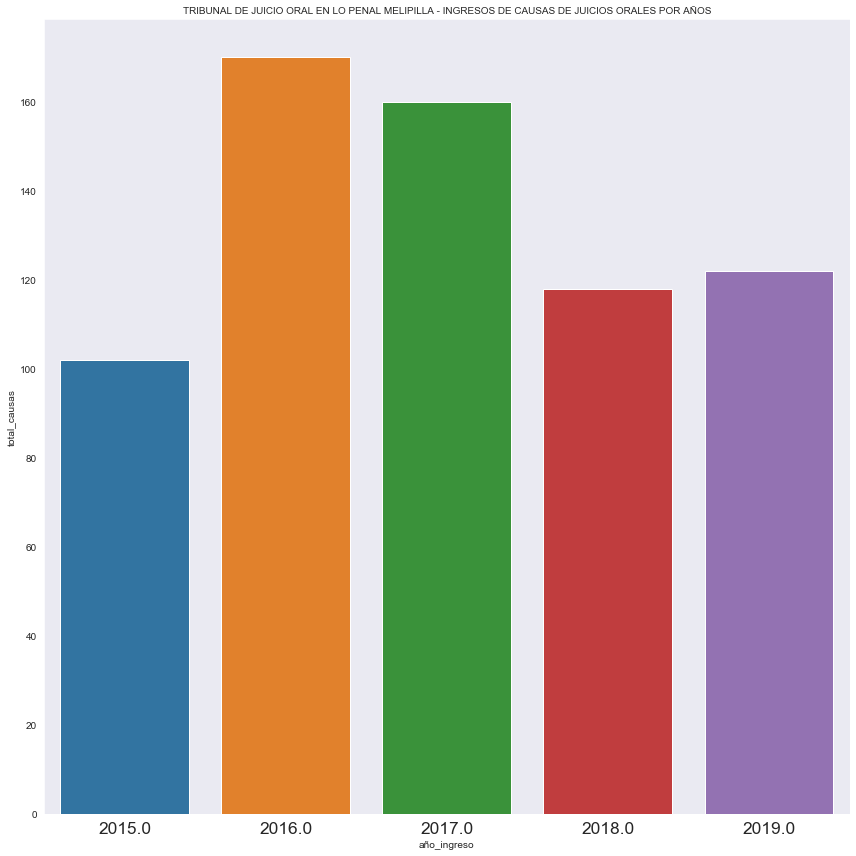

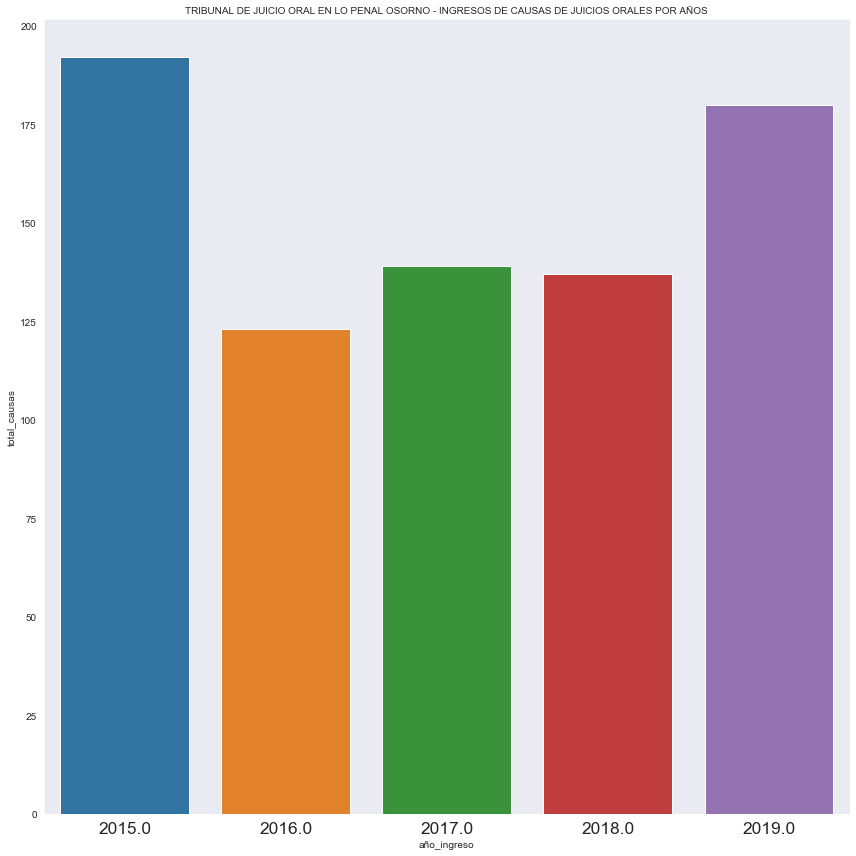

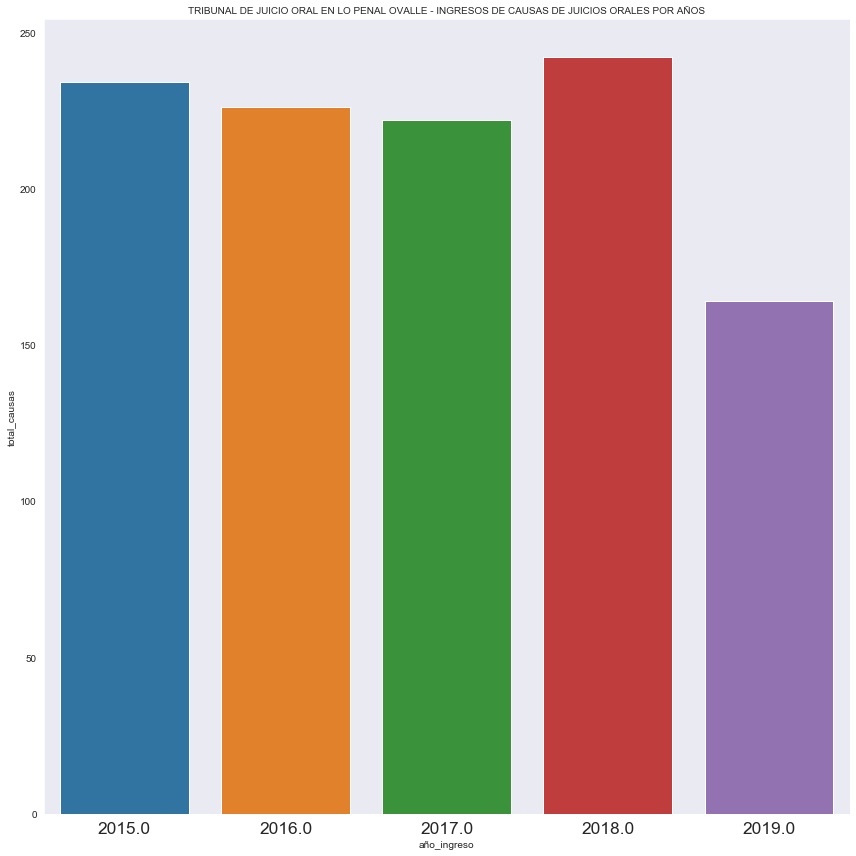

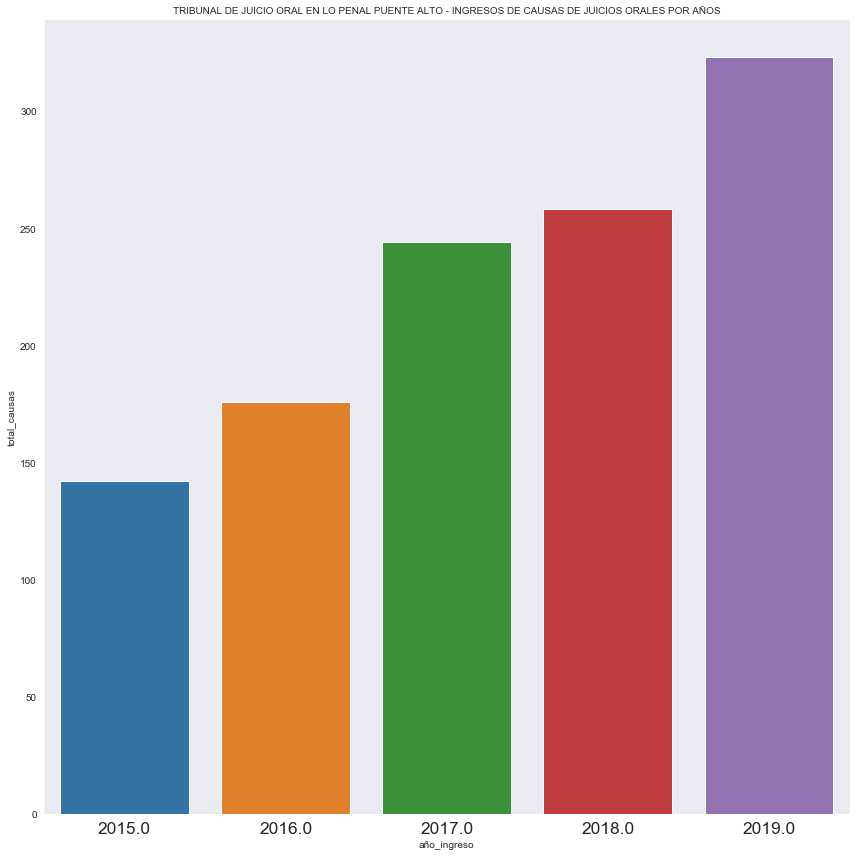

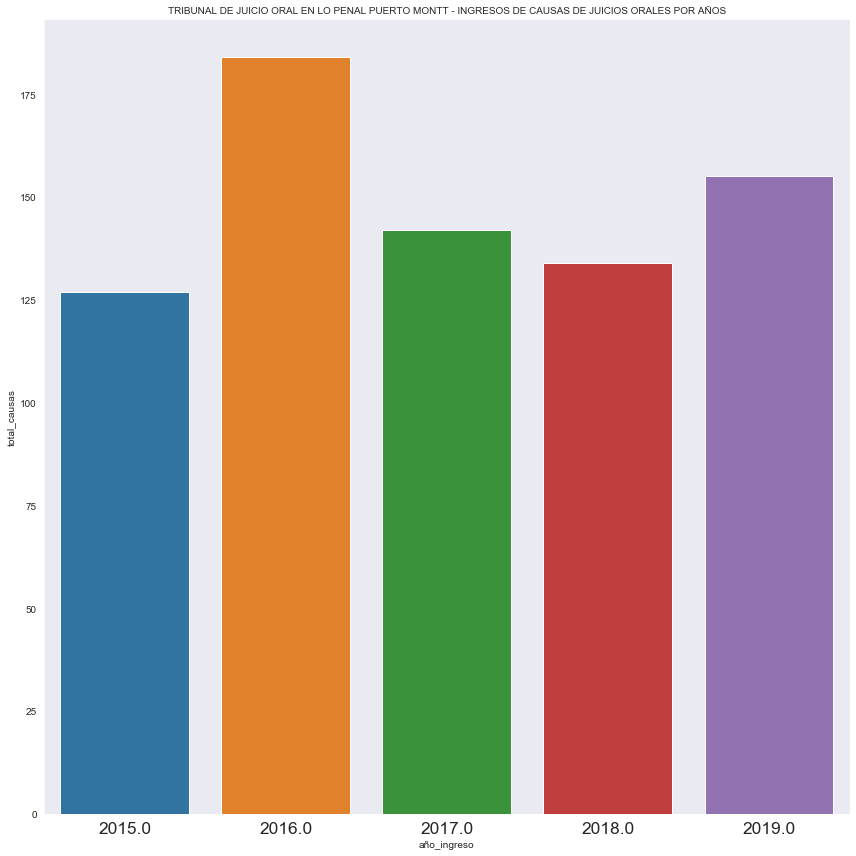

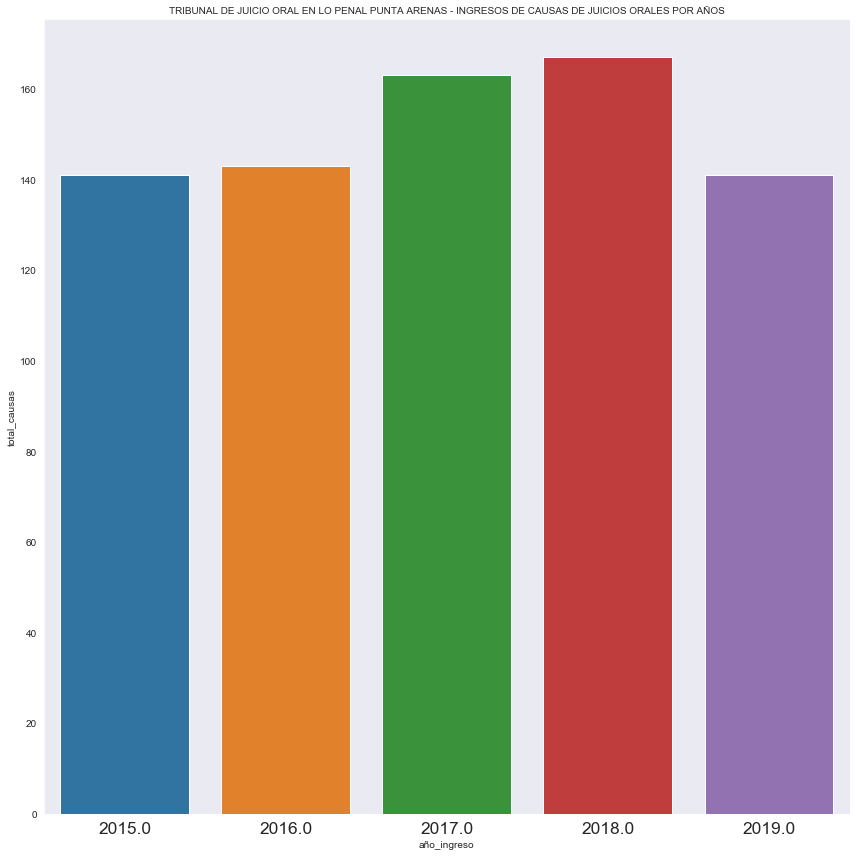

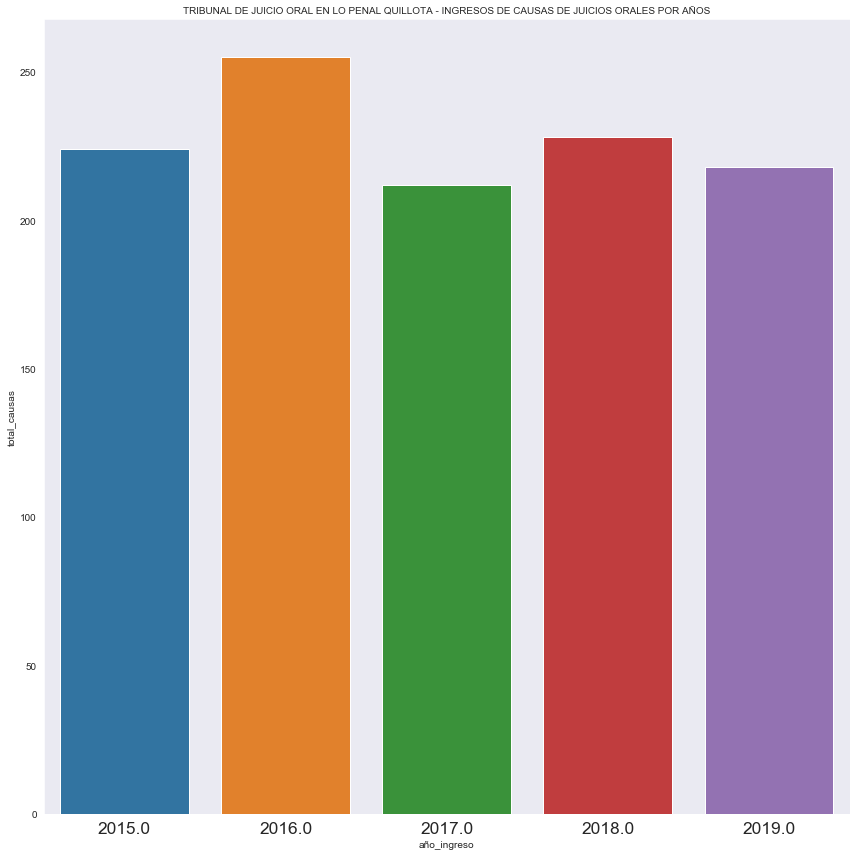

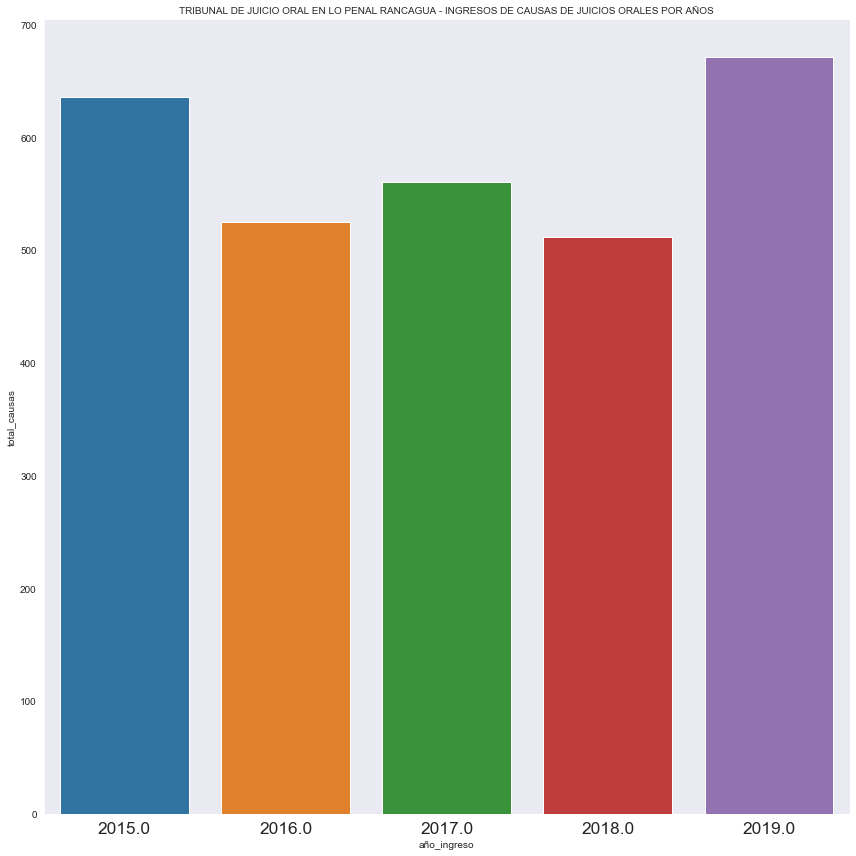

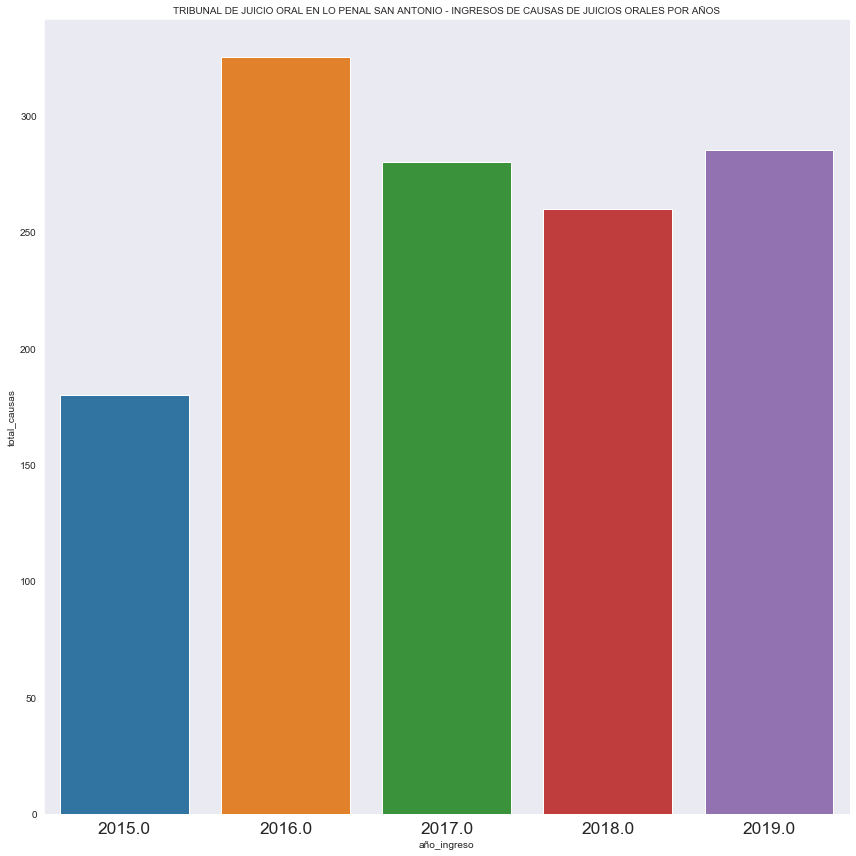

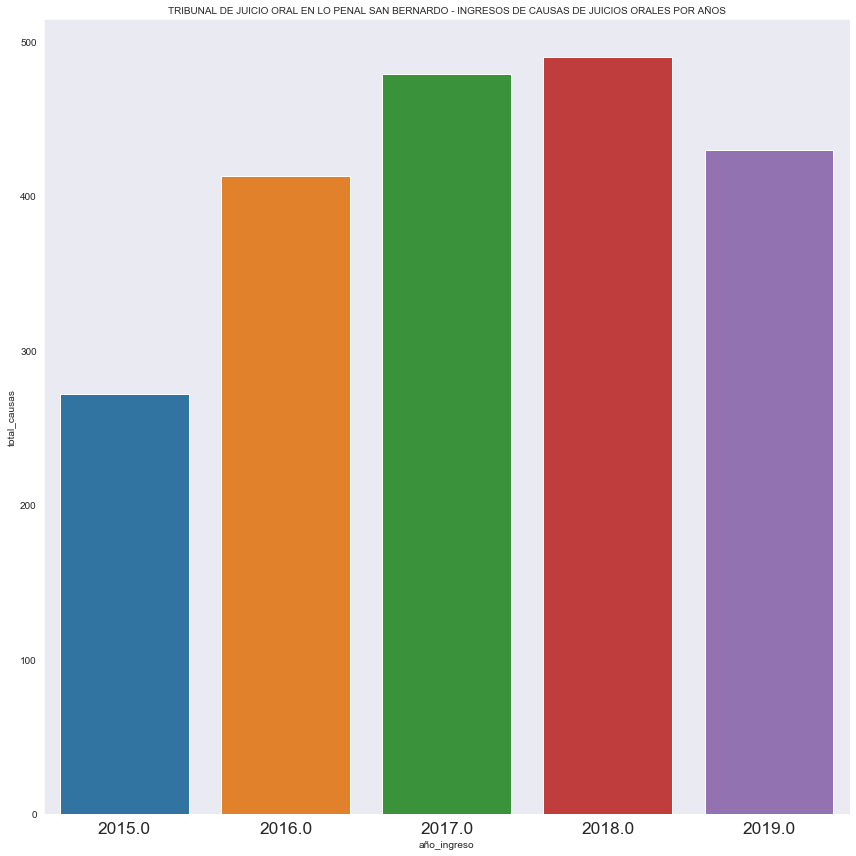

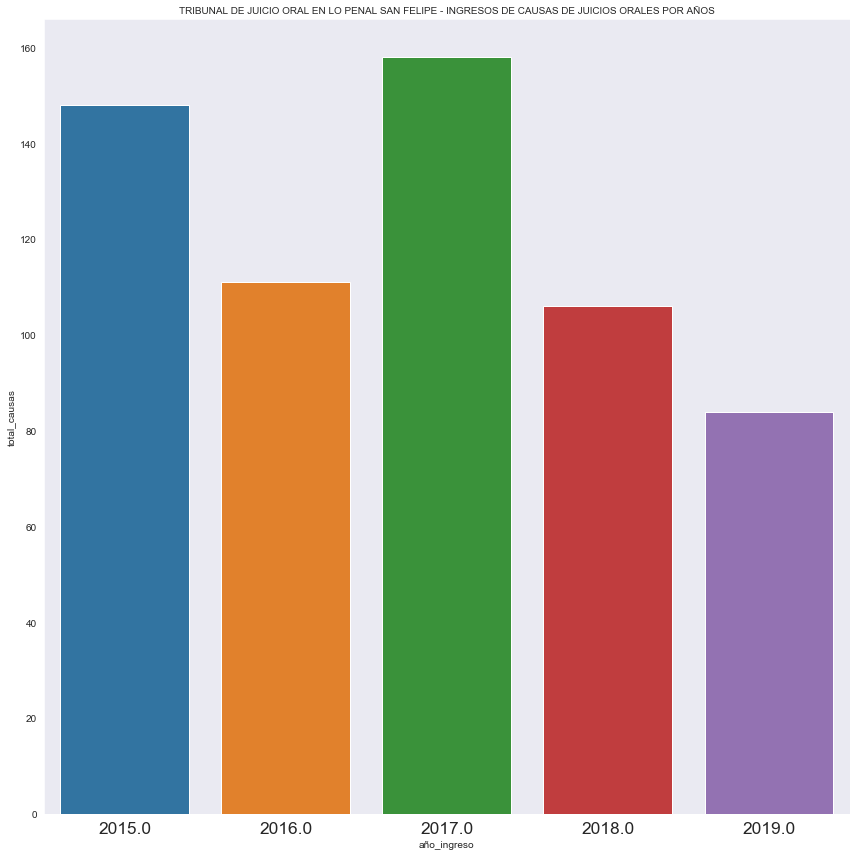

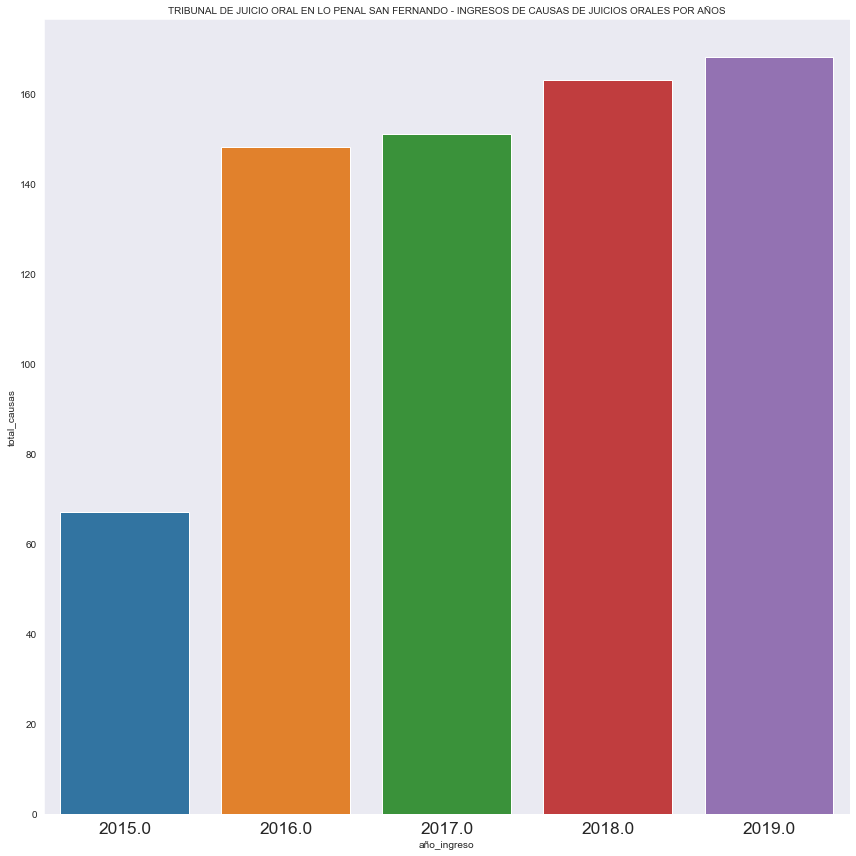

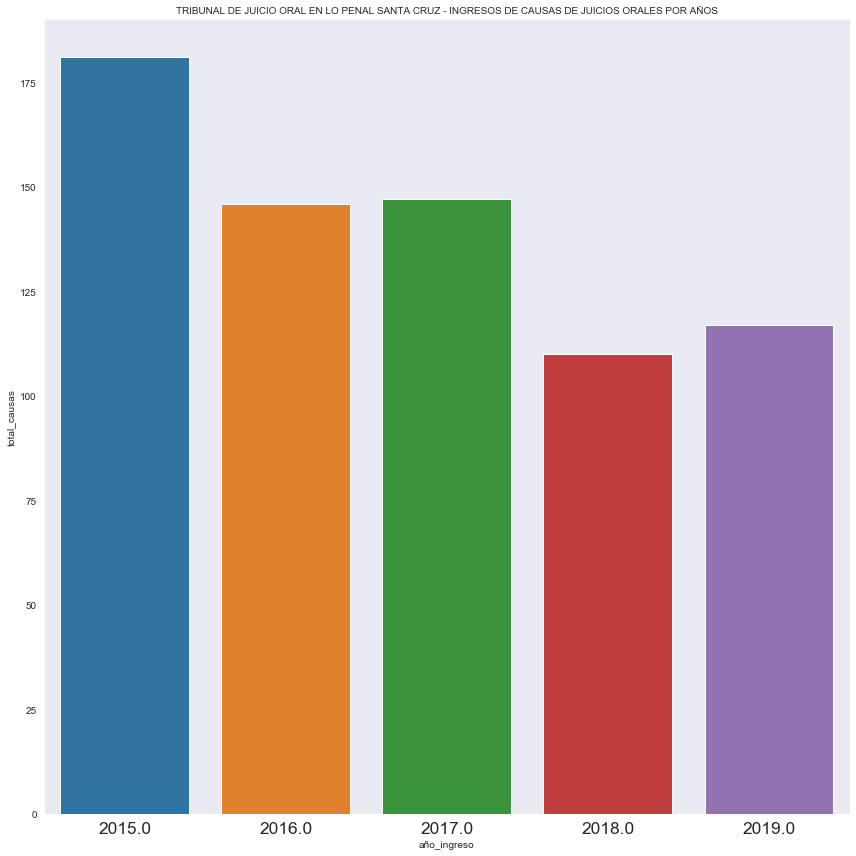

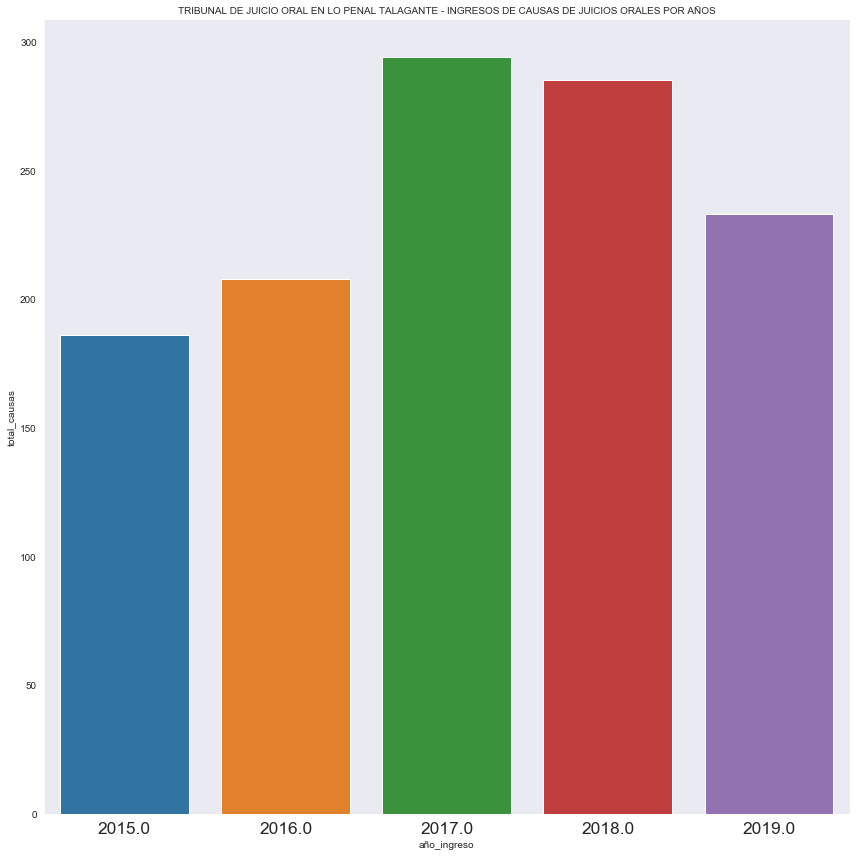

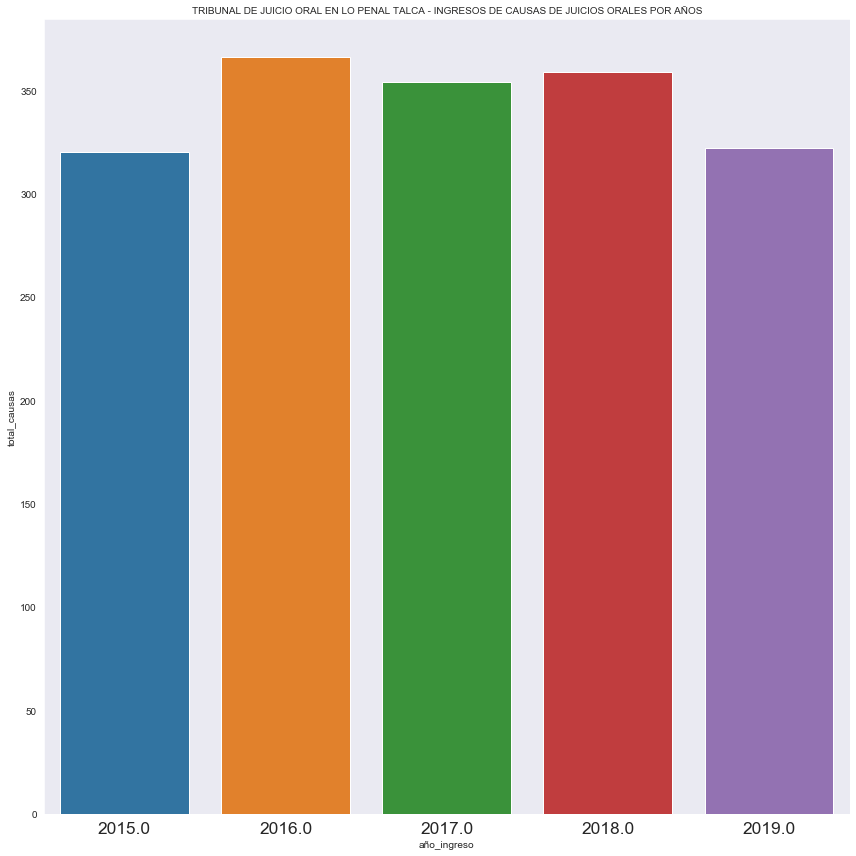

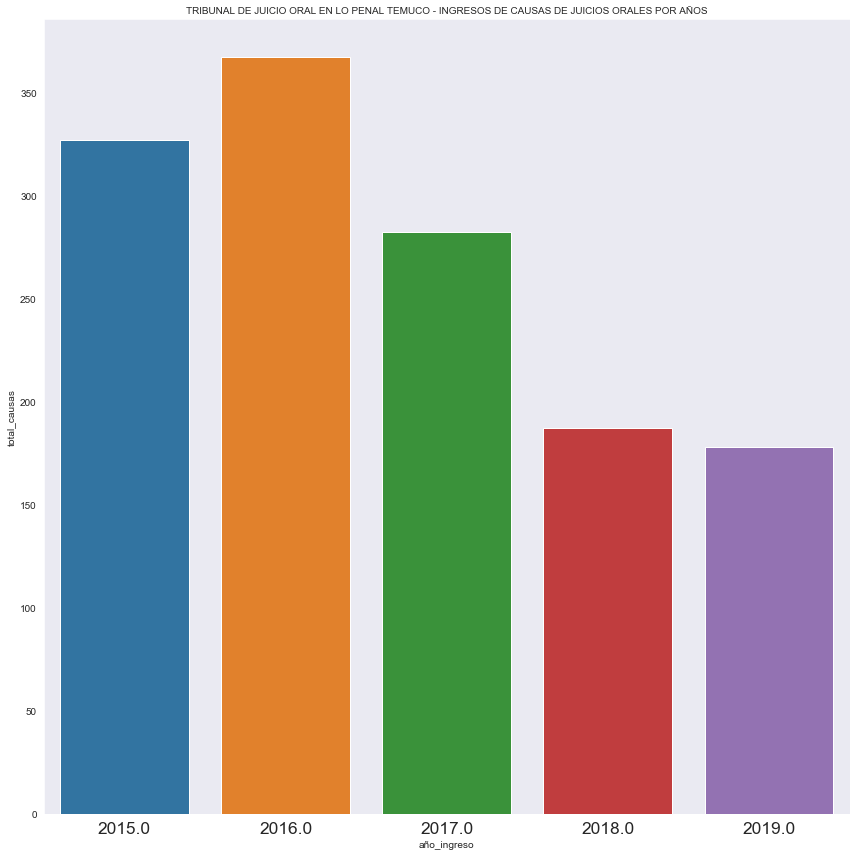

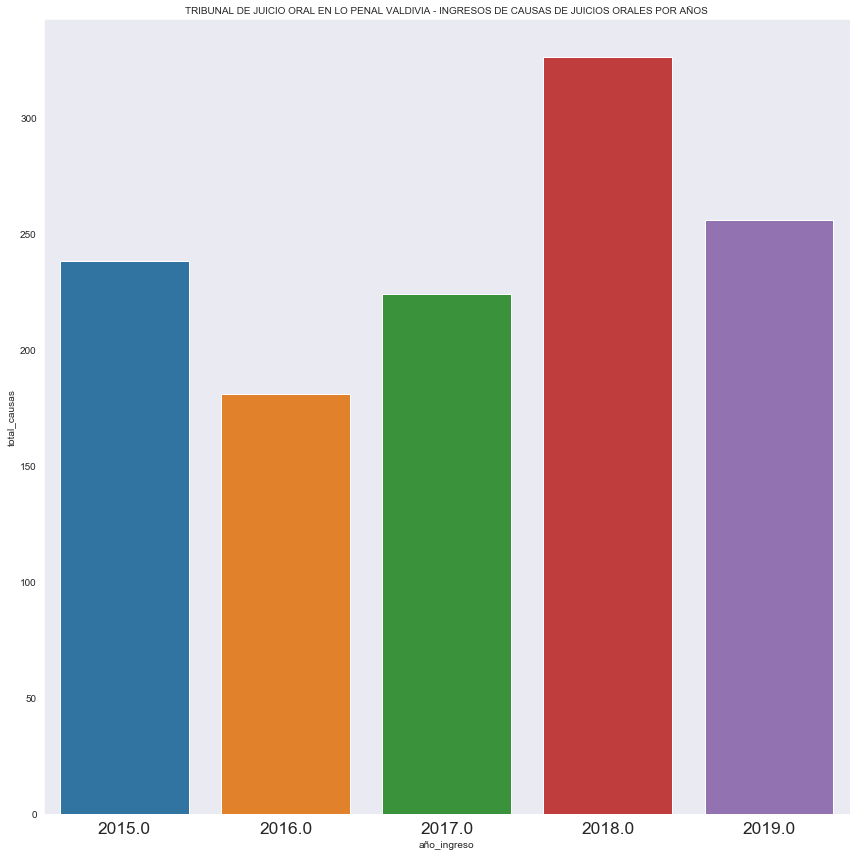

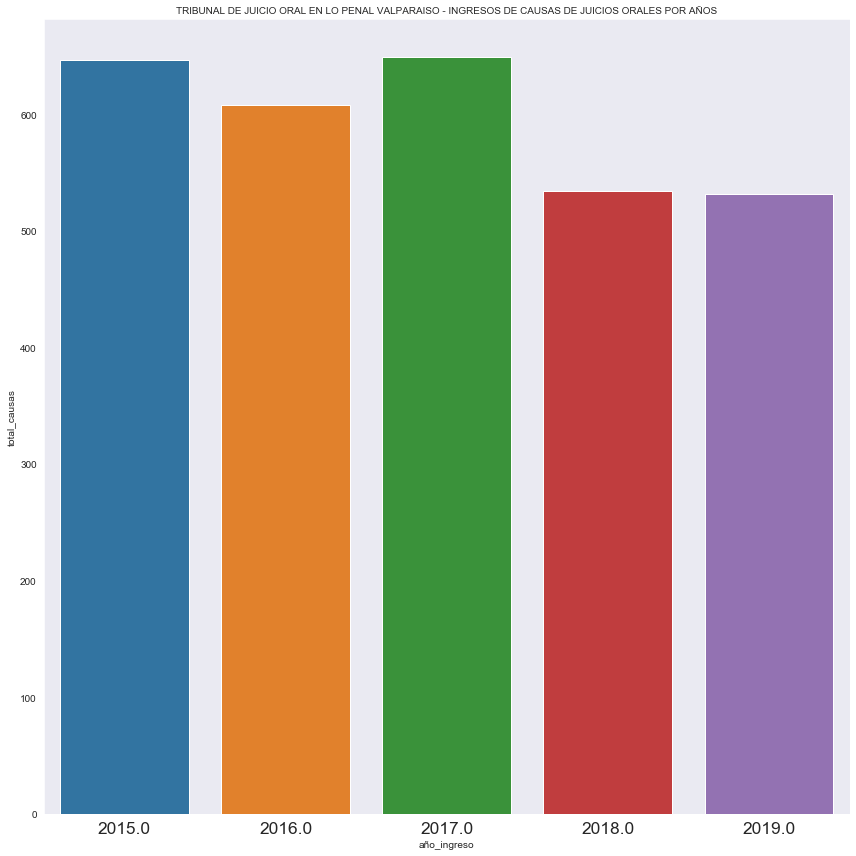

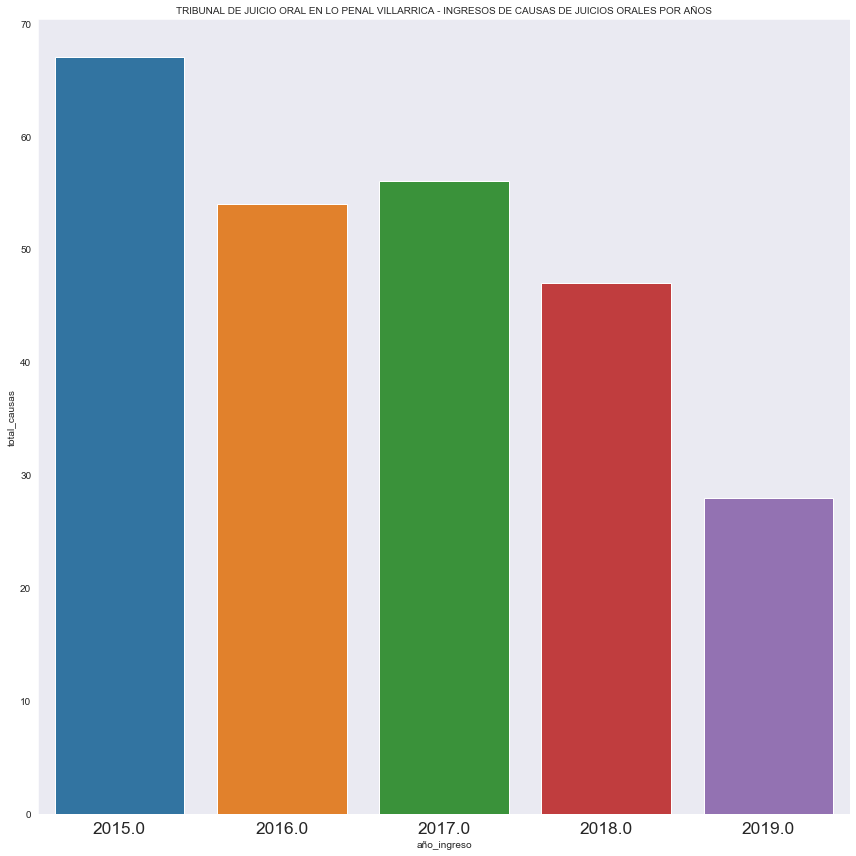

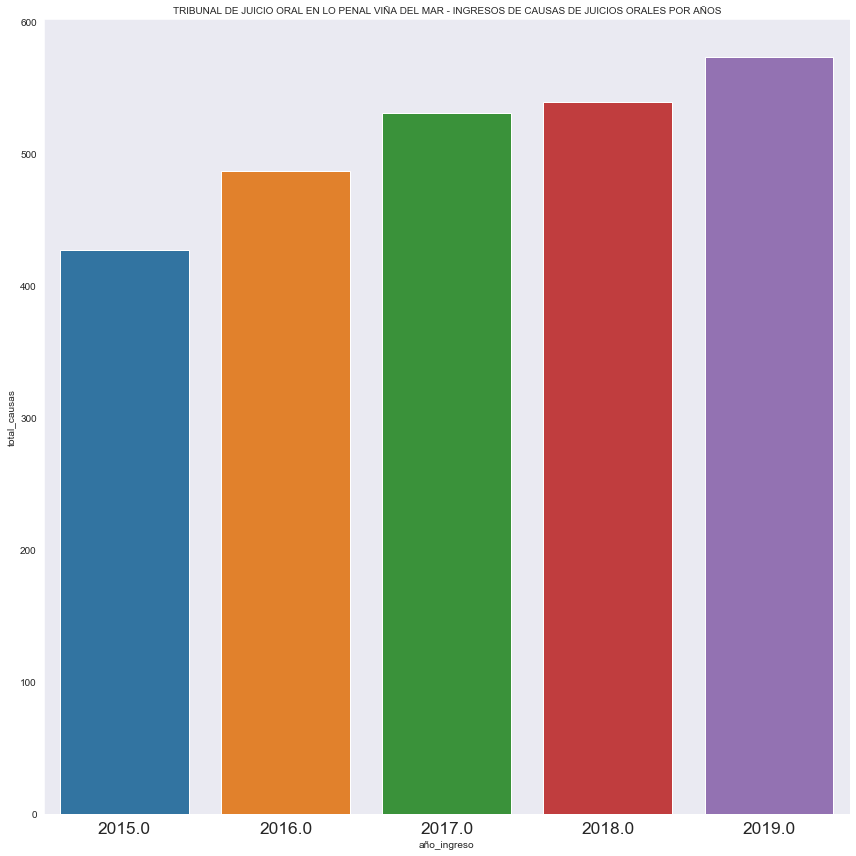

In [76]:
for tribunal in df_totales_tribunales['tribunal'].unique():
    condicion = f"tribunal == '{tribunal}'"
    summary = df_totales_tribunales.query(condicion)

    plt.figure(figsize=(12,12))
    title = f'{tribunal} - INGRESOS DE CAUSAS DE JUICIOS ORALES POR AÑOS'
    plt.title(title, fontsize=10)

    ax = sns.barplot(x='año_ingreso', y='total_causas', data=summary)
    
    ax.xaxis.set_tick_params(labelsize='xx-large')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig(f'../reports/figures/{title}.svg')

    plt.show()